In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
from matplotlib import pyplot as plt

from scipy.stats import ttest_1samp,ttest_ind
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import preprocessing

In [ ]:
import gc

# Returns the number of
# objects it has collected
# and deallocated
collected = gc.collect()

# Prints Garbage collector
# as 0 object
print("Garbage collector: collected",
          "%d objects." % collected)

Garbage collector: collected 0 objects.


**3 Clustering Analysis**
Q1 (30 points) Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means
method and report your findings. You should specify how you select the
right ”K” for the k-means method, and how you create features. Explain
the resultant clusters (the meaning of each cluster) and judge the quality
of resultant clusters.


first

at first i load the four datasets and  merge the three datset together clean it from missing data values and from noise like the outliers i handle some important attributes by doing some feature engineering such as dropping some features that have high correlation  fill some nan values and drop some features convert some feature columns to a new datatype and replace some values that feature attributes have from str to numerical  and create  new features after that i merge the userscore dataset to it without score column and standerize my data so it can fit with the regression model without causes some errors that will help me throw the pipeline predict the user loyality
i use stadard scaler to standrize my dat cause there are some columns that has large values compared to other columns

In [ ]:
merchants = pd.read_csv('merchants.csv')
merchants.head()

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
0  M_ID_838061e48c               8353                   792             9   
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_1  numerical_2 category_1 most_recent_sales_range  \
0    -0.057471    -0.057471          N                       E   
1    -0.057471    -0.057471          N                       E   
2    -0.057471    -0.057471          N                       E   
3    -0.057471    -0.057471          Y                       E   
4    -0.057471    -0.057471          Y                       E   

  most_recent_purchases_range  avg_sales_lag3  ...  avg_sales_lag6  \
0                           E           -0.40  ...           -2.25   
1                           E           -0.72  ...           -0.74   
2                           E          -82.13  ...          -82.13   
3                           E             NaN  ...             NaN   
4                           E             NaN  ...             NaN   

   avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
0           18.666667                   6            -2.32   
1            1.291667                   6            -0.57   
2          260.000000                   2           -82.13   
3            4.666667                   6              NaN   
4            0.361111                   6              NaN   

   avg_purchases_lag12  active_months_lag12  category_4  city_id state_id  \
0            13.916667                   12           N      242        9   
1             1.687500                   12           N       22       16   
2           260.000000                    2           N       -1        5   
3             3.833333                   12           Y       -1       -1   
4             0.347222                   12           Y       -1       -1   

   category_2  
0         1.0  
1         1.0  
2         5.0  
3         NaN  
4         NaN  

[5 rows x 22 columns]

In [ ]:
historical = pd.read_csv('historical_transactions.csv')
historical.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.703331  2017-06-25 15:33:07         1.0        16            37  
1        -0.733128  2017-07-15 12:10:45         1.0        16            16  
2        -0.720386  2017-08-09 22:04:29         1.0        16            37  
3        -0.735352  2017-09-02 10:06:26         1.0        16            34  
4        -0.722865  2017-03-10 01:14:19         1.0        16            37

In [ ]:
new_merchant = pd.read_csv('new_merchant_transactions.csv')
new_merchant.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.557574  2018-03-11 14:57:36         1.0         9            19  
1        -0.569580  2018-03-19 18:53:37         1.0         9            19  
2        -0.551037  2018-04-26 14:08:44         1.0         9            14  
3        -0.671925  2018-03-07 09:43:21         NaN        -1             8  
4        -0.659904  2018-03-22 21:07:53         NaN        -1            29

In [ ]:
userscore=pd.read_csv('userscore.csv')
userscore.head()

card_id first_active_month  feature_1  feature_2  feature_3  \
0  C_ID_92a2005557             Jun-17          5          2          1   
1  C_ID_3d0044924f             Jan-17          4          1          0   
2  C_ID_d639edf6cd             Aug-16          2          2          0   
3  C_ID_186d6a6901             Sep-17          4          3          0   
4  C_ID_cdbd2c0db2             Nov-17          1          3          0   

      score  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

In [ ]:
def reduce_memory_usage(df, verbose=True):
  '''
  This function reduces the memory sizes of dataframe by changing the datatypes of the columns.
  Parameters
  df - DataFrame whose size to be reduced
  verbose - Boolean, to mention the verbose required or not.
  '''
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
      col_type = df[col].dtypes
      if col_type in numerics:
          c_min = df[col].min()
          c_max = df[col].max()
          if str(col_type)[:3] == 'int':
              if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                  df[col] = df[col].astype(np.int8)
              elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                  df[col] = df[col].astype(np.int16)
              elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                  df[col] = df[col].astype(np.int32)
              elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                  df[col] = df[col].astype(np.int64)
          else:
              c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
              if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                  df[col] = df[col].astype(np.float16)
              elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                  df[col] = df[col].astype(np.float32)
              else:
                  df[col] = df[col].astype(np.float64)
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
  return df

In [ ]:
# Reduce memory usage of data (Wall time: 4min 25s)
userscore = reduce_memory_usage(userscore)
historical = reduce_memory_usage(historical)
new_merchant = reduce_memory_usage(new_merchant)
merchants = reduce_memory_usage(merchants)

Mem. usage decreased to  5.20 Mb (43.7% reduction)

Mem. usage decreased to 2026.75 Mb (34.8% reduction)

Mem. usage decreased to 136.66 Mb (34.8% reduction)

Mem. usage decreased to 39.90 Mb (29.0% reduction)


In [ ]:
userscore.shape

(201917, 6)

In [ ]:
historical.shape

(29112361, 14)

In [ ]:
new_merchant.shape

(1963031, 14)

In [ ]:
merchants.shape

(334696, 22)

In [ ]:
import pandas as pd


# Merge the datasets
import pandas as pd
# Merge all the datasets together on the user_id column
merged_data_2 = pd.concat([historical, new_merchant], axis=0)
merged_data_3 = pd.merge(merged_data_2, merchants, on=['merchant_id','category_1','state_id','city_id','subsector_id','category_2','merchant_category_id'], how='left')


In [ ]:
merged_data_2

authorized_flag          card_id  city_id category_1  installments  \
0                     Y  C_ID_4e6213e9bc       88          N             0   
1                     Y  C_ID_4e6213e9bc       88          N             0   
2                     Y  C_ID_4e6213e9bc       88          N             0   
3                     Y  C_ID_4e6213e9bc       88          N             0   
4                     Y  C_ID_4e6213e9bc       88          N             0   
...                 ...              ...      ...        ...           ...   
1963026               Y  C_ID_1320dee851      142          N             0   
1963027               Y  C_ID_f112aa3381      158          N             0   
1963028               Y  C_ID_bd97b86450       69          N             1   
1963029               Y  C_ID_c0513fd84f      130          N             0   
1963030               Y  C_ID_a935410f8e       19          N             0   

        category_3  merchant_category_id      merchant_id  month_lag  \
0                A                    80  M_ID_e020e9b302         -8   
1                A                   367  M_ID_86ec983688         -7   
2                A                    80  M_ID_979ed661fc         -6   
3                A                   560  M_ID_e6d5ae8ea6         -5   
4                A                    80  M_ID_e020e9b302        -11   
...            ...                   ...              ...        ...   
1963026          A                   309  M_ID_7754b67f3b          2   
1963027          A                   560  M_ID_da063195b7          2   
1963028          B                   278  M_ID_9a9ccb6544          1   
1963029          A                   367  M_ID_40c28d596f          1   
1963030          A                   278  M_ID_d855771cd9          2   

         purchase_amount        purchase_date  category_2  state_id  \
0              -0.703331  2017-06-25 15:33:07         1.0        16   
1              -0.733128  2017-07-15 12:10:45         1.0        16   
2              -0.720386  2017-08-09 22:04:29         1.0        16   
3              -0.735352  2017-09-02 10:06:26         1.0        16   
4              -0.722865  2017-03-10 01:14:19         1.0        16   
...                  ...                  ...         ...       ...   
1963026        -0.701828  2018-04-06 14:36:52         3.0        19   
1963027        -0.694390  2018-03-07 13:19:18         1.0        15   
1963028        -0.621031  2018-03-05 12:04:56         1.0         9   
1963029        -0.656749  2018-03-09 14:47:05         3.0         7   
1963030        -0.739395  2018-04-11 07:59:46         1.0         9   

         subsector_id  
0                  37  
1                  16  
2                  37  
3                  34  
4                  37  
...               ...  
1963026            21  
1963027            34  
1963028            37  
1963029            16  
1963030            37  

[31075392 rows x 14 columns]

In [ ]:
merged_data_3

authorized_flag          card_id  city_id category_1  installments  \
0                      Y  C_ID_4e6213e9bc       88          N             0   
1                      Y  C_ID_4e6213e9bc       88          N             0   
2                      Y  C_ID_4e6213e9bc       88          N             0   
3                      Y  C_ID_4e6213e9bc       88          N             0   
4                      Y  C_ID_4e6213e9bc       88          N             0   
...                  ...              ...      ...        ...           ...   
31177688               Y  C_ID_1320dee851      142          N             0   
31177689               Y  C_ID_f112aa3381      158          N             0   
31177690               Y  C_ID_bd97b86450       69          N             1   
31177691               Y  C_ID_c0513fd84f      130          N             0   
31177692               Y  C_ID_a935410f8e       19          N             0   

         category_3  merchant_category_id      merchant_id  month_lag  \
0                 A                    80  M_ID_e020e9b302         -8   
1                 A                   367  M_ID_86ec983688         -7   
2                 A                    80  M_ID_979ed661fc         -6   
3                 A                   560  M_ID_e6d5ae8ea6         -5   
4                 A                    80  M_ID_e020e9b302        -11   
...             ...                   ...              ...        ...   
31177688          A                   309  M_ID_7754b67f3b          2   
31177689          A                   560  M_ID_da063195b7          2   
31177690          B                   278  M_ID_9a9ccb6544          1   
31177691          A                   367  M_ID_40c28d596f          1   
31177692          A                   278  M_ID_d855771cd9          2   

          purchase_amount  ... avg_sales_lag3  avg_purchases_lag3  \
0               -0.703331  ...           1.08            1.082451   
1               -0.733128  ...           1.06            1.052071   
2               -0.720386  ...           0.98            0.974653   
3               -0.735352  ...           1.00            1.053443   
4               -0.722865  ...           1.08            1.082451   
...                   ...  ...            ...                 ...   
31177688        -0.701828  ...           1.28            1.156733   
31177689        -0.694390  ...            NaN                 NaN   
31177690        -0.621031  ...           0.98            1.033403   
31177691        -0.656749  ...           1.04            1.092105   
31177692        -0.739395  ...            NaN                 NaN   

          active_months_lag3  avg_sales_lag6  avg_purchases_lag6  \
0                        3.0            1.14            1.114135   
1                        3.0            1.06            1.058605   
2                        3.0            0.98            0.967058   
3                        3.0            0.88            0.897406   
4                        3.0            1.14            1.114135   
...                      ...             ...                 ...   
31177688                 3.0            1.39            1.185430   
31177689                 NaN             NaN                 NaN   
31177690                 3.0            1.01            1.042102   
31177691                 3.0            0.94            1.052005   
31177692                 NaN             NaN                 NaN   

          active_months_lag6  avg_sales_lag12 avg_purchases_lag12  \
0                        6.0             1.19            1.156844   
1                        6.0             1.05            1.062087   
2                        6.0             0.97            0.956668   
3                        6.0             0.86            0.864394   
4                        6.0             1.19            1.156844   
...                      ...              ...                 ...   
31177688                 6.0             1.45         

In [ ]:
merged_data_3.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 31177693 entries, 0 to 31177692

Data columns (total 29 columns):

 #   Column                       Dtype  

---  ------                       -----  

 0   authorized_flag              object 

 1   card_id                      object 

 2   city_id                      int16  

 3   category_1                   object 

 4   installments                 int16  

 5   category_3                   object 

 6   merchant_category_id         int16  

 7   merchant_id                  object 

 8   month_lag                    int8   

 9   purchase_amount              float64

 10  purchase_date                object 

 11  category_2                   float64

 12  state_id                     int8   

 13  subsector_id                 int8   

 14  merchant_group_id            float64

 15  numerical_1                  float64

 16  numerical_2                  float64

 17  most_recent_sales_range      object 

 18  most_recent_purch

In [ ]:
merged_data_3['category_1'].replace({'N':0, 'Y':1}, inplace=True)
merged_data_3['category_4'].replace({'N':0, 'Y':1}, inplace=True)
merged_data_3['most_recent_sales_range'].replace({'A':4, 'B':3, 'C':2, 'D':1, 'E':0}, inplace=True)
merged_data_3['most_recent_purchases_range'].replace({'A':4, 'B':3, 'C':2, 'D':1, 'E':0}, inplace=True)

In [ ]:
# fill all Nan values corresponding to their features values. so that the Nan values will be removed from the features an training will be better of our model.

merged_data_3['avg_sales_lag12'].fillna(1,inplace=True)
merged_data_3['category_2'].fillna(1,inplace=True)
merged_data_3['avg_sales_lag3'].fillna(1,inplace=True)
merged_data_3['avg_sales_lag6'].fillna(1,inplace=True)


In [ ]:
k=['category_3','merchant_id','category_2']
for k in merged_data_3[k]:
  print('The percentage of Nan values in {} is {:4.1f} percent'.format(k,merged_data_3[k].isnull().sum() * 100 / len(merged_data_3[k])))


The percentage of Nan values in category_3 is  0.8 percent

The percentage of Nan values in merchant_id is  0.5 percent

The percentage of Nan values in category_2 is  0.0 percent


In [ ]:
# fill all Nan values corresponding to their features values. so that the Nan values will be removed from the features an training will be better of our model.
merged_data_3['category_2'].fillna(1,inplace=True)# I put '1' here because it is most occured value in this feature
merged_data_3['category_3'].fillna('A',inplace=True)# I put 'A' here because of most count value
merged_data_3['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)# same merchant_id is also been taken o

In [ ]:
merged_data_3.isna().sum()

authorized_flag                       0
card_id                               0
city_id                               0
category_1                            0
installments                          0
category_3                            0
merchant_category_id                  0
merchant_id                           0
month_lag                             0
purchase_amount                       0
purchase_date                         0
category_2                            0
state_id                              0
subsector_id                          0
merchant_group_id              10888649
numerical_1                    10888649
numerical_2                    10888649
most_recent_sales_range        10888649
most_recent_purchases_range    10888649
avg_sales_lag3                        0
avg_purchases_lag3             10888649
active_months_lag3             10888649
avg_sales_lag6                        0
avg_purchases_lag6             10888649
active_months_lag6             10888649


In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['merchant_group_id'].mean()

# fill NaN values with the mean value
merged_data_3['merchant_group_id'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['numerical_1'].mean()

# fill NaN values with the mean value
merged_data_3['numerical_1'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['numerical_2'].mean()

# fill NaN values with the mean value
merged_data_3['numerical_2'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['most_recent_sales_range'].mean()

# fill NaN values with the mean value
merged_data_3['most_recent_sales_range'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['most_recent_purchases_range'].mean()

# fill NaN values with the mean value
merged_data_3['most_recent_purchases_range'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['avg_purchases_lag3'].mean()

# fill NaN values with the mean value
merged_data_3['avg_purchases_lag3'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['active_months_lag3'].mean()

# fill NaN values with the mean value
merged_data_3['active_months_lag3'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['avg_purchases_lag6'].mean()

# fill NaN values with the mean value
merged_data_3['avg_purchases_lag6'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['avg_purchases_lag12'].mean()

# fill NaN values with the mean value
merged_data_3['avg_purchases_lag12'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['active_months_lag12'].mean()

# fill NaN values with the mean value
merged_data_3['active_months_lag12'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['category_4'].mean()

# fill NaN values with the mean value
merged_data_3['category_4'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_3['active_months_lag6'].mean()

# fill NaN values with the mean value
merged_data_3['active_months_lag6'].fillna(mean_value, inplace=True)

In [ ]:
merged_data_3.isna().sum()

authorized_flag                0
card_id                        0
city_id                        0
category_1                     0
installments                   0
category_3                     0
merchant_category_id           0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2                     0
state_id                       0
subsector_id                   0
merchant_group_id              0
numerical_1                    0
numerical_2                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
dtype: int64

In [ ]:
#Here we replace the values of three features in historical transactions which is authorized_flag, category_1, category_3.
merged_data_3['category_3'].replace({'A':0, 'B':1, 'C':2}, inplace=True)
merged_data_3['category_1'].replace({'N':0, 'Y':1}, inplace=True)
merged_data_3['authorized_flag'].replace({'N':0, 'Y':1}, inplace=True)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,chisquare
from pandas.plotting import scatter_matrix
import plotly.graph_objs as go
import plotly.offline as py
from datetime import datetime, date

In [ ]:
merged_data_3['purchase_date'] = pd.to_datetime(merged_data_3['purchase_date'] )


In [ ]:
merged_data_3.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 31177693 entries, 0 to 31177692

Data columns (total 29 columns):

 #   Column                       Dtype         

---  ------                       -----         

 0   authorized_flag              int64         

 1   card_id                      object        

 2   city_id                      int16         

 3   category_1                   int64         

 4   installments                 int16         

 5   category_3                   int64         

 6   merchant_category_id         int16         

 7   merchant_id                  object        

 8   month_lag                    int8          

 9   purchase_amount              float64       

 10  purchase_date                datetime64[ns]

 11  category_2                   float64       

 12  state_id                     int8          

 13  subsector_id                 int8          

 14  merchant_group_id            float64       

 15  numerical_1                

In [ ]:
import pandas as pd


# get object columns
obj_cols = merged_data_3.select_dtypes(include=['object']).columns

# print object columns
print("Object columns in the dataset:")
print(obj_cols)

Object columns in the dataset:

Index(['card_id', 'merchant_id'], dtype='object')


In [ ]:
# get numeric columns
num_cols = merged_data_3.select_dtypes(include=['int', 'float']).columns

# print numeric columns
print("Numeric columns in the dataset:")
print(num_cols)

Numeric columns in the dataset:

Index(['authorized_flag', 'category_1', 'category_3', 'purchase_amount',

       'category_2', 'merchant_group_id', 'numerical_1', 'numerical_2',

       'most_recent_sales_range', 'most_recent_purchases_range',

       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',

       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',

       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',

       'category_4'],

      dtype='object')


In [ ]:
import pandas as pd

obj_cols = merged_data_3.select_dtypes(include=['object']).columns

# print object columns
print("Object columns in the dataset:")
print(obj_cols)

Object columns in the dataset:

Index(['card_id', 'merchant_id'], dtype='object')


In [ ]:
merged_data_3.isna().sum()

authorized_flag                0
card_id                        0
city_id                        0
category_1                     0
installments                   0
category_3                     0
merchant_category_id           0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2                     0
state_id                       0
subsector_id                   0
merchant_group_id              0
numerical_1                    0
numerical_2                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
dtype: int64

C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:



invalid value encountered in subtract



C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:



invalid value encountered in subtract



C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:



invalid value encountered in subtract



C:\Users\DEBI\AppData\Local\Temp\ipykernel_8768\358073089.py:22: UserWarning:



Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.




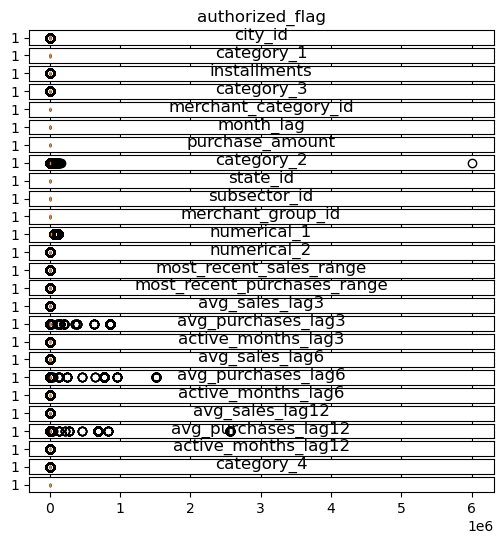

C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:



invalid value encountered in subtract



C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:



invalid value encountered in subtract



C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:



invalid value encountered in subtract



C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:



invalid value encountered in subtract



C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:



invalid value encountered in subtract



C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:



invalid value encountered in subtract



C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning:



invalid value encountered in subtract



C:\Users\DEBI\anaconda3\lib\site-packages\numpy\lib\fun

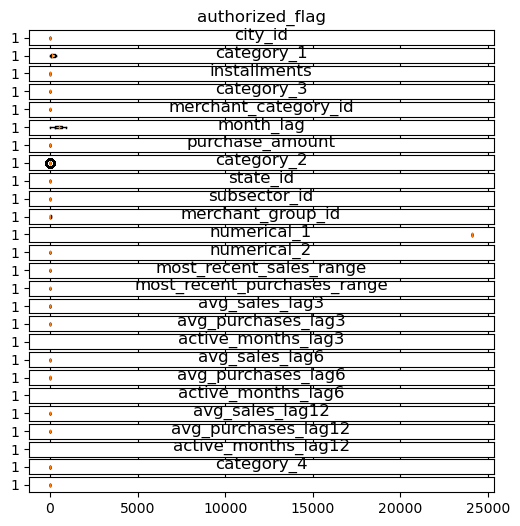

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Identify the variables to analyze
variables =['authorized_flag', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'month_lag', 'purchase_amount',
       'category_2', 'state_id', 'subsector_id', 'merchant_group_id',
       'numerical_1', 'numerical_2', 'most_recent_sales_range',
       'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3',
       'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6',
       'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12',
       'active_months_lag12', 'category_4']

# Visualize the data before removing outliers
fig, axs = plt.subplots(len(variables), 1, figsize=(6, 6), sharex=True, sharey=False)
for i, variable in enumerate(variables):
    axs[i].boxplot(merged_data_3[variable], vert=False)
    axs[i].set_title(variable)
plt.tight_layout()
plt.show()

# Calculate the IQR for each variable
for variable in variables:
    q1 = merged_data_3[variable].quantile(0.25)
    q3 = merged_data_3[variable].quantile(0.75)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify and remove outliers
    outliers = merged_data_3[(merged_data_3[variable] < lower_bound) | (merged_data_3[variable] > upper_bound)]
    merged_data_3 = merged_data_3[~merged_data_3.isin(outliers)].dropna()

# Visualize the data after removing outliers
fig, axs = plt.subplots(len(variables), 1, figsize=(6, 6), sharex=True, sharey=False)
for i, variable in enumerate(variables):
    axs[i].boxplot(merged_data_3[variable], vert=False)
    axs[i].set_title(variable)
plt.tight_layout()
plt.show()


In [ ]:
merged_data_3.shape


(8302677, 29)

In [ ]:

# Save the cleaned dataset to a CSV file
merged_data_3.to_csv('merged_data_3.csv', index=False)

In [ ]:
['authorized_flag', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'month_lag', 'purchase_amount',
       'category_2', 'state_id', 'subsector_id', 'merchant_group_id',
       'numerical_1', 'numerical_2', 'most_recent_sales_range',
       'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3',
       'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6',
       'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12',
       'active_months_lag12', 'category_4']

['authorized_flag',
 'city_id',
 'category_1',
 'installments',
 'category_3',
 'merchant_category_id',
 'month_lag',
 'purchase_amount',
 'category_2',
 'state_id',
 'subsector_id',
 'merchant_group_id',
 'numerical_1',
 'numerical_2',
 'most_recent_sales_range',
 'most_recent_purchases_range',
 'avg_sales_lag3',
 'avg_purchases_lag3',
 'active_months_lag3',
 'avg_sales_lag6',
 'avg_purchases_lag6',
 'active_months_lag6',
 'avg_sales_lag12',
 'avg_purchases_lag12',
 'active_months_lag12',
 'category_4']

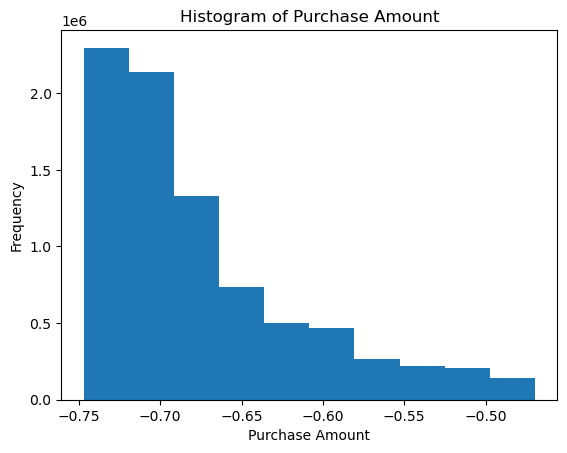

In [ ]:
import matplotlib.pyplot as plt

# create a histogram of the `purchase_amount` column
plt.hist(merged_data_3['purchase_amount'])
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase Amount')
plt.show()

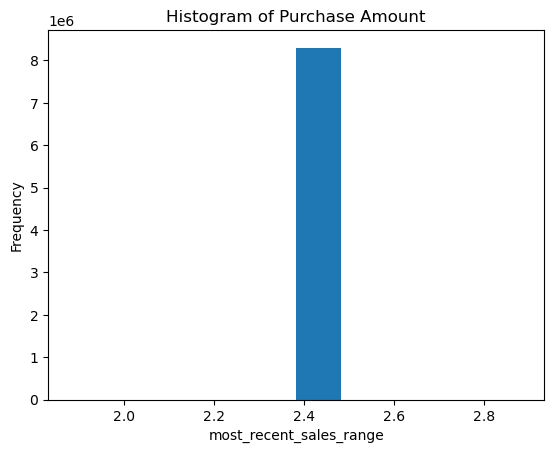

In [ ]:
import matplotlib.pyplot as plt

# create a histogram of the `purchase_amount` column
plt.hist(merged_data_3['most_recent_sales_range'])
plt.xlabel('most_recent_sales_range')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase Amount')
plt.show()

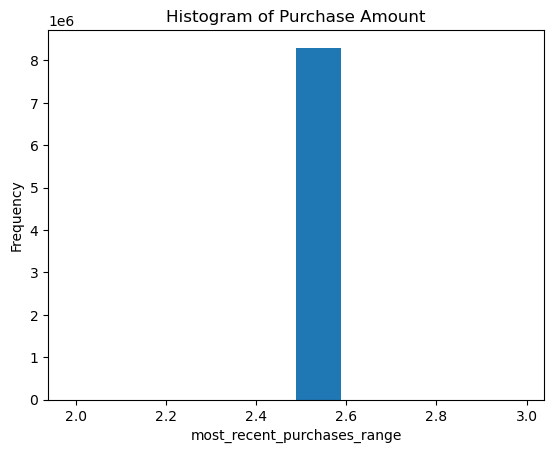

In [ ]:
import matplotlib.pyplot as plt

# create a histogram of the `purchase_amount` column
plt.hist(merged_data_3['most_recent_purchases_range'])
plt.xlabel('most_recent_purchases_range')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase Amount')
plt.show()

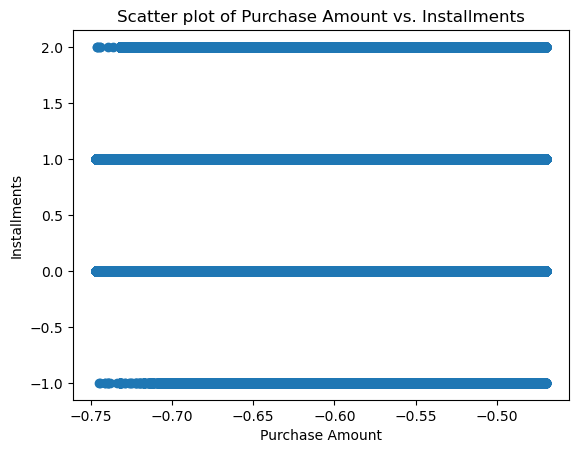

In [ ]:
import matplotlib.pyplot as plt

# create a scatter plot of `purchase_amount` vs. `installments`
plt.scatter(merged_data_3['purchase_amount'], merged_data_3['installments'])
plt.xlabel('Purchase Amount')
plt.ylabel('Installments')
plt.title('Scatter plot of Purchase Amount vs. Installments')
plt.show()

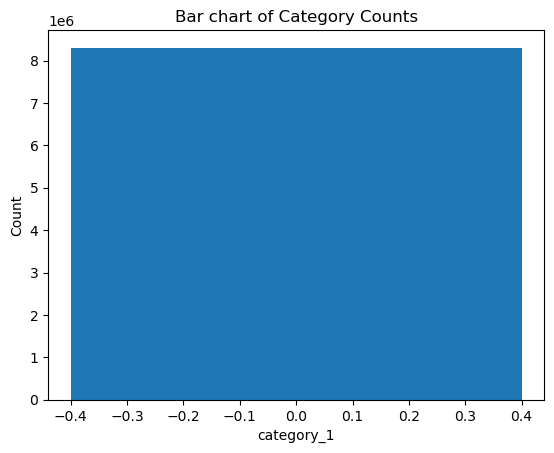

In [ ]:
import matplotlib.pyplot as plt

# create a bar chart of the `category` column
category_counts = merged_data_3['category_1'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('category_1')
plt.ylabel('Count')
plt.title('Bar chart of Category Counts')
plt.show()

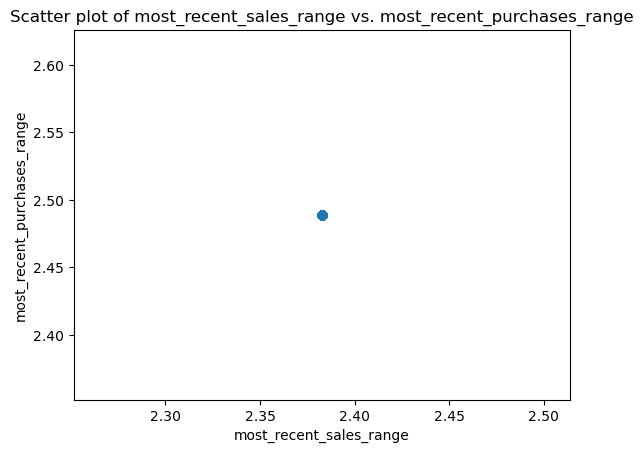

In [ ]:
import matplotlib.pyplot as plt

# create a scatter plot of `purchase_amount` vs. `installments`
plt.scatter(merged_data_3['most_recent_sales_range'], merged_data_3['most_recent_purchases_range'])
plt.xlabel('most_recent_sales_range')
plt.ylabel('most_recent_purchases_range')
plt.title('Scatter plot of most_recent_sales_range vs. most_recent_purchases_range')
plt.show()

<Axes: >

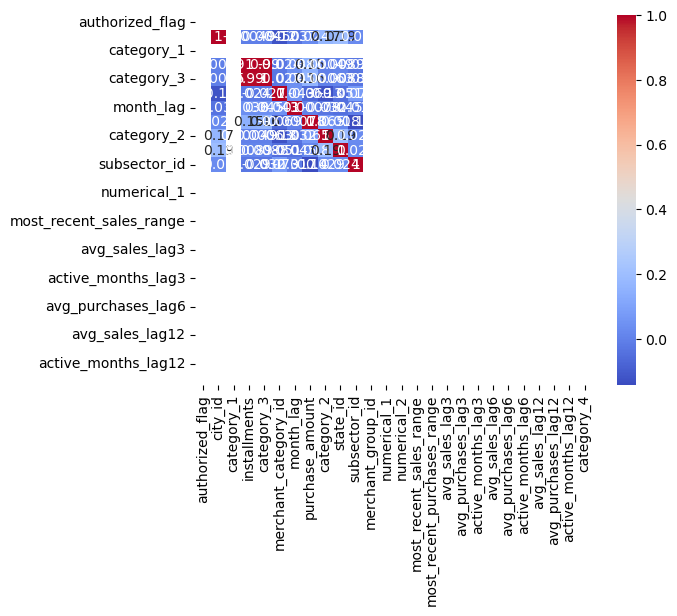

In [ ]:
import pandas as pd
import seaborn as sns


X = merged_data_3[['authorized_flag', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'month_lag', 'purchase_amount',
       'category_2', 'state_id', 'subsector_id', 'merchant_group_id',
       'numerical_1', 'numerical_2', 'most_recent_sales_range',
       'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3',
       'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6',
       'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12',
       'active_months_lag12', 'category_4']]
# Calculate the correlation matrix
corr_matrix = X.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [ ]:
import numpy as np
import pandas as pd


# calculate correlation matrix
corr_matrix = merged_data_3.corr().abs()

# create a mask to remove highly correlated features
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_corr = corr_matrix.mask(mask).stack().sort_values(ascending=False)
high_corr = high_corr[high_corr > 0.8].reset_index()

# exclude most_recent_purchases_range and most_recent_sales_range from the list of highly correlated features to drop
high_corr_cols = pd.Series(high_corr['level_0'].unique())
high_corr_cols = high_corr_cols[~high_corr_cols.isin(['most_recent_sales_range', 'most_recent_purchases_range'])]

# remove highly correlated features
merged_data_3 = merged_data_3.drop(high_corr_cols, axis=1)

C:\Users\DEBI\AppData\Local\Temp\ipykernel_8768\2023943097.py:6: FutureWarning:



The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.




In [ ]:
merged_data_3

authorized_flag          card_id  city_id  category_1  installments  \
11                    1.0  C_ID_4e6213e9bc     -1.0         0.0           0.0   
16                    1.0  C_ID_4e6213e9bc     69.0         0.0           0.0   
23                    1.0  C_ID_4e6213e9bc     88.0         0.0           0.0   
26                    1.0  C_ID_4e6213e9bc     88.0         0.0           0.0   
30                    1.0  C_ID_4e6213e9bc     -1.0         0.0           0.0   
...                   ...              ...      ...         ...           ...   
31177682              1.0  C_ID_c07707ff74    194.0         0.0           2.0   
31177684              1.0  C_ID_01d35d1005    109.0         0.0           0.0   
31177685              1.0  C_ID_611d4d588f    302.0         0.0           1.0   
31177689              1.0  C_ID_f112aa3381    158.0         0.0           0.0   
31177692              1.0  C_ID_a935410f8e     19.0         0.0           0.0   

          merchant_category_id      merchant_id  month_lag  purchase_amount  \
11                       560.0  M_ID_7c5e93af2f        0.0        -0.727929   
16                       879.0  M_ID_00a6ca8a8a        0.0        -0.725871   
23                       278.0  M_ID_e020e9b302       -9.0        -0.726998   
26                       278.0  M_ID_e020e9b302      -10.0        -0.726472   
30                        80.0  M_ID_98b342c0e3        0.0        -0.724368   
...                        ...              ...        ...              ...   
31177682                  87.0  M_ID_7dabac675c        1.0        -0.476431   
31177684                 195.0  M_ID_f028b9c665        1.0        -0.679439   
31177685                 307.0  M_ID_ee5a6f6a35        2.0        -0.731881   
31177689                 560.0  M_ID_da063195b7        2.0        -0.694390   
31177692                 278.0  M_ID_d855771cd9        2.0        -0.739395   

               purchase_date  ...  avg_sales_lag3  avg_purchases_lag3  \
11       2018-02-08 20:05:45  ...             1.0                 inf   
16       2018-02-07 12:19:33  ...             1.0                 inf   
23       2017-05-06 12:29:50  ...             1.0                 inf   
26       2017-04-29 12:30:03  ...             1.0                 inf   
30       2018-02-27 09:04:48  ...             1.0                 inf   
...                      ...  ...             ...                 ...   
31177682 2018-03-29 17:41:22  ...             1.0                 inf   
31177684 2018-03-28 14:47:17  ...             1.0                 inf   
31177685 2018-03-11 15:07:49  ...             1.0                 inf   
31177689 2018-03-07 13:19:18  ...             1.0                 inf   
31177692 2018-04-11 07:59:46  ...             1.0                 inf   

          active_months_lag3  avg_sales_lag6  avg_purchases_lag6  \
11                  2.999637             1.0                 inf   
16                  2.999637             1.0                 inf   
23                  2.999637             1.0                 inf   
26                  2.999637             1.0                 inf   
30                  2.999637             1.0                 inf   
...                      ...             ...                 ...   
31177682            2.999637             1.0                 inf   
31177684            2.999637             1.0                 inf   
31177685            2.999637             1.0                 inf   
31177689            2.999637             1.0                 inf   
31177692            2.999637             1.0                 inf   

          active_months_lag6  avg_sales_lag12  avg_purchases_lag12  \
11                  5.996975              1.0                  inf   
16                  5.996975              1.0                  inf   
23                  5.996975              1.0                  inf   
26                  5.996975              1.0                  inf   
30                  5.996975              1.

In [ ]:
merged_data_3.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'merchant_id', 'month_lag', 'purchase_amount',
       'purchase_date', 'category_2', 'state_id', 'subsector_id',
       'merchant_group_id', 'numerical_1', 'numerical_2',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4'],
      dtype='object')

create features

Average purchase amount per merchant: Create a new feature called avg_purchase_amount_per_merchant by calculating the average purchase amount for each customer per merchant. This can help identify which merchants are more popular among customers and which customers spend more at certain merchant

In [ ]:
merged_data_3['avg_purchase_amount_per_merchant'] = merged_data_3.groupby(['card_id', 'merchant_id'])['purchase_amount'].transform('mean')

In [ ]:
merged_data_3

authorized_flag          card_id  city_id  category_1  installments  \
11                    1.0  C_ID_4e6213e9bc     -1.0         0.0           0.0   
16                    1.0  C_ID_4e6213e9bc     69.0         0.0           0.0   
23                    1.0  C_ID_4e6213e9bc     88.0         0.0           0.0   
26                    1.0  C_ID_4e6213e9bc     88.0         0.0           0.0   
30                    1.0  C_ID_4e6213e9bc     -1.0         0.0           0.0   
...                   ...              ...      ...         ...           ...   
31177682              1.0  C_ID_c07707ff74    194.0         0.0           2.0   
31177684              1.0  C_ID_01d35d1005    109.0         0.0           0.0   
31177685              1.0  C_ID_611d4d588f    302.0         0.0           1.0   
31177689              1.0  C_ID_f112aa3381    158.0         0.0           0.0   
31177692              1.0  C_ID_a935410f8e     19.0         0.0           0.0   

          merchant_category_id      merchant_id  month_lag  purchase_amount  \
11                       560.0  M_ID_7c5e93af2f        0.0        -0.727929   
16                       879.0  M_ID_00a6ca8a8a        0.0        -0.725871   
23                       278.0  M_ID_e020e9b302       -9.0        -0.726998   
26                       278.0  M_ID_e020e9b302      -10.0        -0.726472   
30                        80.0  M_ID_98b342c0e3        0.0        -0.724368   
...                        ...              ...        ...              ...   
31177682                  87.0  M_ID_7dabac675c        1.0        -0.476431   
31177684                 195.0  M_ID_f028b9c665        1.0        -0.679439   
31177685                 307.0  M_ID_ee5a6f6a35        2.0        -0.731881   
31177689                 560.0  M_ID_da063195b7        2.0        -0.694390   
31177692                 278.0  M_ID_d855771cd9        2.0        -0.739395   

               purchase_date  ...  avg_purchases_lag3  active_months_lag3  \
11       2018-02-08 20:05:45  ...                 inf            2.999637   
16       2018-02-07 12:19:33  ...                 inf            2.999637   
23       2017-05-06 12:29:50  ...                 inf            2.999637   
26       2017-04-29 12:30:03  ...                 inf            2.999637   
30       2018-02-27 09:04:48  ...                 inf            2.999637   
...                      ...  ...                 ...                 ...   
31177682 2018-03-29 17:41:22  ...                 inf            2.999637   
31177684 2018-03-28 14:47:17  ...                 inf            2.999637   
31177685 2018-03-11 15:07:49  ...                 inf            2.999637   
31177689 2018-03-07 13:19:18  ...                 inf            2.999637   
31177692 2018-04-11 07:59:46  ...                 inf            2.999637   

          avg_sales_lag6  avg_purchases_lag6  active_months_lag6  \
11                   1.0                 inf            5.996975   
16                   1.0                 inf            5.996975   
23                   1.0                 inf            5.996975   
26                   1.0                 inf            5.996975   
30                   1.0                 inf            5.996975   
...                  ...                 ...                 ...   
31177682             1.0                 inf            5.996975   
31177684             1.0                 inf            5.996975   
31177685             1.0                 inf            5.996975   
31177689             1.0                 inf            5.996975   
31177692             1.0                 inf            5.996975   

          avg_sales_lag12  avg_purchases_lag12  active_months_lag12  \
11                    1.0                  inf            11.933166   
16                    1.0                  inf            11.933166   
23                    1.0                  inf            11.933166   
26                    1.0                  inf            11.9

we are creating a new feature called num_transactions_per_card that counts the number of transactions made by each customer. We use the groupby() method to group the DataFrame by card_id and then apply the count() method to the purchase_amount column for each group. The resulting series is then broadcasted back to the original DataFrame to create a new feature that captures the number of transactions per customer.

This new feature can be useful for identifying which customers are more active and which customers may be more likely to churn. For example, customers who have a high number of transactions may be more loyal to the business and less likely to churn, while customers who have a low number of transactions may be more at risk of churning and may require targeted marketing campaigns to retain them.

In [ ]:
merged_data_3['num_transactions_per_card'] = merged_data_3.groupby('card_id')['purchase_amount'].transform('count')

In [ ]:
merged_data_3

authorized_flag          card_id  city_id  category_1  installments  \
11                    1.0  C_ID_4e6213e9bc     -1.0         0.0           0.0   
16                    1.0  C_ID_4e6213e9bc     69.0         0.0           0.0   
23                    1.0  C_ID_4e6213e9bc     88.0         0.0           0.0   
26                    1.0  C_ID_4e6213e9bc     88.0         0.0           0.0   
30                    1.0  C_ID_4e6213e9bc     -1.0         0.0           0.0   
...                   ...              ...      ...         ...           ...   
31177682              1.0  C_ID_c07707ff74    194.0         0.0           2.0   
31177684              1.0  C_ID_01d35d1005    109.0         0.0           0.0   
31177685              1.0  C_ID_611d4d588f    302.0         0.0           1.0   
31177689              1.0  C_ID_f112aa3381    158.0         0.0           0.0   
31177692              1.0  C_ID_a935410f8e     19.0         0.0           0.0   

          merchant_category_id      merchant_id  month_lag  purchase_amount  \
11                       560.0  M_ID_7c5e93af2f        0.0        -0.727929   
16                       879.0  M_ID_00a6ca8a8a        0.0        -0.725871   
23                       278.0  M_ID_e020e9b302       -9.0        -0.726998   
26                       278.0  M_ID_e020e9b302      -10.0        -0.726472   
30                        80.0  M_ID_98b342c0e3        0.0        -0.724368   
...                        ...              ...        ...              ...   
31177682                  87.0  M_ID_7dabac675c        1.0        -0.476431   
31177684                 195.0  M_ID_f028b9c665        1.0        -0.679439   
31177685                 307.0  M_ID_ee5a6f6a35        2.0        -0.731881   
31177689                 560.0  M_ID_da063195b7        2.0        -0.694390   
31177692                 278.0  M_ID_d855771cd9        2.0        -0.739395   

               purchase_date  ...  active_months_lag3  avg_sales_lag6  \
11       2018-02-08 20:05:45  ...            2.999637             1.0   
16       2018-02-07 12:19:33  ...            2.999637             1.0   
23       2017-05-06 12:29:50  ...            2.999637             1.0   
26       2017-04-29 12:30:03  ...            2.999637             1.0   
30       2018-02-27 09:04:48  ...            2.999637             1.0   
...                      ...  ...                 ...             ...   
31177682 2018-03-29 17:41:22  ...            2.999637             1.0   
31177684 2018-03-28 14:47:17  ...            2.999637             1.0   
31177685 2018-03-11 15:07:49  ...            2.999637             1.0   
31177689 2018-03-07 13:19:18  ...            2.999637             1.0   
31177692 2018-04-11 07:59:46  ...            2.999637             1.0   

          avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
11                       inf            5.996975              1.0   
16                       inf            5.996975              1.0   
23                       inf            5.996975              1.0   
26                       inf            5.996975              1.0   
30                       inf            5.996975              1.0   
...                      ...                 ...              ...   
31177682                 inf            5.996975              1.0   
31177684                 inf            5.996975              1.0   
31177685                 inf            5.996975              1.0   
31177689                 inf            5.996975              1.0   
31177692                 inf            5.996975              1.0   

          avg_purchases_lag12  active_months_lag12  category_4  \
11                        inf            11.933166    0.577777   
16                        inf            11.933166    0.577777   
23                        inf            11.933166    0.577777   
26                        inf            11.933166    0.577777   
30                        inf            11.933166  

we are creating a new feature called days_since_last_purchase that calculates the number of days between current and previous purchase for each customer. We use the groupby() method to group the DataFrame by card_id and then apply the diff() method to the purchase_date column to calculate the time difference between the current purchase and the previous purchase. We then use the dt.days attribute to extract the number of days from the resulting time delta series. The resulting series is then broadcasted back to the original DataFrame to create a new feature that captures the number of days since the last purchase for each customer.

This new feature can be useful for identifying customers who have not made a purchase in a long time and may require targeted marketing campaigns to re-engage them. For example, customers who have a high days_since_last_purchase value may be more at risk of churning and may require targeted offers or promotions to incentivize them to make a purchase.

In [ ]:
merged_data_3['days_since_last_purchase'] = merged_data_3.groupby('card_id')['purchase_date'].diff().dt.days

In [ ]:
merged_data_3

authorized_flag          card_id  city_id  category_1  installments  \
11                    1.0  C_ID_4e6213e9bc     -1.0         0.0           0.0   
16                    1.0  C_ID_4e6213e9bc     69.0         0.0           0.0   
23                    1.0  C_ID_4e6213e9bc     88.0         0.0           0.0   
26                    1.0  C_ID_4e6213e9bc     88.0         0.0           0.0   
30                    1.0  C_ID_4e6213e9bc     -1.0         0.0           0.0   
...                   ...              ...      ...         ...           ...   
31177682              1.0  C_ID_c07707ff74    194.0         0.0           2.0   
31177684              1.0  C_ID_01d35d1005    109.0         0.0           0.0   
31177685              1.0  C_ID_611d4d588f    302.0         0.0           1.0   
31177689              1.0  C_ID_f112aa3381    158.0         0.0           0.0   
31177692              1.0  C_ID_a935410f8e     19.0         0.0           0.0   

          merchant_category_id      merchant_id  month_lag  purchase_amount  \
11                       560.0  M_ID_7c5e93af2f        0.0        -0.727929   
16                       879.0  M_ID_00a6ca8a8a        0.0        -0.725871   
23                       278.0  M_ID_e020e9b302       -9.0        -0.726998   
26                       278.0  M_ID_e020e9b302      -10.0        -0.726472   
30                        80.0  M_ID_98b342c0e3        0.0        -0.724368   
...                        ...              ...        ...              ...   
31177682                  87.0  M_ID_7dabac675c        1.0        -0.476431   
31177684                 195.0  M_ID_f028b9c665        1.0        -0.679439   
31177685                 307.0  M_ID_ee5a6f6a35        2.0        -0.731881   
31177689                 560.0  M_ID_da063195b7        2.0        -0.694390   
31177692                 278.0  M_ID_d855771cd9        2.0        -0.739395   

               purchase_date  ...  avg_sales_lag6  avg_purchases_lag6  \
11       2018-02-08 20:05:45  ...             1.0                 inf   
16       2018-02-07 12:19:33  ...             1.0                 inf   
23       2017-05-06 12:29:50  ...             1.0                 inf   
26       2017-04-29 12:30:03  ...             1.0                 inf   
30       2018-02-27 09:04:48  ...             1.0                 inf   
...                      ...  ...             ...                 ...   
31177682 2018-03-29 17:41:22  ...             1.0                 inf   
31177684 2018-03-28 14:47:17  ...             1.0                 inf   
31177685 2018-03-11 15:07:49  ...             1.0                 inf   
31177689 2018-03-07 13:19:18  ...             1.0                 inf   
31177692 2018-04-11 07:59:46  ...             1.0                 inf   

          active_months_lag6  avg_sales_lag12  avg_purchases_lag12  \
11                  5.996975              1.0                  inf   
16                  5.996975              1.0                  inf   
23                  5.996975              1.0                  inf   
26                  5.996975              1.0                  inf   
30                  5.996975              1.0                  inf   
...                      ...              ...                  ...   
31177682            5.996975              1.0                  inf   
31177684            5.996975              1.0                  inf   
31177685            5.996975              1.0                  inf   
31177689            5.996975              1.0                  inf   
31177692            5.996975              1.0                  inf   

          active_months_lag12  category_4  avg_purchase_amount_per_merchant  \
11                  11.933166    0.577777                         -0.727929   
16                  11.933166    0.577777                         -0.724705   
23                  11.933166    0.577777                         -0.728103   
26                  11.933166    0.577777             

In [ ]:
merged_data_3.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'merchant_id', 'month_lag', 'purchase_amount',
       'purchase_date', 'category_2', 'state_id', 'subsector_id',
       'merchant_group_id', 'numerical_1', 'numerical_2',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'avg_purchase_amount_per_merchant',
       'num_transactions_per_card', 'days_since_last_purchase'],
      dtype='object')

 here's an explanation of why each aggregation function was used for each column in the example:

- `authorized_flag`: The `authorized_flag` column contains binary values indicating whether a transaction was authorized or not. We use the `max()` function to get the maximum value for each group, which is equivalent to checking whether any transaction was authorized for the customer.

- `card_id`: The `card_id` column contains unique identifiers for each customer. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `city_id`: The `city_id` column contains categorical values indicating the city where the transaction was made. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `category_1`: The `category_1` column contains binary values indicating whether a transaction belongs to a certain category or not. We use the `max()` function to get the maximum value for each group, which is equivalent to checking whether any transaction belongs to the category for the customer.

- `installments`: The `installments` column contains numerical values indicating the number of installments for a transaction. We use the `sum()` function to get the total number of installments for each group, which is equivalent to adding up the values for all transactions.

- `merchant_category_id`: The `merchant_category_id` column contains categorical values indicating the category of the merchant where the transaction was made. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `merchant_id`: The `merchant_id` column contains unique identifiers for each merchant. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `month_lag`: The `month_lag` column contains numerical values indicating the number of months between the transaction date and a reference date. We use the `mean()` function to get the average value for each group, which is equivalent to calculating the average lag between the transaction date and the reference date for the customer.

- `purchase_amount`: The `purchase_amount` column contains numerical values indicating the amount of the transaction. We use the `sum()` function to get the total purchase amount for each group, which is equivalent to adding up the values for all transactions.

- `purchase_date`: The `purchase_date` column contains datetime values indicating the date and time of the transaction. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `category_2`: The `category_2` column contains categorical values indicating a second category for the transaction. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `state_id`: The `state_id` column contains categorical values indicating the state where the transaction was made. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `subsector_id`: The `subsector_id` column contains categorical values indicating a subcategory of the merchant where the transaction was made. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `merchant_group_id`: The `merchant_group_id` column contains categorical values indicating a group of merchants. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `numerical_1`: The `numerical_1` column contains numerical values. We use the `mean()` function to get the average value for each group, which is equivalent to calculating the average value of the column for the customer.

- `most_recent_sales_range`: The `most_recent_sales_range` column contains categorical values indicating the sales range for the merchant where the transaction was made. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `most_recent_purchases_range`: The `most_recent_purchases_range` column contains categorical values indicating the purchases range for the merchant where the transaction was made. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `avg_sales_lag3`: The `avg_sales_lag3` column contains numerical values indicating the average sales for the merchant in the last 3 months. We use the `mean()` function to get the average value for each group, which is equivalent to calculating the average sales for the merchant in the last 3 months for the customer.

- `active_months_lag3`: The `active_months_lag3` column contains numerical values indicating the number of active months for the merchant in the last 3 months. We use the `mean()` function to get the average value for each group,which is equivalent to calculating the average number of active months for the merchant in the last 3 months for the customer.

- `active_months_lag6`: The `active_months_lag6` column contains numerical values indicating the number of active months for the merchant in the last 6 months. We use the `mean()` function to get the average value for each group, which is equivalent to calculating the average number of active months for the merchant in the last 6 months for the customer.

- `active_months_lag12`: The `active_months_lag12` column contains numerical values indicating the number of active months for the merchant in the last 12 months. We use the `mean()` function to get the average value for each group, which is equivalent to calculating the average number of active months for the merchant in the last 12 months for the customer.

- `category_4`: The `category_4` column contains binary values indicating whether a transaction belongs to a certain category or not. We use the `first()` function to get the first value for each group, which is equivalent to keeping the original value.

- `avg_purchase_amount_per_merchant`: The `avg_purchase_amount_per_merchant` column was created as a new feature that captures the average purchase amount per merchant for each customer. We use the `mean()` function to get the average value for each group, which is equivalent to calculating the average purchase amount per merchant for the customer.

- `num_transactions_per_card`: The `num_transactions_per_card` column was created as a new feature that captures the total number of transactions per card for each customer. We use the `sum()` function to get the total number of transactions for each group, which is equivalent to adding up the values for all transactions.

- `days_since_last_purchase`: The `days_since_last_purchase` column was created as a new feature that captures the number of days since the customer's last purchase. We use the `max()` function to get the maximum value for each group, which is equivalent to getting the most recent value for the column for the customer.

In [ ]:
aggregation_functions = {'authorized_flag': 'max',
                         'card_id': 'first',
                         'city_id': 'first',
                         'category_1': 'max',
                         'installments': 'sum',
                         'merchant_category_id': 'first',
                         'merchant_id': 'first',
                         'month_lag': 'mean',
                         'purchase_amount': 'sum',
                         'purchase_date': 'first',
                         'category_2': 'first',
                         'state_id': 'first',
                         'subsector_id': 'first',
                         'merchant_group_id': 'first',
                         'numerical_1': 'mean',
                         'most_recent_sales_range': 'first',
                         'most_recent_purchases_range': 'first',
                         'avg_sales_lag3': 'mean',
                         'active_months_lag3': 'mean',
                         'active_months_lag6': 'mean',
                         'active_months_lag12': 'mean',
                         'category_4': 'first',
                         'avg_purchase_amount_per_merchant': 'mean',
                         'num_transactions_per_card': 'sum',
                         'days_since_last_purchase': 'max'}

grouped_df = merged_data_3.groupby('card_id').agg(aggregation_functions)

In [ ]:
# get numeric columns
num_cols = grouped_df.select_dtypes(include=['int', 'float']).columns

# print numeric columns
print("Numeric columns in the dataset:")
print(num_cols)

Numeric columns in the dataset:

Index(['authorized_flag', 'city_id', 'category_1', 'installments',

       'merchant_category_id', 'month_lag', 'purchase_amount', 'category_2',

       'state_id', 'subsector_id', 'merchant_group_id', 'numerical_1',

       'most_recent_sales_range', 'most_recent_purchases_range',

       'avg_sales_lag3', 'active_months_lag3', 'active_months_lag6',

       'active_months_lag12', 'category_4', 'avg_purchase_amount_per_merchant',

       'num_transactions_per_card', 'days_since_last_purchase'],

      dtype='object')


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
# Standardize the numerical data in place
grouped_df[num_cols] = StandardScaler().fit_transform(grouped_df[num_cols])

# Build the K-means model
kmeans = KMeans(n_clusters=5, random_state=42)



In [ ]:
grouped_df

authorized_flag          card_id   city_id  category_1  \
card_id                                                                   
C_ID_00007093c1              0.0  C_ID_00007093c1  0.992697         0.0   
C_ID_0001238066              0.0  C_ID_0001238066 -0.652469         0.0   
C_ID_0001506ef0              0.0  C_ID_0001506ef0 -0.652469         0.0   
C_ID_0001793786              0.0  C_ID_0001793786  0.381636         0.0   
C_ID_000183fdda              0.0  C_ID_000183fdda -0.652469         0.0   
...                          ...              ...       ...         ...   
C_ID_fffeed3a89              0.0  C_ID_fffeed3a89  1.829382         0.0   
C_ID_ffff579d3a              0.0  C_ID_ffff579d3a -1.122517         0.0   
C_ID_ffff756266              0.0  C_ID_ffff756266  0.889287         0.0   
C_ID_ffff828181              0.0  C_ID_ffff828181 -0.398643         0.0   
C_ID_fffffd5772              0.0  C_ID_fffffd5772 -1.113116         0.0   

                 installments  merchant_category_id      merchant_id  \
card_id                                                                
C_ID_00007093c1      1.877274             -0.743179  M_ID_9400cf2342   
C_ID_0001238066      0.460166              0.209931  M_ID_50f575c681   
C_ID_0001506ef0     -0.420738              1.403194  M_ID_00a6ca8a8a   
C_ID_0001793786     -0.420738             -0.851998  M_ID_bff5cd4d78   
C_ID_000183fdda      0.306966              1.403194  M_ID_00a6ca8a8a   
...                       ...                   ...              ...   
C_ID_fffeed3a89      1.647473             -1.594974  M_ID_c041e60c64   
C_ID_ffff579d3a     -0.420738             -1.568707  M_ID_a413edc367   
C_ID_ffff756266     -0.305837              0.667724  M_ID_fc48b96259   
C_ID_ffff828181      4.788088              1.421956  M_ID_5fa611576f   
C_ID_fffffd5772      1.455972             -0.743179  M_ID_55cb8d33dc   

                 month_lag  purchase_amount       purchase_date  ...  \
card_id                                                          ...   
C_ID_00007093c1  -1.154463        -0.536001 2017-10-02 19:09:42  ...   
C_ID_0001238066   0.889906         0.110648 2018-02-13 21:23:09  ...   
C_ID_0001506ef0  -1.248689         0.326483 2017-12-09 12:55:15  ...   
C_ID_0001793786   0.130264        -1.050108 2017-09-08 15:13:07  ...   
C_ID_000183fdda   0.395846         0.207059 2017-09-26 22:13:09  ...   
...                    ...              ...                 ...  ...   
C_ID_fffeed3a89   1.230283        -0.658856 2017-12-30 06:43:39  ...   
C_ID_ffff579d3a  -0.051576        -0.007782 2018-02-09 11:28:16  ...   
C_ID_ffff756266  -0.703169         0.595269 2017-09-26 15:59:00  ...   
C_ID_ffff828181  -0.958102        -2.510764 2017-12-09 19:04:14  ...   
C_ID_fffffd5772   0.548317        -0.591534 2017-11-19 09:57:33  ...   

                 most_recent_sales_range  most_recent_purchases_range  \
card_id                                                                 
C_ID_00007093c1            -4.440892e-16                -1.776357e-15   
C_ID_0001238066            -4.440892e-16                -1.776357e-15   
C_ID_0001506ef0            -4.440892e-16                -1.776357e-15   
C_ID_0001793786            -4.440892e-16                -1.776357e-15   
C_ID_000183fdda            -4.440892e-16                -1.776357e-15   
...                                  ...                          ...   
C_ID_fffeed3a89            -4.440892e-16                -1.776357e-15   
C_ID_ffff579d3a            -4.440892e-16                -1.776357e-15   
C_ID_ffff756266            -4.440892e-16                -1.776357e-15   
C_ID_ffff828181            -4.440892e-16                -1.776357e-15   
C_ID_fffffd5772            -4.440892e-16                -1.776357e-15   

                 avg_sales_lag3  active_months_lag3  active_months_lag6  \
card_id                                                                   
C_ID_00007093c1             0.0        4.440892e-16       -4.440892

In [ ]:
grouped_df_2 = grouped_df.copy()

In [ ]:
grouped_df_2.drop(['card_id'], axis=1, inplace=True)
grouped_df_2.reset_index(inplace = True)

In [ ]:
grouped_df_2

card_id  authorized_flag   city_id  category_1  installments  \
0       C_ID_00007093c1              0.0  0.992697         0.0      1.877274   
1       C_ID_0001238066              0.0 -0.652469         0.0      0.460166   
2       C_ID_0001506ef0              0.0 -0.652469         0.0     -0.420738   
3       C_ID_0001793786              0.0  0.381636         0.0     -0.420738   
4       C_ID_000183fdda              0.0 -0.652469         0.0      0.306966   
...                 ...              ...       ...         ...           ...   
307122  C_ID_fffeed3a89              0.0  1.829382         0.0      1.647473   
307123  C_ID_ffff579d3a              0.0 -1.122517         0.0     -0.420738   
307124  C_ID_ffff756266              0.0  0.889287         0.0     -0.305837   
307125  C_ID_ffff828181              0.0 -0.398643         0.0      4.788088   
307126  C_ID_fffffd5772              0.0 -1.113116         0.0      1.455972   

        merchant_category_id      merchant_id  month_lag  purchase_amount  \
0                  -0.743179  M_ID_9400cf2342  -1.154463        -0.536001   
1                   0.209931  M_ID_50f575c681   0.889906         0.110648   
2                   1.403194  M_ID_00a6ca8a8a  -1.248689         0.326483   
3                  -0.851998  M_ID_bff5cd4d78   0.130264        -1.050108   
4                   1.403194  M_ID_00a6ca8a8a   0.395846         0.207059   
...                      ...              ...        ...              ...   
307122             -1.594974  M_ID_c041e60c64   1.230283        -0.658856   
307123             -1.568707  M_ID_a413edc367  -0.051576        -0.007782   
307124              0.667724  M_ID_fc48b96259  -0.703169         0.595269   
307125              1.421956  M_ID_5fa611576f  -0.958102        -2.510764   
307126             -0.743179  M_ID_55cb8d33dc   0.548317        -0.591534   

             purchase_date  ...  most_recent_sales_range  \
0      2017-10-02 19:09:42  ...            -4.440892e-16   
1      2018-02-13 21:23:09  ...            -4.440892e-16   
2      2017-12-09 12:55:15  ...            -4.440892e-16   
3      2017-09-08 15:13:07  ...            -4.440892e-16   
4      2017-09-26 22:13:09  ...            -4.440892e-16   
...                    ...  ...                      ...   
307122 2017-12-30 06:43:39  ...            -4.440892e-16   
307123 2018-02-09 11:28:16  ...            -4.440892e-16   
307124 2017-09-26 15:59:00  ...            -4.440892e-16   
307125 2017-12-09 19:04:14  ...            -4.440892e-16   
307126 2017-11-19 09:57:33  ...            -4.440892e-16   

        most_recent_purchases_range  avg_sales_lag3  active_months_lag3  \
0                     -1.776357e-15             0.0        4.440892e-16   
1                     -1.776357e-15             0.0        8.881784e-16   
2                     -1.776357e-15             0.0        8.881784e-16   
3                     -1.776357e-15             0.0        8.881784e-16   
4                     -1.776357e-15             0.0        8.881784e-16   
...                             ...             ...                 ...   
307122                -1.776357e-15             0.0        8.881784e-16   
307123                -1.776357e-15             0.0        8.881784e-16   
307124                -1.776357e-15             0.0        8.881784e-16   
307125                -1.776357e-15             0.0        8.881784e-16   
307126                -1.776357e-15             0.0        8.881784e-16   

        active_months_lag6  active_months_lag12    category_4  \
0            -4.440892e-15        -3.552714e-15 -1.110223e-16   
1            -4.440892e-15        -3.552714e-15 -1.110223e-16   
2            -4.440892e-15        -1.776357e-15 -1.110223e-16   
3            -4.440892e-15        -3.552714e-15 -1.110223e-16   
4            -4.440892e-15        -3.552714e-15 -1.110223e-16   
...                    ...                  ...           ...   
307122       -4.440892e-15        -5.329071e-15 -1.11

In [ ]:
grouped_df_2.drop(['merchant_id'], axis=1, inplace=True)


In [ ]:
grouped_df_2.columns

Index(['card_id', 'authorized_flag', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'month_lag', 'purchase_amount', 'purchase_date',
       'category_2', 'state_id', 'subsector_id', 'merchant_group_id',
       'numerical_1', 'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'active_months_lag3', 'active_months_lag6',
       'active_months_lag12', 'category_4', 'avg_purchase_amount_per_merchant',
       'num_transactions_per_card', 'days_since_last_purchase'],
      dtype='object')

In [ ]:
# Select all columns other than card_id
grouped_df_3 =grouped_df_2.drop(['card_id', 'purchase_date'], axis=1)



In [ ]:
grouped_df_3

authorized_flag   city_id  category_1  installments  \
0                   0.0  0.992697         0.0      1.877274   
1                   0.0 -0.652469         0.0      0.460166   
2                   0.0 -0.652469         0.0     -0.420738   
3                   0.0  0.381636         0.0     -0.420738   
4                   0.0 -0.652469         0.0      0.306966   
...                 ...       ...         ...           ...   
307122              0.0  1.829382         0.0      1.647473   
307123              0.0 -1.122517         0.0     -0.420738   
307124              0.0  0.889287         0.0     -0.305837   
307125              0.0 -0.398643         0.0      4.788088   
307126              0.0 -1.113116         0.0      1.455972   

        merchant_category_id  month_lag  purchase_amount  category_2  \
0                  -0.743179  -1.154463        -0.536001    0.668992   
1                   0.209931   0.889906         0.110648   -0.687440   
2                   1.403194  -1.248689         0.326483   -0.687440   
3                  -0.851998   0.130264        -1.050108   -0.687440   
4                   1.403194   0.395846         0.207059   -0.687440   
...                      ...        ...              ...         ...   
307122             -1.594974   1.230283        -0.658856   -0.687440   
307123             -1.568707  -0.051576        -0.007782   -0.687440   
307124              0.667724  -0.703169         0.595269   -0.687440   
307125              1.421956  -0.958102        -2.510764   -0.009224   
307126             -0.743179   0.548317        -0.591534    0.668992   

        state_id  subsector_id  ...  most_recent_sales_range  \
0      -1.634271     -0.780440  ...            -4.440892e-16   
1      -0.345283     -2.050341  ...            -4.440892e-16   
2      -0.345283      0.277810  ...            -4.440892e-16   
3      -2.186694      1.124411  ...            -4.440892e-16   
4      -0.345283      0.277810  ...            -4.440892e-16   
...          ...           ...  ...                      ...   
307122 -0.345283      1.124411  ...            -4.440892e-16   
307123 -0.345283      0.066160  ...            -4.440892e-16   
307124 -0.345283      0.806936  ...            -4.440892e-16   
307125  2.416835      0.066160  ...            -4.440892e-16   
307126  1.496129     -0.780440  ...            -4.440892e-16   

        most_recent_purchases_range  avg_sales_lag3  active_months_lag3  \
0                     -1.776357e-15             0.0        4.440892e-16   
1                     -1.776357e-15             0.0        8.881784e-16   
2                     -1.776357e-15             0.0        8.881784e-16   
3                     -1.776357e-15             0.0        8.881784e-16   
4                     -1.776357e-15             0.0        8.881784e-16   
...                             ...             ...                 ...   
307122                -1.776357e-15             0.0        8.881784e-16   
307123                -1.776357e-15             0.0        8.881784e-16   
307124                -1.776357e-15             0.0        8.881784e-16   
307125                -1.776357e-15             0.0        8.881784e-16   
307126                -1.776357e-15             0.0        8.881784e-16   

        active_months_lag6  active_months_lag12    category_4  \
0            -4.440892e-15        -3.552714e-15 -1.110223e-16   
1            -4.440892e-15        -3.552714e-15 -1.110223e-16   
2            -4.440892e-15        -1.776357e-15 -1.110223e-16   
3            -4.440892e-15        -3.552714e-15 -1.110223e-16   
4            -4.440892e-15        -3.552714e-15 -1.110223e-16   
...                    ...                  ...           ...   
307122       -4.440892e-15        -5.329071e-15 -1.110223e-16   
307123       -4.440892e-15        -1.776357e-15 -1.110223e-16   
307124       -4.440892e-15        -3.552714e-15 -1.110223e-16   
307125       -4.440892e-15        -3.552714e-15 -1.110223e-16   
3

In [ ]:
grouped_df_3.isna().sum()

authorized_flag                         0
city_id                                 0
category_1                              0
installments                            0
merchant_category_id                    0
month_lag                               0
purchase_amount                         0
category_2                              0
state_id                                0
subsector_id                            0
merchant_group_id                       0
numerical_1                             0
most_recent_sales_range                 0
most_recent_purchases_range             0
avg_sales_lag3                          0
active_months_lag3                      0
active_months_lag6                      0
active_months_lag12                     0
category_4                              0
avg_purchase_amount_per_merchant        0
num_transactions_per_card               0
days_since_last_purchase            16222
dtype: int64

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = grouped_df_3['days_since_last_purchase'].mean()

# fill NaN values with the mean value
grouped_df_3['days_since_last_purchase'].fillna(mean_value, inplace=True)

In [ ]:
!pip install yellowbrick

**at this step i passed my data to KElbowVisualizer and  Silhouette score methods to get the best k and the two methods all give me the same k=9 but i think i has problem with Silhouette scores and  i think that is because  i standrize my data but for my own analysis thought nmy data need to be scaled so that the model will not biased to features or clusters**

**and i try to visualize d  clusters using  some features from the three merged sdatset actually this step isn't required to do it in the assignment i just do it to see how the user_sscore dataset will affect the clustering by seeing the score of the elbow method and see some visualization of the clusters**

In [ ]:
# import libraries
import pandas as pd
# use the following to suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower, TTestPower

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default 

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=20), k=(2, 21))

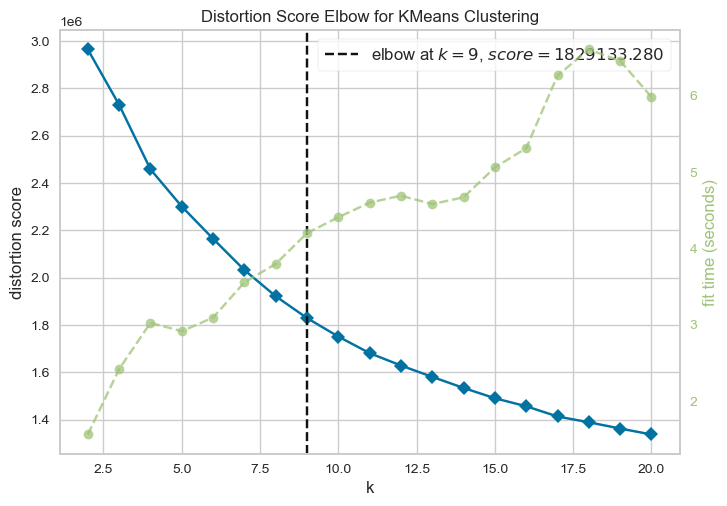

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21))

visualizer.fit(grouped_df_3)
visualizer.show()

C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 2, Silhouette Score: 0.154, Change from Previous Cluster: 0.0


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 3, Silhouette Score: 0.138, Change from Previous Cluster: -0.016


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 4, Silhouette Score: 0.125, Change from Previous Cluster: -0.013


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 5, Silhouette Score: 0.129, Change from Previous Cluster: 0.004


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 6, Silhouette Score: 0.132, Change from Previous Cluster: 0.003


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 7, Silhouette Score: 0.137, Change from Previous Cluster: 0.005


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 8, Silhouette Score: 0.147, Change from Previous Cluster: 0.01


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 9, Silhouette Score: 0.154, Change from Previous Cluster: 0.007


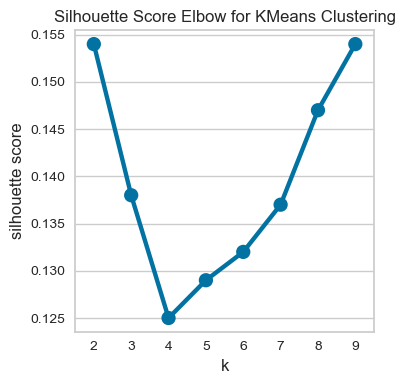

In [ ]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans

    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''

    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels,
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

optimal_kmeans(grouped_df_3, 2, 10)

In [ ]:
# Refit the K-means model with the best k value and predict the clusters
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=42)
kmeans.fit(grouped_df_3)
grouped_df_3['cluster'] = kmeans.labels_


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




KMeans(n_clusters=9, random_state=42)

In [ ]:
grouped_df_3.columns

Index(['authorized_flag', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'month_lag', 'purchase_amount', 'category_2',
       'state_id', 'subsector_id', 'merchant_group_id', 'numerical_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'active_months_lag3', 'active_months_lag6',
       'active_months_lag12', 'category_4', 'avg_purchase_amount_per_merchant',
       'num_transactions_per_card', 'days_since_last_purchase', 'cluster'],
      dtype='object')

**i group the data with cluster and that's only for three data historical,new_merchant, merchants i after that i take mean meadian for all columns or features after grouping them by cluster**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans


# Add the cluster labels to the data
grouped_df_3['cluster'] = kmeans.labels_

# Calculate the mean and median user scores for each cluster
stats = grouped_df_3.groupby('cluster').agg({'authorized_flag': ['mean', 'median'], 'city_id': ['mean', 'median'], 'category_1': ['mean', 'median'], 'installments': ['mean', 'median'], 'merchant_category_id': ['mean', 'median'], 'month_lag': ['mean', 'median'], 'purchase_amount': ['mean', 'median'], 'category_2': ['mean', 'median'], 'state_id': ['mean', 'median'], 'subsector_id': ['mean', 'median'], 'merchant_group_id': ['mean', 'median'], 'numerical_1': ['mean', 'median'], 'most_recent_sales_range': ['mean', 'median'], 'most_recent_purchases_range': ['mean', 'median'], 'avg_sales_lag3': ['mean', 'median'], 'active_months_lag3': ['mean', 'median'], 'active_months_lag6': ['mean', 'median'], 'active_months_lag12': ['mean', 'median'], 'category_4': ['mean', 'median'], 'avg_purchase_amount_per_merchant': ['mean', 'median'], 'num_transactions_per_card': ['mean', 'median'], 'days_since_last_purchase': ['mean', 'median']})

stats


authorized_flag        city_id        category_1        installments  \
                   mean median    mean median       mean median         mean   
cluster                                                                        
0                 0.000  0.000   0.154  0.100      0.000  0.000       -0.083   
1                 0.000  0.000   1.333  1.726      0.000  0.000       -0.066   
2                 0.000  0.000   0.328  0.043      0.000  0.000       -0.076   
3                 0.000  0.000  -0.318 -0.652      0.000  0.000       -0.128   
4                 0.000  0.000  -0.643 -0.652      0.000  0.000       -0.177   
5                 0.000  0.000   0.196 -0.013      0.000  0.000        2.419   
6                 0.000  0.000   0.249  0.100      0.000  0.000        3.277   
7                 0.000  0.000  -0.486 -0.652      0.000  0.000       -0.060   
8                 0.000  0.000  -0.141 -0.558      0.000  0.000       -0.239   

               merchant_category_id         ... active_months_lag12         \
        median                 mean median  ...                mean median   
cluster                                     ...                              
0       -0.421               -0.266 -0.518  ...              -0.000 -0.000   
1       -0.421               -0.521 -0.743  ...              -0.000 -0.000   
2       -0.421               -0.290 -0.518  ...              -0.000 -0.000   
3       -0.382               -0.037  0.022  ...              -0.000 -0.000   
4       -0.421                0.528  0.990  ...              -0.000 -0.000   
5        2.796               -0.072 -0.060  ...              -0.000 -0.000   
6       -0.421               -0.064  0.022  ...              -0.000 -0.000   
7       -0.421                0.216  0.514  ...              -0.000 -0.000   
8       -0.306               -0.127 -0.312  ...              -0.000 -0.000   

        category_4        avg_purchase_amount_per_merchant         \
              mean median                             mean median   
cluster                                                             
0           -0.000 -0.000                            0.060 -0.032   
1           -0.000 -0.000                           -0.117 -0.181   
2           -0.000 -0.000                            0.021 -0.042   
3           -0.000 -0.000                           -0.198 -0.272   
4           -0.000 -0.000                           -0.360 -0.433   
5           -0.000 -0.000                           -0.187 -0.249   
6           -0.000 -0.000                           -0.318 -0.357   
7           -0.000 -0.000                           -0.171 -0.265   
8           -0.000 -0.000                            2.206  2.038   

        num_transactions_per_card        days_since_last_purchase         
                             mean median                     mean median  
cluster                                                                   
0                          -0.101 -0.160                   -0.011 -0.079  
1                          -0.098 -0.160                    0.024 -0.028  
2                          -0.101 -0.160                   -0.062 -0.140  
3                          -0.128 -0.168                   -0.201 -0.268  
4                          -0.140 -0.171                   -0.557 -0.586  
5                           1.679  1.219                    1.040  1.233  
6                          15.360 11.763                    1.518  1.705  
7                          -0.047 -0.135                    1.113  1.199  
8                          -0.169 -0.175                   -0.520 -0.457  

[9 rows x 44 columns]

In [ ]:
grouped_df_3

authorized_flag  city_id  category_1  installments  \
0                 0.000    0.993       0.000         1.877   
1                 0.000   -0.652       0.000         0.460   
2                 0.000   -0.652       0.000        -0.421   
3                 0.000    0.382       0.000        -0.421   
4                 0.000   -0.652       0.000         0.307   
...                 ...      ...         ...           ...   
307122            0.000    1.829       0.000         1.647   
307123            0.000   -1.123       0.000        -0.421   
307124            0.000    0.889       0.000        -0.306   
307125            0.000   -0.399       0.000         4.788   
307126            0.000   -1.113       0.000         1.456   

        merchant_category_id  month_lag  purchase_amount  category_2  \
0                     -0.743     -1.154           -0.536       0.669   
1                      0.210      0.890            0.111      -0.687   
2                      1.403     -1.249            0.326      -0.687   
3                     -0.852      0.130           -1.050      -0.687   
4                      1.403      0.396            0.207      -0.687   
...                      ...        ...              ...         ...   
307122                -1.595      1.230           -0.659      -0.687   
307123                -1.569     -0.052           -0.008      -0.687   
307124                 0.668     -0.703            0.595      -0.687   
307125                 1.422     -0.958           -2.511      -0.009   
307126                -0.743      0.548           -0.592       0.669   

        state_id  subsector_id  ...  most_recent_purchases_range  \
0         -1.634        -0.780  ...                       -0.000   
1         -0.345        -2.050  ...                       -0.000   
2         -0.345         0.278  ...                       -0.000   
3         -2.187         1.124  ...                       -0.000   
4         -0.345         0.278  ...                       -0.000   
...          ...           ...  ...                          ...   
307122    -0.345         1.124  ...                       -0.000   
307123    -0.345         0.066  ...                       -0.000   
307124    -0.345         0.807  ...                       -0.000   
307125     2.417         0.066  ...                       -0.000   
307126     1.496        -0.780  ...                       -0.000   

        avg_sales_lag3  active_months_lag3  active_months_lag6  \
0                0.000               0.000              -0.000   
1                0.000               0.000              -0.000   
2                0.000               0.000              -0.000   
3                0.000               0.000              -0.000   
4                0.000               0.000              -0.000   
...                ...                 ...                 ...   
307122           0.000               0.000              -0.000   
307123           0.000               0.000              -0.000   
307124           0.000               0.000              -0.000   
307125           0.000               0.000              -0.000   
307126           0.000               0.000              -0.000   

        active_months_lag12  category_4  avg_purchase_amount_per_merchant  \
0                    -0.000      -0.000                             1.392   
1                    -0.000      -0.000                             0.263   
2                    -0.000      -0.000                            -0.518   
3                    -0.000      -0.000                             1.206   
4                    -0.000      -0.000                             0.406   
...                     ...         ...                               ...   
307122               -0.000      -0.000                            -0.405   
307123               -0.000      -0.000                            -1.009   
307124               -0.000      -0.000                             0.151   
307125            

In [ ]:
grouped_df_3.columns

Index(['authorized_flag', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'month_lag', 'purchase_amount', 'category_2',
       'state_id', 'subsector_id', 'merchant_group_id', 'numerical_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'active_months_lag3', 'active_months_lag6',
       'active_months_lag12', 'category_4', 'avg_purchase_amount_per_merchant',
       'num_transactions_per_card', 'days_since_last_purchase', 'cluster'],
      dtype='object')

**when i group my data with cluster i try to visualize them  using scatter plot 2d and 3d with using three features installments and there were only 6 clusters from 9 that take place with these three features and that all before adding the user score dataset**

**users belongs to cluster 6 and cluster 7 are similar in some features like installments,purchase_amount,most_recent_purchases_range and  cluster 6 and cluster 7 that most of users belong to it  presents the biggest clusters** 

**that's my insight from the three merged transaction data let us see when merge the userscore dataset what will happen** 

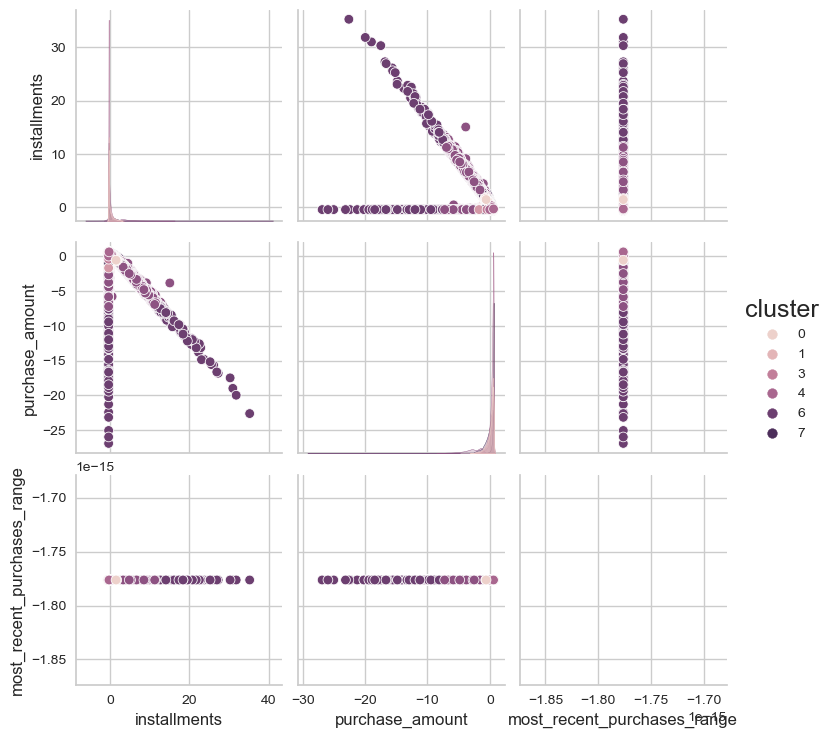

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


# Add the cluster labels to the data
grouped_df_3['cluster'] = kmeans.labels_

# Visualize the clusters using a pairplot
sns.pairplot(grouped_df_3, vars=['installments',
       'purchase_amount',  'most_recent_purchases_range'], hue='cluster')
plt.show()

Text(0.5, 0, 'purchase_amount')

Text(0.5, 0.5, 'installments')

Text(0.5, 0, 'most_recent_purchases_range')

Text(0.5, 0.92, 'K-means Clustering')

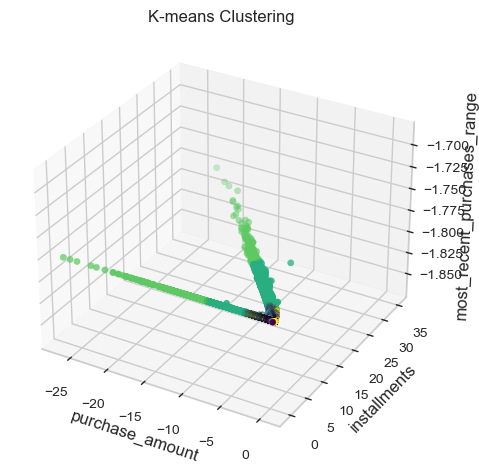

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

grouped_df_3['cluster'] = kmeans.labels_

# Visualize the clusters using a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grouped_df_3['purchase_amount'], grouped_df_3['installments'], grouped_df_3['most_recent_purchases_range'], c=grouped_df_3['cluster'], cmap='viridis')
ax.set_xlabel('purchase_amount')
ax.set_ylabel('installments')
ax.set_zlabel('most_recent_purchases_range')
plt.title('K-means Clustering')
plt.show()

**interpret each cluster and determine the centroid of each cluster**

In [ ]:
# Interpret each cluster and determine the centroid of each cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=grouped_df_3.columns)
centroids = StandardScaler().fit_transform(centroids)
centroids

array([[ 0.        ,  0.14385753,  0.        , -0.4983    , -0.68565671,
         0.32201523,  0.43641387,  1.79110454,  2.32384179,  0.26716456,
         0.        ,  0.46713364,  0.        ,  0.        ,  0.        ,
         0.62527204,  0.40169706,  0.17508054,  0.        , -0.05783587,
        -0.39526508, -0.37848928, -1.45539723],
       [ 0.        ,  2.28474933,  0.        , -0.48532703, -1.5779179 ,
         0.33136873,  0.42962985, -0.71990733,  0.54712534,  0.52356084,
         0.        ,  0.51430178,  0.        ,  0.        ,  0.        ,
         0.68108881,  0.27323931,  0.13835145,  0.        , -0.29294654,
        -0.39467439, -0.32893323,  1.19609925],
       [ 0.        ,  0.46058704,  0.        , -0.4929645 , -0.7689696 ,
         0.48799768,  0.43478256,  1.66260848, -1.72074002,  0.27466359,
         0.        ,  0.47064964,  0.        ,  0.        ,  0.        ,
         0.63746969,  0.36194897,  0.08712307,  0.        , -0.11009689,
        -0.39531897, -0.4488

In [ ]:
numerical_cols_=['authorized_flag', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'month_lag', 'purchase_amount', 'category_2',
       'state_id', 'subsector_id', 'merchant_group_id', 'numerical_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'active_months_lag3', 'active_months_lag6',
       'active_months_lag12', 'category_4', 'avg_purchase_amount_per_merchant',
       'num_transactions_per_card', 'days_since_last_purchase', 'cluster']



For each cluster, it creates a variable called "cluster_data" which contains all of the data points that are assigned to that cluster. This is done by selecting the rows of the DataFrame "grouped_df_3" where the label in the "kmeans.labels_" array is equal to the current cluster index i.
The code then prints out some information about the current cluster:
The cluster's index (which is i+1 because Python indexes start at 0 but we want to number our clusters starting from 1).
The number of data points that belong to the current cluster, which is just the length of the "cluster_data" variable from step 2.
The mean values of all the numerical features for the data points in the current cluster. This is calculated by selecting only the columns in "cluster_data" that correspond to numerical features (as defined by the "numerical_cols_" variable) and then taking the mean of each column.


In [ ]:
# Interpret each cluster
for i in range(kmeans.n_clusters):
    cluster_data = grouped_df_3[kmeans.labels_ == i]
    print(f"\nCluster {i+1}:\nNumber of data points: {len(cluster_data)}")
    print(f"Mean values of features: {cluster_data[numerical_cols_].mean()}")



Cluster 1:

Number of data points: 39737

Mean values of features: authorized_flag                     0.000

city_id                             0.154

category_1                          0.000

installments                       -0.083

merchant_category_id               -0.266

month_lag                          -0.010

purchase_amount                     0.107

category_2                          1.457

state_id                            1.656

subsector_id                        0.106

merchant_group_id                   0.000

numerical_1                         0.000

most_recent_sales_range            -0.000

most_recent_purchases_range        -0.000

avg_sales_lag3                      0.000

active_months_lag3                  0.000

active_months_lag6                 -0.000

active_months_lag12                -0.000

category_4                         -0.000

avg_purchase_amount_per_merchant    0.060

num_transactions_per_card          -0.101

days_since_last_purchase    

**statistics information about the three data with their clusters**

In [ ]:
grouped_df_3.describe(include="all")

authorized_flag    city_id  category_1  installments  \
count       307127.000 307127.000  307127.000    307127.000   
mean             0.000     -0.000       0.000         0.000   
std              0.000      1.000       0.000         1.000   
min              0.000     -1.311       0.000        -0.689   
25%              0.000     -0.652       0.000        -0.421   
50%              0.000     -0.474       0.000        -0.382   
75%              0.000      0.805       0.000         0.001   
max              0.000      1.961       0.000        35.237   

       merchant_category_id  month_lag  purchase_amount  category_2  \
count            307127.000 307127.000       307127.000  307127.000   
mean                 -0.000      0.000           -0.000       0.000   
std                   1.000      1.000            1.000       1.000   
min                  -1.888     -3.855          -26.899      -0.687   
25%                  -0.743     -0.703           -0.100      -0.687   
50%                   0.022      0.134            0.325      -0.687   
75%                   0.750      0.769            0.514       0.669   
max                   1.448      2.055            0.625       2.025   

        state_id  subsector_id  ...  most_recent_purchases_range  \
count 307127.000    307127.000  ...                   307127.000   
mean      -0.000         0.000  ...                       -0.000   
std        1.000         1.000  ...                        0.000   
min       -2.187        -2.685  ...                       -0.000   
25%       -0.345        -0.780  ...                       -0.000   
50%       -0.345         0.278  ...                       -0.000   
75%        0.760         0.701  ...                       -0.000   
max        2.417         1.548  ...                       -0.000   

       avg_sales_lag3  active_months_lag3  active_months_lag6  \
count      307127.000          307127.000          307127.000   
mean            0.000               0.000              -0.000   
std             0.000               0.000               0.000   
min             0.000               0.000              -0.000   
25%             0.000               0.000              -0.000   
50%             0.000               0.000              -0.000   
75%             0.000               0.000              -0.000   
max             0.000               0.000              -0.000   

       active_months_lag12  category_4  avg_purchase_amount_per_merchant  \
count           307127.000  307127.000                        307127.000   
mean                -0.000      -0.000                             0.000   
std                  0.000       0.000                             1.000   
min                 -0.000      -0.000                            -1.871   
25%                 -0.000      -0.000                            -0.733   
50%                 -0.000      -0.000                            -0.159   
75%                 -0.000      -0.000                             0.553   
max                 -0.000      -0.000                             4.687   

       num_transactions_per_card  days_since_last_purchase    cluster  
count                 307127.000                307127.000 307127.000  
mean                      -0.000                     0.000      3.429  
std                        1.000                     0.973      2.462  
min                       -0.176                    -5.202      0.000  
25%                       -0.174                    -0.740      1.000  
50%                       -0.164                    -0.062      4.000  
75%                       -0.108                     0.710      5.000  
max                      100.988                     2.580      8.000  

[8 rows x 23 columns]

**When making use of the four data with using score dataset without score column cause that will affect the clustering process and preparing my new data for clustering**

In [ ]:
userscore

card_id first_active_month  feature_1  feature_2  feature_3  \
0       C_ID_92a2005557             Jun-17          5          2          1   
1       C_ID_3d0044924f             Jan-17          4          1          0   
2       C_ID_d639edf6cd             Aug-16          2          2          0   
3       C_ID_186d6a6901             Sep-17          4          3          0   
4       C_ID_cdbd2c0db2             Nov-17          1          3          0   
...                 ...                ...        ...        ...        ...   
201912  C_ID_963962de2c             Sep-17          3          2          1   
201913  C_ID_1314773c0b             Oct-15          3          1          1   
201914  C_ID_7666735b3d             Aug-17          4          3          0   
201915  C_ID_73f5a0efd0             Jul-16          3          2          1   
201916  C_ID_92c9984c58             Jul-17          3          1          1   

        score  
0      -0.820  
1       0.393  
2       0.688  
3       0.142  
4      -0.160  
...       ...  
201912 -2.741  
201913  0.313  
201914  0.093  
201915 -4.677  
201916 -1.859  

[201917 rows x 6 columns]

In [ ]:
grouped_df2 = grouped_df.copy()

In [ ]:
grouped_df2.drop(['card_id'], axis=1, inplace=True)
grouped_df2.reset_index(inplace = True)

In [ ]:
grouped_df2.head()

card_id  authorized_flag  city_id  category_1  installments  \
0  C_ID_00007093c1            0.000    0.993       0.000         1.877   
1  C_ID_0001238066            0.000   -0.652       0.000         0.460   
2  C_ID_0001506ef0            0.000   -0.652       0.000        -0.421   
3  C_ID_0001793786            0.000    0.382       0.000        -0.421   
4  C_ID_000183fdda            0.000   -0.652       0.000         0.307   

   merchant_category_id      merchant_id  month_lag  purchase_amount  \
0                -0.743  M_ID_9400cf2342     -1.154           -0.536   
1                 0.210  M_ID_50f575c681      0.890            0.111   
2                 1.403  M_ID_00a6ca8a8a     -1.249            0.326   
3                -0.852  M_ID_bff5cd4d78      0.130           -1.050   
4                 1.403  M_ID_00a6ca8a8a      0.396            0.207   

        purchase_date  ...  most_recent_sales_range  \
0 2017-10-02 19:09:42  ...                   -0.000   
1 2018-02-13 21:23:09  ...                   -0.000   
2 2017-12-09 12:55:15  ...                   -0.000   
3 2017-09-08 15:13:07  ...                   -0.000   
4 2017-09-26 22:13:09  ...                   -0.000   

   most_recent_purchases_range  avg_sales_lag3  active_months_lag3  \
0                       -0.000           0.000               0.000   
1                       -0.000           0.000               0.000   
2                       -0.000           0.000               0.000   
3                       -0.000           0.000               0.000   
4                       -0.000           0.000               0.000   

   active_months_lag6  active_months_lag12  category_4  \
0              -0.000               -0.000      -0.000   
1              -0.000               -0.000      -0.000   
2              -0.000               -0.000      -0.000   
3              -0.000               -0.000      -0.000   
4              -0.000               -0.000      -0.000   

   avg_purchase_amount_per_merchant  num_transactions_per_card  \
0                             1.392                      0.039   
1                             0.263                     -0.139   
2                            -0.518                     -0.164   
3                             1.206                      0.257   
4                             0.406                     -0.151   

   days_since_last_purchase  
0                     1.808  
1                    -0.371  
2                     1.122  
3                     0.084  
4                    -0.508  

[5 rows x 25 columns]

In [ ]:
grouped_df2

card_id  authorized_flag  city_id  category_1  installments  \
0       C_ID_00007093c1            0.000    0.993       0.000         1.877   
1       C_ID_0001238066            0.000   -0.652       0.000         0.460   
2       C_ID_0001506ef0            0.000   -0.652       0.000        -0.421   
3       C_ID_0001793786            0.000    0.382       0.000        -0.421   
4       C_ID_000183fdda            0.000   -0.652       0.000         0.307   
...                 ...              ...      ...         ...           ...   
307122  C_ID_fffeed3a89            0.000    1.829       0.000         1.647   
307123  C_ID_ffff579d3a            0.000   -1.123       0.000        -0.421   
307124  C_ID_ffff756266            0.000    0.889       0.000        -0.306   
307125  C_ID_ffff828181            0.000   -0.399       0.000         4.788   
307126  C_ID_fffffd5772            0.000   -1.113       0.000         1.456   

        merchant_category_id      merchant_id  month_lag  purchase_amount  \
0                     -0.743  M_ID_9400cf2342     -1.154           -0.536   
1                      0.210  M_ID_50f575c681      0.890            0.111   
2                      1.403  M_ID_00a6ca8a8a     -1.249            0.326   
3                     -0.852  M_ID_bff5cd4d78      0.130           -1.050   
4                      1.403  M_ID_00a6ca8a8a      0.396            0.207   
...                      ...              ...        ...              ...   
307122                -1.595  M_ID_c041e60c64      1.230           -0.659   
307123                -1.569  M_ID_a413edc367     -0.052           -0.008   
307124                 0.668  M_ID_fc48b96259     -0.703            0.595   
307125                 1.422  M_ID_5fa611576f     -0.958           -2.511   
307126                -0.743  M_ID_55cb8d33dc      0.548           -0.592   

             purchase_date  ...  most_recent_sales_range  \
0      2017-10-02 19:09:42  ...                   -0.000   
1      2018-02-13 21:23:09  ...                   -0.000   
2      2017-12-09 12:55:15  ...                   -0.000   
3      2017-09-08 15:13:07  ...                   -0.000   
4      2017-09-26 22:13:09  ...                   -0.000   
...                    ...  ...                      ...   
307122 2017-12-30 06:43:39  ...                   -0.000   
307123 2018-02-09 11:28:16  ...                   -0.000   
307124 2017-09-26 15:59:00  ...                   -0.000   
307125 2017-12-09 19:04:14  ...                   -0.000   
307126 2017-11-19 09:57:33  ...                   -0.000   

        most_recent_purchases_range  avg_sales_lag3  active_months_lag3  \
0                            -0.000           0.000               0.000   
1                            -0.000           0.000               0.000   
2                            -0.000           0.000               0.000   
3                            -0.000           0.000               0.000   
4                            -0.000           0.000               0.000   
...                             ...             ...                 ...   
307122                       -0.000           0.000               0.000   
307123                       -0.000           0.000               0.000   
307124                       -0.000           0.000               0.000   
307125                       -0.000           0.000               0.000   
307126                       -0.000           0.000               0.000   

        active_months_lag6  active_months_lag12  category_4  \
0                   -0.000               -0.000      -0.000   
1                   -0.000               -0.000      -0.000   
2                   -0.000               -0.000      -0.000   
3                   -0.000               -0.000      -0.000   
4                   -0.000               -0.000      -0.000   
...                    ...                  ...         ...   
307122              -0.000               -0.000      -0.000   
307123          

In [ ]:
# Join the dataframes on the user_id column
merged_data_4= pd.merge(grouped_df2, userscore, on='card_id',how='left')

In [ ]:
merged_data_4

card_id  authorized_flag  city_id  category_1  installments  \
0       C_ID_00007093c1            0.000    0.993       0.000         1.877   
1       C_ID_0001238066            0.000   -0.652       0.000         0.460   
2       C_ID_0001506ef0            0.000   -0.652       0.000        -0.421   
3       C_ID_0001793786            0.000    0.382       0.000        -0.421   
4       C_ID_000183fdda            0.000   -0.652       0.000         0.307   
...                 ...              ...      ...         ...           ...   
307122  C_ID_fffeed3a89            0.000    1.829       0.000         1.647   
307123  C_ID_ffff579d3a            0.000   -1.123       0.000        -0.421   
307124  C_ID_ffff756266            0.000    0.889       0.000        -0.306   
307125  C_ID_ffff828181            0.000   -0.399       0.000         4.788   
307126  C_ID_fffffd5772            0.000   -1.113       0.000         1.456   

        merchant_category_id      merchant_id  month_lag  purchase_amount  \
0                     -0.743  M_ID_9400cf2342     -1.154           -0.536   
1                      0.210  M_ID_50f575c681      0.890            0.111   
2                      1.403  M_ID_00a6ca8a8a     -1.249            0.326   
3                     -0.852  M_ID_bff5cd4d78      0.130           -1.050   
4                      1.403  M_ID_00a6ca8a8a      0.396            0.207   
...                      ...              ...        ...              ...   
307122                -1.595  M_ID_c041e60c64      1.230           -0.659   
307123                -1.569  M_ID_a413edc367     -0.052           -0.008   
307124                 0.668  M_ID_fc48b96259     -0.703            0.595   
307125                 1.422  M_ID_5fa611576f     -0.958           -2.511   
307126                -0.743  M_ID_55cb8d33dc      0.548           -0.592   

             purchase_date  ...  active_months_lag12  category_4  \
0      2017-10-02 19:09:42  ...               -0.000      -0.000   
1      2018-02-13 21:23:09  ...               -0.000      -0.000   
2      2017-12-09 12:55:15  ...               -0.000      -0.000   
3      2017-09-08 15:13:07  ...               -0.000      -0.000   
4      2017-09-26 22:13:09  ...               -0.000      -0.000   
...                    ...  ...                  ...         ...   
307122 2017-12-30 06:43:39  ...               -0.000      -0.000   
307123 2018-02-09 11:28:16  ...               -0.000      -0.000   
307124 2017-09-26 15:59:00  ...               -0.000      -0.000   
307125 2017-12-09 19:04:14  ...               -0.000      -0.000   
307126 2017-11-19 09:57:33  ...               -0.000      -0.000   

        avg_purchase_amount_per_merchant  num_transactions_per_card  \
0                                  1.392                      0.039   
1                                  0.263                     -0.139   
2                                 -0.518                     -0.164   
3                                  1.206                      0.257   
4                                  0.406                     -0.151   
...                                  ...                        ...   
307122                            -0.405                      0.031   
307123                            -1.009                     -0.128   
307124                             0.151                     -0.176   
307125                             0.204                      1.141   
307126                            -0.470                      0.009   

        days_since_last_purchase  first_active_month  feature_1  feature_2  \
0                          1.808              Feb-17      5.000      1.000   
1                         -0.371                 NaN        NaN        NaN   
2                          1.122              Jul-16      2.000      2.000   
3                          0.084                 NaN        NaN        NaN   
4                         -0.508              Sep-17      4.000      1.000   
... 

In [ ]:
# Save the card_id column in a separate variable
card_id = merged_data_4['card_id']

In [ ]:
# Drop the card_id and user_id columns
merged_data_4= merged_data_4.drop(['card_id'], axis=1)


In [ ]:
merged_data_4= merged_data_4.drop(['merchant_id'], axis=1)


In [ ]:
merged_data_4= merged_data_4.drop(['purchase_date'], axis=1)


In [ ]:
score = merged_data_4['score']

In [ ]:
merged_data_4= merged_data_4.drop(['score'], axis=1)


In [ ]:
merged_data_4

authorized_flag  city_id  category_1  installments  \
0                 0.000    0.993       0.000         1.877   
1                 0.000   -0.652       0.000         0.460   
2                 0.000   -0.652       0.000        -0.421   
3                 0.000    0.382       0.000        -0.421   
4                 0.000   -0.652       0.000         0.307   
...                 ...      ...         ...           ...   
307122            0.000    1.829       0.000         1.647   
307123            0.000   -1.123       0.000        -0.421   
307124            0.000    0.889       0.000        -0.306   
307125            0.000   -0.399       0.000         4.788   
307126            0.000   -1.113       0.000         1.456   

        merchant_category_id  month_lag  purchase_amount  category_2  \
0                     -0.743     -1.154           -0.536       0.669   
1                      0.210      0.890            0.111      -0.687   
2                      1.403     -1.249            0.326      -0.687   
3                     -0.852      0.130           -1.050      -0.687   
4                      1.403      0.396            0.207      -0.687   
...                      ...        ...              ...         ...   
307122                -1.595      1.230           -0.659      -0.687   
307123                -1.569     -0.052           -0.008      -0.687   
307124                 0.668     -0.703            0.595      -0.687   
307125                 1.422     -0.958           -2.511      -0.009   
307126                -0.743      0.548           -0.592       0.669   

        state_id  subsector_id  ...  active_months_lag6  active_months_lag12  \
0         -1.634        -0.780  ...              -0.000               -0.000   
1         -0.345        -2.050  ...              -0.000               -0.000   
2         -0.345         0.278  ...              -0.000               -0.000   
3         -2.187         1.124  ...              -0.000               -0.000   
4         -0.345         0.278  ...              -0.000               -0.000   
...          ...           ...  ...                 ...                  ...   
307122    -0.345         1.124  ...              -0.000               -0.000   
307123    -0.345         0.066  ...              -0.000               -0.000   
307124    -0.345         0.807  ...              -0.000               -0.000   
307125     2.417         0.066  ...              -0.000               -0.000   
307126     1.496        -0.780  ...              -0.000               -0.000   

        category_4  avg_purchase_amount_per_merchant  \
0           -0.000                             1.392   
1           -0.000                             0.263   
2           -0.000                            -0.518   
3           -0.000                             1.206   
4           -0.000                             0.406   
...            ...                               ...   
307122      -0.000                            -0.405   
307123      -0.000                            -1.009   
307124      -0.000                             0.151   
307125      -0.000                             0.204   
307126      -0.000                            -0.470   

        num_transactions_per_card  days_since_last_purchase  \
0                           0.039                     1.808   
1                          -0.139                    -0.371   
2                          -0.164                     1.122   
3                           0.257                     0.084   
4                          -0.151                    -0.508   
...                           ...                       ...   
307122                      0.031                    -1.135   
307123                     -0.128                    -0.431   
307124                     -0.176                    -1.581   
307125                      1.141                     1.310   
307126                      0.009                    -0.148   

       

In [ ]:
merged_data_4= merged_data_4.drop(['first_active_month'], axis=1)


In [ ]:
merged_data_4

authorized_flag  city_id  category_1  installments  \
0                 0.000    0.993       0.000         1.877   
1                 0.000   -0.652       0.000         0.460   
2                 0.000   -0.652       0.000        -0.421   
3                 0.000    0.382       0.000        -0.421   
4                 0.000   -0.652       0.000         0.307   
...                 ...      ...         ...           ...   
307122            0.000    1.829       0.000         1.647   
307123            0.000   -1.123       0.000        -0.421   
307124            0.000    0.889       0.000        -0.306   
307125            0.000   -0.399       0.000         4.788   
307126            0.000   -1.113       0.000         1.456   

        merchant_category_id  month_lag  purchase_amount  category_2  \
0                     -0.743     -1.154           -0.536       0.669   
1                      0.210      0.890            0.111      -0.687   
2                      1.403     -1.249            0.326      -0.687   
3                     -0.852      0.130           -1.050      -0.687   
4                      1.403      0.396            0.207      -0.687   
...                      ...        ...              ...         ...   
307122                -1.595      1.230           -0.659      -0.687   
307123                -1.569     -0.052           -0.008      -0.687   
307124                 0.668     -0.703            0.595      -0.687   
307125                 1.422     -0.958           -2.511      -0.009   
307126                -0.743      0.548           -0.592       0.669   

        state_id  subsector_id  ...  active_months_lag3  active_months_lag6  \
0         -1.634        -0.780  ...               0.000              -0.000   
1         -0.345        -2.050  ...               0.000              -0.000   
2         -0.345         0.278  ...               0.000              -0.000   
3         -2.187         1.124  ...               0.000              -0.000   
4         -0.345         0.278  ...               0.000              -0.000   
...          ...           ...  ...                 ...                 ...   
307122    -0.345         1.124  ...               0.000              -0.000   
307123    -0.345         0.066  ...               0.000              -0.000   
307124    -0.345         0.807  ...               0.000              -0.000   
307125     2.417         0.066  ...               0.000              -0.000   
307126     1.496        -0.780  ...               0.000              -0.000   

        active_months_lag12  category_4  avg_purchase_amount_per_merchant  \
0                    -0.000      -0.000                             1.392   
1                    -0.000      -0.000                             0.263   
2                    -0.000      -0.000                            -0.518   
3                    -0.000      -0.000                             1.206   
4                    -0.000      -0.000                             0.406   
...                     ...         ...                               ...   
307122               -0.000      -0.000                            -0.405   
307123               -0.000      -0.000                            -1.009   
307124               -0.000      -0.000                             0.151   
307125               -0.000      -0.000                             0.204   
307126               -0.000      -0.000                            -0.470   

        num_transactions_per_card  days_since_last_purchase  feature_1  \
0                           0.039                     1.808      5.000   
1                          -0.139                    -0.371        NaN   
2                          -0.164                     1.122      2.000   
3                           0.257                     0.084        NaN   
4                          -0.151                    -0.508      4.000   
...                           ...                       ...        ...   
307122

In [ ]:
merged_data_4.isna().sum()

authorized_flag                          0
city_id                                  0
category_1                               0
installments                             0
merchant_category_id                     0
month_lag                                0
purchase_amount                          0
category_2                               0
state_id                                 0
subsector_id                             0
merchant_group_id                        0
numerical_1                              0
most_recent_sales_range                  0
most_recent_purchases_range              0
avg_sales_lag3                           0
active_months_lag3                       0
active_months_lag6                       0
active_months_lag12                      0
category_4                               0
avg_purchase_amount_per_merchant         0
num_transactions_per_card                0
days_since_last_purchase             16222
feature_1                           116663
feature_2  

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_4['days_since_last_purchase'].mean()

# fill NaN values with the mean value
merged_data_4['days_since_last_purchase'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_4['feature_1'].mean()

# fill NaN values with the mean value
merged_data_4['feature_1'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_4['feature_2'].mean()

# fill NaN values with the mean value
merged_data_4['feature_2'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_4['feature_3'].mean()

# fill NaN values with the mean value
merged_data_4['feature_3'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Select the columns to be standardized
columns_to_scale = ['feature_1', 'feature_2', 'feature_3']

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
merged_data_4[columns_to_scale] = scaler.fit_transform(merged_data_4[columns_to_scale])



**This is the final merged the four dataset without score column after doing some preprocessing on it to handle missing values and wrong ranges on the dataset and wrong datatypes that shouldn't e passed to the kmeans clustering model now the data is ready to be passed to the cluster model**

In [ ]:
merged_data_4

authorized_flag  city_id  category_1  installments  \
0                 0.000    0.993       0.000         1.877   
1                 0.000   -0.652       0.000         0.460   
2                 0.000   -0.652       0.000        -0.421   
3                 0.000    0.382       0.000        -0.421   
4                 0.000   -0.652       0.000         0.307   
...                 ...      ...         ...           ...   
307122            0.000    1.829       0.000         1.647   
307123            0.000   -1.123       0.000        -0.421   
307124            0.000    0.889       0.000        -0.306   
307125            0.000   -0.399       0.000         4.788   
307126            0.000   -1.113       0.000         1.456   

        merchant_category_id  month_lag  purchase_amount  category_2  \
0                     -0.743     -1.154           -0.536       0.669   
1                      0.210      0.890            0.111      -0.687   
2                      1.403     -1.249            0.326      -0.687   
3                     -0.852      0.130           -1.050      -0.687   
4                      1.403      0.396            0.207      -0.687   
...                      ...        ...              ...         ...   
307122                -1.595      1.230           -0.659      -0.687   
307123                -1.569     -0.052           -0.008      -0.687   
307124                 0.668     -0.703            0.595      -0.687   
307125                 1.422     -0.958           -2.511      -0.009   
307126                -0.743      0.548           -0.592       0.669   

        state_id  subsector_id  ...  active_months_lag3  active_months_lag6  \
0         -1.634        -0.780  ...               0.000              -0.000   
1         -0.345        -2.050  ...               0.000              -0.000   
2         -0.345         0.278  ...               0.000              -0.000   
3         -2.187         1.124  ...               0.000              -0.000   
4         -0.345         0.278  ...               0.000              -0.000   
...          ...           ...  ...                 ...                 ...   
307122    -0.345         1.124  ...               0.000              -0.000   
307123    -0.345         0.066  ...               0.000              -0.000   
307124    -0.345         0.807  ...               0.000              -0.000   
307125     2.417         0.066  ...               0.000              -0.000   
307126     1.496        -0.780  ...               0.000              -0.000   

        active_months_lag12  category_4  avg_purchase_amount_per_merchant  \
0                    -0.000      -0.000                             1.392   
1                    -0.000      -0.000                             0.263   
2                    -0.000      -0.000                            -0.518   
3                    -0.000      -0.000                             1.206   
4                    -0.000      -0.000                             0.406   
...                     ...         ...                               ...   
307122               -0.000      -0.000                            -0.405   
307123               -0.000      -0.000                            -1.009   
307124               -0.000      -0.000                             0.151   
307125               -0.000      -0.000                             0.204   
307126               -0.000      -0.000                            -0.470   

        num_transactions_per_card  days_since_last_purchase  feature_1  \
0                           0.039                     1.808      2.060   
1                          -0.139                    -0.371     -0.000   
2                          -0.164                     1.122     -1.185   
3                           0.257                     0.084     -0.000   
4                          -0.151                    -0.508      0.979   
...                           ...                       ...        ...   
307122

In [ ]:
merged_data_4.isna().sum()

authorized_flag                     0
city_id                             0
category_1                          0
installments                        0
merchant_category_id                0
month_lag                           0
purchase_amount                     0
category_2                          0
state_id                            0
subsector_id                        0
merchant_group_id                   0
numerical_1                         0
most_recent_sales_range             0
most_recent_purchases_range         0
avg_sales_lag3                      0
active_months_lag3                  0
active_months_lag6                  0
active_months_lag12                 0
category_4                          0
avg_purchase_amount_per_merchant    0
num_transactions_per_card           0
days_since_last_purchase            0
feature_1                           0
feature_2                           0
feature_3                           0
dtype: int64

**here for the final data i calculate KElbowVisualizer to find the best k for my new data and the number of clusters reduced to 8 and the score of the elow gets higher**

C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default 

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=20), k=(2, 21))

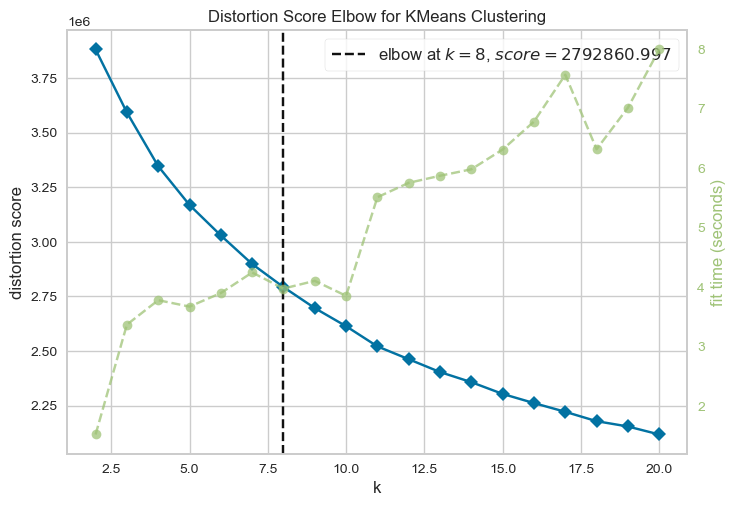

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21))

visualizer.fit(merged_data_4)
visualizer.show()

In [ ]:
merged_data_4.columns

Index(['authorized_flag', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'month_lag', 'purchase_amount', 'category_2',
       'state_id', 'subsector_id', 'merchant_group_id', 'numerical_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'active_months_lag3', 'active_months_lag6',
       'active_months_lag12', 'category_4', 'avg_purchase_amount_per_merchant',
       'num_transactions_per_card', 'days_since_last_purchase', 'feature_1',
       'feature_2', 'feature_3'],
      dtype='object')

In [ ]:
# Refit the K-means model with the best k value and predict the clusters
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
kmeans.fit(merged_data_4)
merged_data_4['cluster_1'] = kmeans.labels_



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




KMeans(random_state=42)

In [ ]:
merged_data_4['cluster_1']

0         6
1         4
2         0
3         4
4         2
         ..
307122    1
307123    3
307124    1
307125    5
307126    3
Name: cluster, Length: 307127, dtype: int32

 **Explain
the resultant clusters (the meaning of each cluster) and judge the quality
of resultant clusters.**

In [ ]:
# Calculate statistics for each cluster
cluster_stats = merged_data_4.groupby('cluster_1').agg(['mean', 'median', 'std'])

In [ ]:
cluster_stats

authorized_flag              city_id              category_1         \
                   mean median   std    mean median   std       mean median   
cluster                                                                       
0                 0.000  0.000 0.000  -0.050 -0.587 0.999      0.000  0.000   
1                 0.000  0.000 0.000   0.878  1.256 0.991      0.000  0.000   
2                 0.000  0.000 0.000  -0.634 -0.652 0.394      0.000  0.000   
3                 0.000  0.000 0.000  -0.249 -0.652 0.887      0.000  0.000   
4                 0.000  0.000 0.000  -0.029 -0.295 0.897      0.000  0.000   
5                 0.000  0.000 0.000   0.232 -0.004 1.141      0.000  0.000   
6                 0.000  0.000 0.000   0.024 -0.295 1.017      0.000  0.000   
7                 0.000  0.000 0.000   0.213  0.100 1.046      0.000  0.000   

              installments  ... feature_1 feature_2              feature_3  \
          std         mean  ...       std      mean median   std      mean   
cluster                     ...                                              
0       0.000       -0.124  ...     0.570     0.333  0.000 0.916     0.119   
1       0.000       -0.174  ...     0.514     0.109  0.000 0.920     0.154   
2       0.000       -0.231  ...     0.496     0.079  0.000 0.916     0.395   
3       0.000        0.087  ...     0.663    -0.546 -1.269 1.083    -1.463   
4       0.000       -0.139  ...     0.672     0.199  0.000 0.953    -0.043   
5       0.000        2.522  ...     1.078     0.010  0.000 0.946    -0.098   
6       0.000        0.047  ...     0.309    -0.743 -1.269 0.780     1.068   
7       0.000       -0.105  ...     0.833     0.194  0.000 0.939    -0.105   

                     cluster_1               
        median   std      mean median   std  
cluster                                      
0        0.000 0.893     1.000  1.000 0.005  
1        0.000 0.820     5.000  5.000 0.026  
2        0.000 0.693     0.000  0.000 0.000  
3       -1.464 0.039     6.000  6.000 0.000  
4        0.000 0.918     2.000  2.000 0.024  
5        0.000 0.988     4.000  4.000 0.000  
6        1.102 0.270     7.000  7.000 0.000  
7        0.000 0.965     2.997  3.000 0.071  

[8 rows x 78 columns]

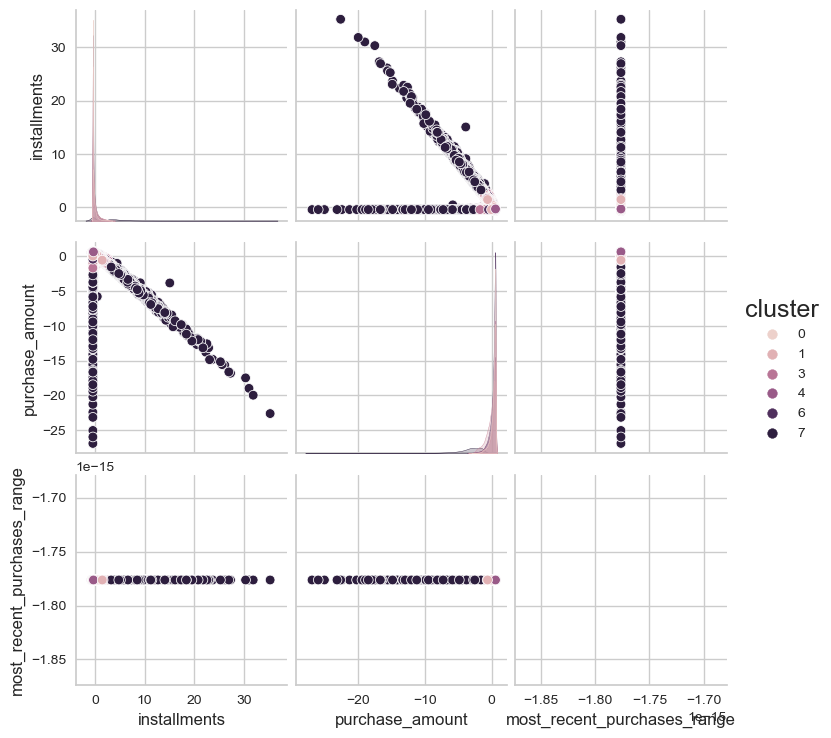

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


# Add the cluster labels to the data
merged_data_4['cluster_1'] = kmeans.labels_

# Visualize the clusters using a pairplot
sns.pairplot(merged_data_4, vars=['installments',
       'purchase_amount',  'most_recent_purchases_range'], hue='cluster')
plt.show()

Text(0.5, 0, 'purchase_amount')

Text(0.5, 0.5, 'installments')

Text(0.5, 0, 'most_recent_purchases_range')

Text(0.5, 0.92, 'K-means Clustering')

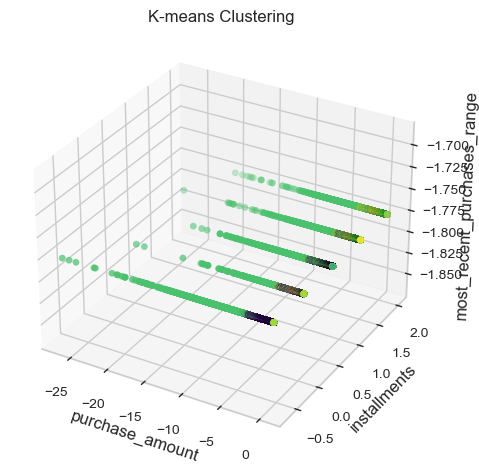

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

merged_data_4['cluster_1'] = kmeans.labels_

# Visualize the clusters using a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(merged_data_4['purchase_amount'], merged_data_4['category_2'], merged_data_4['most_recent_purchases_range'], c=merged_data_4['cluster_1'], cmap='viridis')
ax.set_xlabel('purchase_amount')
ax.set_ylabel('installments')
ax.set_zlabel('most_recent_purchases_range')
plt.title('K-means Clustering')
plt.show()

**i think user within the two cluster 1 and 7  and user within cluster 0 and 6  have similar features which is more difficult to distinguish users with the different two clusters when visualizing using this two features**

when Visualize each cluster using scatter plots and using purchase_amount and category_2 the two features for plotting the clusters most of users are located in cluster 5 that's meaning users who have high correlation between their purchase_amount and month_lag are located in cluster 5. 

Text(0.5, 0, 'purchase_amount')

Text(0, 0.5, 'installments')

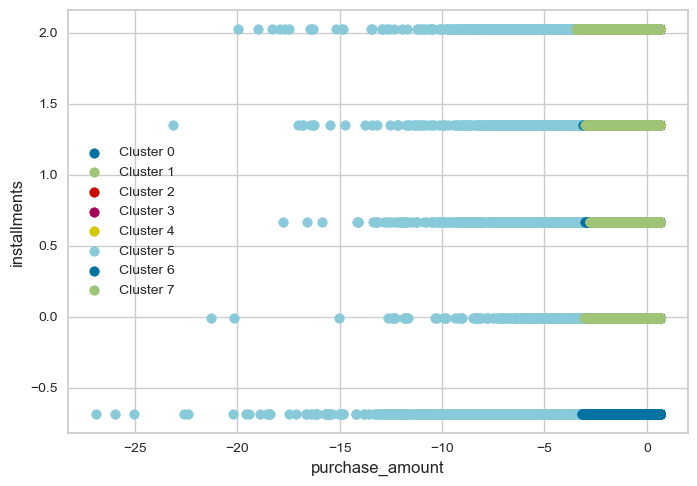

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by the 'cluster' column
grouped1 = merged_data_4.groupby('cluster_1')

# Visualize each cluster using scatter plots
for name, group in grouped1:
    plt.scatter(group['purchase_amount'], group['category_2'], label=f'Cluster {name}')
plt.xlabel('purchase_amount')
plt.ylabel('installments')
plt.legend()
plt.show()



when Visualize each cluster using scatter plots and using category_1 and category_2 the two features for plotting the clusters most of users are located in cluster 1//7 that's meaning users who have high correlation between their category_1 and category_2 are located in cluster 1//7 

Text(0.5, 0, 'category_1')

Text(0, 0.5, 'category_2')

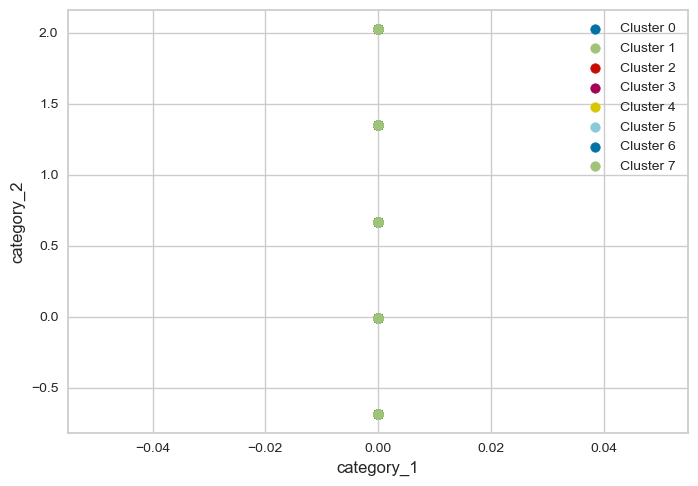

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by the 'cluster' column
grouped1 = merged_data_4.groupby('cluster_1')

# Visualize each cluster using scatter plots
for name, group in grouped1:
    plt.scatter(group['category_1'], group['category_2'], label=f'Cluster {name}')
plt.xlabel('category_1')
plt.ylabel('category_2')
plt.legend()
plt.show()

**when Visualize each cluster using scatter plots and using purchase_amount and category_2 the two features for plotting the clusters most of users are located in cluster 5 that's meaning users who have high correlation between their purchase_amount and month_lag are located in cluster 5.
i think user within the two cluster 1 and 7 and user within cluster 0 and 6 have similar features which is more difficult to distinguish users with the different two clusters when visualizing using this two feature**


Text(0.5, 0, 'purchase_amount')

Text(0, 0.5, 'category_2')

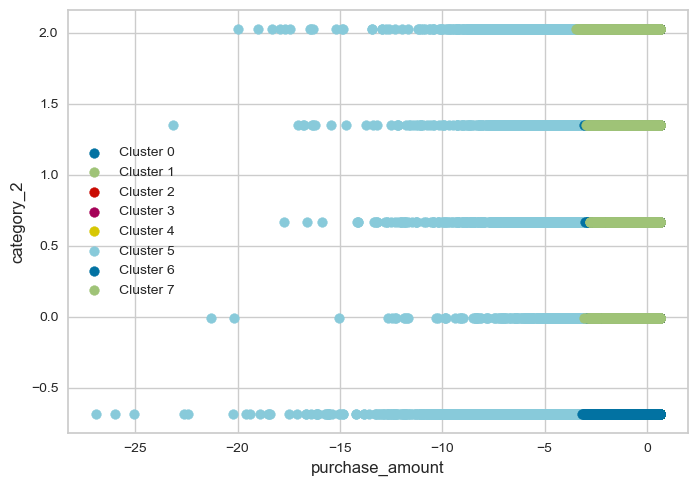

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by the 'cluster' column
grouped1 = merged_data_4.groupby('cluster_1')

# Visualize each cluster using scatter plots
for name, group in grouped1:
    plt.scatter(group['purchase_amount'], group['category_2'], label=f'Cluster {name}')
plt.xlabel('purchase_amount')
plt.ylabel('category_2')
plt.legend()
plt.show()

**when Visualize each cluster using scatter plots and using purchase_amount and month_lag the two features for plotting the clusters most of users are located in  cluster 5  that's meaning users who have high correlation between their purchase_amount and  month_lag are located in cluster 5 after that cluster 1//7 and users who have low   correlation between their purchase_amount and  month_lag located in cluster 0,2,3,4,6**
**and when getting higher in month lag users within cluster 3,2,4 appear but with a few numbers of user**

**i think user within the two cluster 1 and 7  and user within cluster 0 and 6  have similar features which is more difficult to distinguish users with the different two clusters when visualizing using this two features**

**note: when i visualize i was copy best from the previous cell i forget to change plt.xlabel('feature_1')
plt.ylabel('cluster') but the xlabel here is 'purchase_amount and plt.ylabel = month_lag it doesn't change any thing in the visualization but i just want to clarify**

Text(0.5, 0, 'feature_1')

Text(0, 0.5, 'cluster')

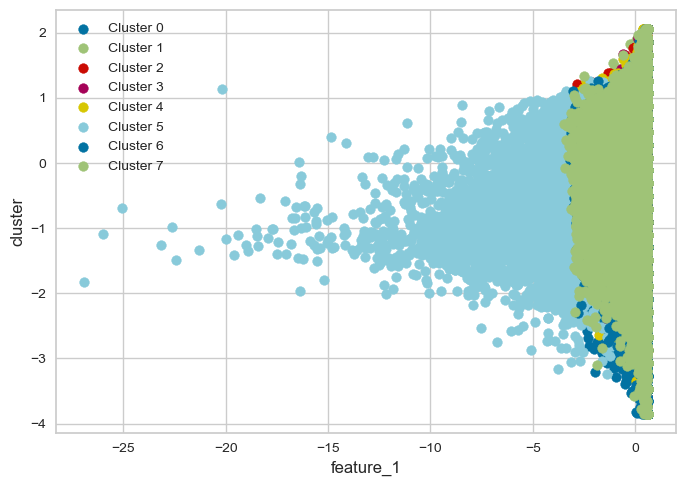

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by the 'cluster' column
grouped1 = merged_data_4.groupby('cluster_1')

# Visualize each cluster using scatter plots
for name, group in grouped1:
    plt.scatter(group['purchase_amount'], group['month_lag'], label=f'Cluster {name}')
plt.xlabel('feature_1')
plt.ylabel('cluster')
plt.legend()
plt.show()

**when Visualize each cluster using scatter plots and using avg_purchase_amount_per_merchant and num_transactions_per_card the two features for plotting the clusters most of users are located in  cluster 5  that's meaning users who have high correlation between their avg_purchase_amount_per_merchant and  num_transactions_per_card are located in cluster 5 after that cluster 7//1 and users who have low   correlation between their purchase_amount and  month_lag located in cluster 0,2,3,4,6**

**i think user within the two cluster 1 and 7 and user within cluster 0 and 6 have similar features which is more difficult to distinguish users with the different two clusters when visualizing using this two features**

Text(0.5, 0, 'num_transactions_per_card')

Text(0, 0.5, 'cluster')

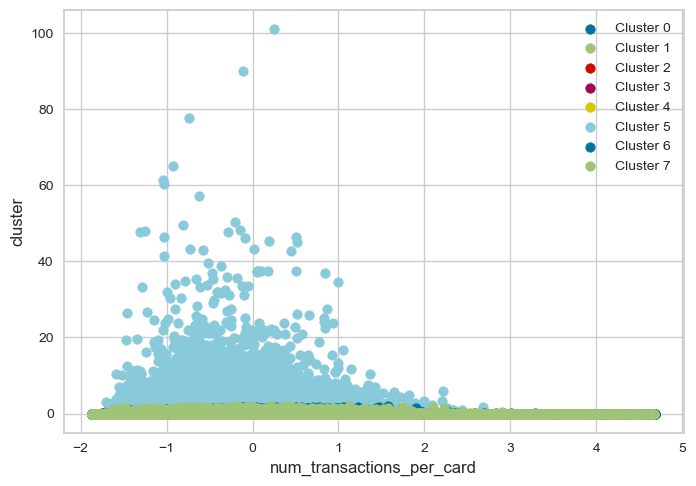

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by the 'cluster' column
grouped1 = merged_data_4.groupby('cluster_1')

# Visualize each cluster using scatter plots
for name, group in grouped1:
    plt.scatter(group['avg_purchase_amount_per_merchant'], group['num_transactions_per_card'], label=f'Cluster {name}')
plt.xlabel('num_transactions_per_card')
plt.ylabel('cluster')
plt.legend()
plt.show()

**when Visualize each cluster using scatter plots and using installments and category_1 the two features for plotting the clusters most of users are located in cluster 5 that's meaning users who have high correlation between their purchase_amount and month_lag are located in cluster 5**

**i think user within the two cluster 1 and 7 and user within cluster 0 and 6 have similar features which is more difficult to distinguish users with the different two clusters when visualizing using this two features**

Text(0.5, 0, 'installments')

Text(0, 0.5, 'category_1')

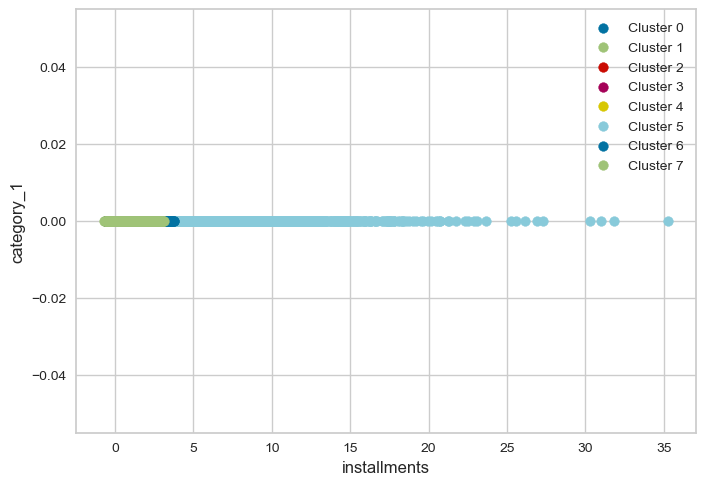

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by the 'cluster' column
grouped1 = merged_data_4.groupby('cluster_1')

# Visualize each cluster using scatter plots
for name, group in grouped1:
    plt.scatter(group['installments'], group['category_1'], label=f'Cluster {name}')
plt.xlabel('installments')
plt.ylabel('category_1')
plt.legend()
plt.show()

**interpret each cluster and determine the centroid of each cluster**

In [ ]:
# Interpret each cluster and determine the centroid of each cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=merged_data_4.columns)
centroids = StandardScaler().fit_transform(centroids)
centroids


array([[ 0.        , -0.24225059,  0.        , -0.41314109,  0.11741635,
        -1.96866848,  0.11533918, -0.64938812, -0.18780502,  0.13809184,
         0.        ,  0.05616654,  0.        ,  0.        ,  0.        ,
        -0.01679159,  1.40944954, -1.89962855,  0.        , -0.75697524,
        -0.29845983,  1.67171749, -0.19767633,  1.05014375,  0.17436861,
        -0.65485551, -1.09094362],
       [ 0.        ,  2.04381343,  0.        , -0.47074705, -1.46265228,
         0.96035529,  0.4541057 , -0.77086753,  0.32082507,  1.04499599,
         0.        ,  0.48579936,  0.        ,  0.        ,  0.        ,
         0.56291392, -0.99746079,  0.96928272,  0.        , -0.24695029,
        -0.40604464, -0.90890986, -0.05558193,  0.42804495,  0.22788734,
         0.21776394,  0.65488899],
       [ 0.        , -1.67898795,  0.        , -0.5357608 ,  2.2454028 ,
         1.00859834,  0.47322156, -0.9849807 , -0.5750683 ,  0.97487593,
         0.        ,  0.47815939,  0.        ,  0.    

In [ ]:
#just want to make the name of the column cluster instead of cluster_1

In [ ]:
merged_data_4= merged_data_4.drop(['cluster_1'], axis=1)


In [ ]:
merged_data_4['cluster'] = kmeans.labels_


In [ ]:
merged_data_4 = merged_data_4.groupby('cluster')


In [ ]:
numerical_cols=['authorized_flag', 'city_id', 'category_1', 'installments',
       'merchant_category_id', 'month_lag', 'purchase_amount', 'category_2',
       'state_id', 'subsector_id', 'merchant_group_id', 'numerical_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'active_months_lag3', 'active_months_lag6',
       'active_months_lag12', 'category_4', 'avg_purchase_amount_per_merchant',
       'num_transactions_per_card', 'days_since_last_purchase', 'cluster']

**take the mean of all the features in each cluster**

In [ ]:
# Interpret each cluster
for i in range(kmeans.n_clusters):
    cluster_data = merged_data_4[kmeans.labels_ == i]
    print(f"\nCluster {i+1}:\nNumber of data points: {len(cluster_data)}")
    print(f"Mean values of features: {cluster_data[numerical_cols].mean()}")



Cluster 1:

Number of data points: 47290

Mean values of features: authorized_flag                     0.000

city_id                            -0.050

category_1                          0.000

installments                       -0.124

merchant_category_id                0.022

month_lag                          -1.163

purchase_amount                    -0.169

category_2                         -0.409

state_id                           -0.057

subsector_id                        0.099

merchant_group_id                   0.000

numerical_1                         0.000

most_recent_sales_range            -0.000

most_recent_purchases_range        -0.000

avg_sales_lag3                      0.000

active_months_lag3                  0.000

active_months_lag6                 -0.000

active_months_lag12                -0.000

category_4                         -0.000

avg_purchase_amount_per_merchant   -0.221

num_transactions_per_card          -0.036

days_since_last_purchase    

**Q2 (5 points) Based on your results from Q1, report the statistics of loyalty
scores for each cluster of users. Report your findings.**

**Ater clustering add score column in the dataset to preduce the final data to make the statistics about all data features and among them are the cluster column**

In [ ]:
merged_data_4['score']=score

In [ ]:
merged_data_4

card_id  authorized_flag  city_id  category_1  installments  \
0       C_ID_00007093c1            0.000    0.993       0.000         1.877   
1       C_ID_0001238066            0.000   -0.652       0.000         0.460   
2       C_ID_0001506ef0            0.000   -0.652       0.000        -0.421   
3       C_ID_0001793786            0.000    0.382       0.000        -0.421   
4       C_ID_000183fdda            0.000   -0.652       0.000         0.307   
...                 ...              ...      ...         ...           ...   
307122  C_ID_fffeed3a89            0.000    1.829       0.000         1.647   
307123  C_ID_ffff579d3a            0.000   -1.123       0.000        -0.421   
307124  C_ID_ffff756266            0.000    0.889       0.000        -0.306   
307125  C_ID_ffff828181            0.000   -0.399       0.000         4.788   
307126  C_ID_fffffd5772            0.000   -1.113       0.000         1.456   

        merchant_category_id  month_lag  purchase_amount  category_2  \
0                     -0.743     -1.154           -0.536       0.669   
1                      0.210      0.890            0.111      -0.687   
2                      1.403     -1.249            0.326      -0.687   
3                     -0.852      0.130           -1.050      -0.687   
4                      1.403      0.396            0.207      -0.687   
...                      ...        ...              ...         ...   
307122                -1.595      1.230           -0.659      -0.687   
307123                -1.569     -0.052           -0.008      -0.687   
307124                 0.668     -0.703            0.595      -0.687   
307125                 1.422     -0.958           -2.511      -0.009   
307126                -0.743      0.548           -0.592       0.669   

        state_id  ...  active_months_lag12  category_4  \
0         -1.634  ...               -0.000      -0.000   
1         -0.345  ...               -0.000      -0.000   
2         -0.345  ...               -0.000      -0.000   
3         -2.187  ...               -0.000      -0.000   
4         -0.345  ...               -0.000      -0.000   
...          ...  ...                  ...         ...   
307122    -0.345  ...               -0.000      -0.000   
307123    -0.345  ...               -0.000      -0.000   
307124    -0.345  ...               -0.000      -0.000   
307125     2.417  ...               -0.000      -0.000   
307126     1.496  ...               -0.000      -0.000   

        avg_purchase_amount_per_merchant  num_transactions_per_card  \
0                                  1.392                      0.039   
1                                  0.263                     -0.139   
2                                 -0.518                     -0.164   
3                                  1.206                      0.257   
4                                  0.406                     -0.151   
...                                  ...                        ...   
307122                            -0.405                      0.031   
307123                            -1.009                     -0.128   
307124                             0.151                     -0.176   
307125                             0.204                      1.141   
307126                            -0.470                      0.009   

        days_since_last_purchase  feature_1  feature_2  feature_3  cluster  \
0                          1.808      2.060     -1.269      1.102        6   
1                         -0.371     -0.000      0.000      0.000        4   
2                          1.122     -1.185      0.421     -1.464        0   
3                          0.084     -0.000      0.000      0.000        4   
4                         -0.508      0.979     -1.269     -1.464        2   
...                          ...        ...        ...        ...      ...   
307122                    -1.135      0.979      2.111     -1.464        1   
307123                    -0

In [ ]:
merged_data_4.isna().sum()
import pandas as pd


# calculate the mean value of the column
mean_value = merged_data_4['score'].mean()

# fill NaN values with the mean value
merged_data_4['score'].fillna(mean_value, inplace=True)

authorized_flag                          0
city_id                                  0
category_1                               0
installments                             0
merchant_category_id                     0
month_lag                                0
purchase_amount                          0
category_2                               0
state_id                                 0
subsector_id                             0
merchant_group_id                        0
numerical_1                              0
most_recent_sales_range                  0
most_recent_purchases_range              0
avg_sales_lag3                           0
active_months_lag3                       0
active_months_lag6                       0
active_months_lag12                      0
category_4                               0
avg_purchase_amount_per_merchant         0
num_transactions_per_card                0
days_since_last_purchase                 0
feature_1                                0
feature_2  

In [ ]:


# Add the cluster labels to the data
merged_data_4['cluster'] = kmeans.labels_

# Define the features to calculate the statistics for
features = ['authorized_flag', 'city_id', 'category_1', 'installments',
            'merchant_category_id', 'month_lag', 'purchase_amount', 'category_2',
            'state_id', 'subsector_id', 'merchant_group_id', 'numerical_1',
            'most_recent_sales_range', 'most_recent_purchases_range',
            'avg_sales_lag3', 'active_months_lag3', 'active_months_lag6',
            'active_months_lag12', 'category_4', 'avg_purchase_amount_per_merchant',
            'num_transactions_per_card', 'days_since_last_purchase', 'feature_1',
            'feature_2', 'feature_3','cluster','score']

# Calculate the mean and median of each feature for each cluster
stats = merged_data_4.groupby('cluster')[features].agg(['mean', 'median'])

# Flatten the multi-index columns
stats.columns = ['_'.join(col).strip() for col in stats.columns.values]

# Display the statistics
stats

authorized_flag_mean  authorized_flag_median  city_id_mean  \
cluster                                                               
0                       0.000                   0.000        -0.050   
1                       0.000                   0.000         0.878   
2                       0.000                   0.000        -0.634   
3                       0.000                   0.000        -0.249   
4                       0.000                   0.000        -0.029   
5                       0.000                   0.000         0.232   
6                       0.000                   0.000         0.024   
7                       0.000                   0.000         0.213   

         city_id_median  category_1_mean  category_1_median  \
cluster                                                       
0                -0.587            0.000              0.000   
1                 1.256            0.000              0.000   
2                -0.652            0.000              0.000   
3                -0.652            0.000              0.000   
4                -0.295            0.000              0.000   
5                -0.004            0.000              0.000   
6                -0.295            0.000              0.000   
7                 0.100            0.000              0.000   

         installments_mean  installments_median  merchant_category_id_mean  \
cluster                                                                      
0                   -0.124               -0.421                      0.022   
1                   -0.174               -0.421                     -0.758   
2                   -0.231               -0.421                      1.073   
3                    0.087               -0.153                      0.204   
4                   -0.139               -0.421                     -0.245   
5                    2.522                2.835                     -0.082   
6                    0.047               -0.229                     -0.231   
7                   -0.105               -0.421                     -0.270   

         merchant_category_id_median  ...  feature_1_mean  feature_1_median  \
cluster                               ...                                     
0                              0.022  ...          -0.108            -0.000   
1                             -0.852  ...           0.012            -0.000   
2                              1.403  ...           0.097            -0.000   
3                              0.473  ...          -1.286            -1.185   
4                             -0.255  ...          -0.110            -0.000   
5                             -0.060  ...           0.006            -0.000   
6                             -0.518  ...           2.009             2.060   
7                             -0.518  ...          -0.149            -0.000   

         feature_2_mean  feature_2_median  feature_3_mean  feature_3_median  \
cluster                                                                       
0                 0.333             0.000           0.119             0.000   
1                 0.109             0.000           0.154             0.000   
2                 0.079             0.000           0.395             0.000   
3                -0.546            -1.269          -1.463            -1.464   
4                 0.199             0.000          -0.043             0.000   
5                 0.010             0.000          -0.098             0.000   
6                -0.743            -1.269           1.068             1.102   
7                 0.194             0.000          -0.105             0.000   

         cluster_mean  cluster_median  score_mean  score_median  
cluster                                                          
0               0.000           0.000      -0.328        -0.397  
1               1.000           1.000      -0.426        -0.397  
2               2.000           2.000   

**Cluster 0: This cluster has a loyalty score mean of 0.328 and a median of 0.397.
Cluster 1: This cluster has a loyalty score mean of 0.426 and a median of 0.397.
Cluster 2: This cluster has a loyalty score mean of 0.384 and a median of 0.397.
Cluster 3: This cluster has a loyalty score mean of 0.397 and a median of 0.007.
Cluster 4: This cluster has a loyalty score mean of 0.393 and a median of 0.397.
Cluster 5: This cluster has a loyalty score mean of 0.392 and a median of 0.397.
Cluster 6: This cluster has a loyalty score mean of 0.511 and a median of 0.061.
Cluster 7: This cluster has a loyalty score mean of 0.393 and a median of 0.397.
Overall, the loyalty scores for each cluster range from 0.328 to 0.511, with the highest loyalty score found in Cluster 6 and the lowest loyalty score found in Cluster 0.** 

In [ ]:
merged_data_4

card_id  authorized_flag  city_id  category_1  installments  \
0       C_ID_00007093c1            0.000    0.993       0.000         1.877   
1       C_ID_0001238066            0.000   -0.652       0.000         0.460   
2       C_ID_0001506ef0            0.000   -0.652       0.000        -0.421   
3       C_ID_0001793786            0.000    0.382       0.000        -0.421   
4       C_ID_000183fdda            0.000   -0.652       0.000         0.307   
...                 ...              ...      ...         ...           ...   
307122  C_ID_fffeed3a89            0.000    1.829       0.000         1.647   
307123  C_ID_ffff579d3a            0.000   -1.123       0.000        -0.421   
307124  C_ID_ffff756266            0.000    0.889       0.000        -0.306   
307125  C_ID_ffff828181            0.000   -0.399       0.000         4.788   
307126  C_ID_fffffd5772            0.000   -1.113       0.000         1.456   

        merchant_category_id  month_lag  purchase_amount  category_2  \
0                     -0.743     -1.154           -0.536       0.669   
1                      0.210      0.890            0.111      -0.687   
2                      1.403     -1.249            0.326      -0.687   
3                     -0.852      0.130           -1.050      -0.687   
4                      1.403      0.396            0.207      -0.687   
...                      ...        ...              ...         ...   
307122                -1.595      1.230           -0.659      -0.687   
307123                -1.569     -0.052           -0.008      -0.687   
307124                 0.668     -0.703            0.595      -0.687   
307125                 1.422     -0.958           -2.511      -0.009   
307126                -0.743      0.548           -0.592       0.669   

        state_id  ...  active_months_lag12  category_4  \
0         -1.634  ...               -0.000      -0.000   
1         -0.345  ...               -0.000      -0.000   
2         -0.345  ...               -0.000      -0.000   
3         -2.187  ...               -0.000      -0.000   
4         -0.345  ...               -0.000      -0.000   
...          ...  ...                  ...         ...   
307122    -0.345  ...               -0.000      -0.000   
307123    -0.345  ...               -0.000      -0.000   
307124    -0.345  ...               -0.000      -0.000   
307125     2.417  ...               -0.000      -0.000   
307126     1.496  ...               -0.000      -0.000   

        avg_purchase_amount_per_merchant  num_transactions_per_card  \
0                                  1.392                      0.039   
1                                  0.263                     -0.139   
2                                 -0.518                     -0.164   
3                                  1.206                      0.257   
4                                  0.406                     -0.151   
...                                  ...                        ...   
307122                            -0.405                      0.031   
307123                            -1.009                     -0.128   
307124                             0.151                     -0.176   
307125                             0.204                      1.141   
307126                            -0.470                      0.009   

        days_since_last_purchase  feature_1  feature_2  feature_3  cluster  \
0                          1.808      2.060     -1.269      1.102        6   
1                         -0.371     -0.000      0.000      0.000        4   
2                          1.122     -1.185      0.421     -1.464        0   
3                          0.084     -0.000      0.000      0.000        4   
4                         -0.508      0.979     -1.269     -1.464        2   
...                          ...        ...        ...        ...      ...   
307122                    -1.135      0.979      2.111     -1.464        1   
307123                    -0

In [ ]:
merged_data_4.describe(include="all")

card_id  authorized_flag    city_id  category_1  installments  \
count            307127       307127.000 307127.000  307127.000    307127.000   
unique           307127              NaN        NaN         NaN           NaN   
top     C_ID_00007093c1              NaN        NaN         NaN           NaN   
freq                  1              NaN        NaN         NaN           NaN   
mean                NaN            0.000     -0.000       0.000         0.000   
std                 NaN            0.000      1.000       0.000         1.000   
min                 NaN            0.000     -1.311       0.000        -0.689   
25%                 NaN            0.000     -0.652       0.000        -0.421   
50%                 NaN            0.000     -0.474       0.000        -0.382   
75%                 NaN            0.000      0.805       0.000         0.001   
max                 NaN            0.000      1.961       0.000        35.237   

        merchant_category_id  month_lag  purchase_amount  category_2  \
count             307127.000 307127.000       307127.000  307127.000   
unique                   NaN        NaN              NaN         NaN   
top                      NaN        NaN              NaN         NaN   
freq                     NaN        NaN              NaN         NaN   
mean                  -0.000      0.000           -0.000       0.000   
std                    1.000      1.000            1.000       1.000   
min                   -1.888     -3.855          -26.899      -0.687   
25%                   -0.743     -0.703           -0.100      -0.687   
50%                    0.022      0.134            0.325      -0.687   
75%                    0.750      0.769            0.514       0.669   
max                    1.448      2.055            0.625       2.025   

         state_id  ...  active_months_lag12  category_4  \
count  307127.000  ...           307127.000  307127.000   
unique        NaN  ...                  NaN         NaN   
top           NaN  ...                  NaN         NaN   
freq          NaN  ...                  NaN         NaN   
mean       -0.000  ...               -0.000      -0.000   
std         1.000  ...                0.000       0.000   
min        -2.187  ...               -0.000      -0.000   
25%        -0.345  ...               -0.000      -0.000   
50%        -0.345  ...               -0.000      -0.000   
75%         0.760  ...               -0.000      -0.000   
max         2.417  ...               -0.000      -0.000   

        avg_purchase_amount_per_merchant  num_transactions_per_card  \
count                         307127.000                 307127.000   
unique                               NaN                        NaN   
top                                  NaN                        NaN   
freq                                 NaN                        NaN   
mean                               0.000                     -0.000   
std                                1.000                      1.000   
min                               -1.871                     -0.176   
25%                               -0.733                     -0.174   
50%                               -0.159                     -0.164   
75%                                0.553                     -0.108   
max                                4.687                    100.988   

        days_since_last_purchase  feature_1  feature_2  feature_3    cluster  \
count                 307127.000 307127.000 307127.000 307127.000 307127.000   
unique                       NaN        NaN        NaN        NaN        NaN   
top                          NaN        NaN        NaN        NaN        NaN   
freq                         NaN        NaN        NaN        NaN        NaN   
mean                       0.000     -0.000     -0.000     -0.000      3.188   
std                        0.973      1.000      1.000      1.000      2.269   
min                       -5.202     -2.266     -1.269  

**Q3 (30 points) Discuss whether you need to reduce the dimensions to
improve clustering performance and build another clustering model (if
you believe dimension reduction would help, you can apply it or choose
another clustering method) to improve your analysis from Q1. You should
explain why the resultant clusters are better than the ones you got in Q1.**


**the data is higher within it dimension 307127 rows × 25 columns as we see the clustering algorithm couldn't distinguish between couple of clusters well so i decide to apply the pca  algorithm in my data to see if the the dimension of the data get lower the k-means clustering algorithm will perform well or not let us see**

PCA

In [ ]:
# Join the dataframes on the user_id column
merged_data_5= pd.merge(grouped_df2, userscore, on='card_id',how='left')

In [ ]:
merged_data_5

card_id  authorized_flag  city_id  category_1  installments  \
0       C_ID_00007093c1            0.000    0.993       0.000         1.877   
1       C_ID_0001238066            0.000   -0.652       0.000         0.460   
2       C_ID_0001506ef0            0.000   -0.652       0.000        -0.421   
3       C_ID_0001793786            0.000    0.382       0.000        -0.421   
4       C_ID_000183fdda            0.000   -0.652       0.000         0.307   
...                 ...              ...      ...         ...           ...   
307122  C_ID_fffeed3a89            0.000    1.829       0.000         1.647   
307123  C_ID_ffff579d3a            0.000   -1.123       0.000        -0.421   
307124  C_ID_ffff756266            0.000    0.889       0.000        -0.306   
307125  C_ID_ffff828181            0.000   -0.399       0.000         4.788   
307126  C_ID_fffffd5772            0.000   -1.113       0.000         1.456   

        merchant_category_id      merchant_id  month_lag  purchase_amount  \
0                     -0.743  M_ID_9400cf2342     -1.154           -0.536   
1                      0.210  M_ID_50f575c681      0.890            0.111   
2                      1.403  M_ID_00a6ca8a8a     -1.249            0.326   
3                     -0.852  M_ID_bff5cd4d78      0.130           -1.050   
4                      1.403  M_ID_00a6ca8a8a      0.396            0.207   
...                      ...              ...        ...              ...   
307122                -1.595  M_ID_c041e60c64      1.230           -0.659   
307123                -1.569  M_ID_a413edc367     -0.052           -0.008   
307124                 0.668  M_ID_fc48b96259     -0.703            0.595   
307125                 1.422  M_ID_5fa611576f     -0.958           -2.511   
307126                -0.743  M_ID_55cb8d33dc      0.548           -0.592   

             purchase_date  ...  active_months_lag12  category_4  \
0      2017-10-02 19:09:42  ...               -0.000      -0.000   
1      2018-02-13 21:23:09  ...               -0.000      -0.000   
2      2017-12-09 12:55:15  ...               -0.000      -0.000   
3      2017-09-08 15:13:07  ...               -0.000      -0.000   
4      2017-09-26 22:13:09  ...               -0.000      -0.000   
...                    ...  ...                  ...         ...   
307122 2017-12-30 06:43:39  ...               -0.000      -0.000   
307123 2018-02-09 11:28:16  ...               -0.000      -0.000   
307124 2017-09-26 15:59:00  ...               -0.000      -0.000   
307125 2017-12-09 19:04:14  ...               -0.000      -0.000   
307126 2017-11-19 09:57:33  ...               -0.000      -0.000   

        avg_purchase_amount_per_merchant  num_transactions_per_card  \
0                                  1.392                      0.039   
1                                  0.263                     -0.139   
2                                 -0.518                     -0.164   
3                                  1.206                      0.257   
4                                  0.406                     -0.151   
...                                  ...                        ...   
307122                            -0.405                      0.031   
307123                            -1.009                     -0.128   
307124                             0.151                     -0.176   
307125                             0.204                      1.141   
307126                            -0.470                      0.009   

        days_since_last_purchase  first_active_month  feature_1  feature_2  \
0                          1.808              Feb-17      5.000      1.000   
1                         -0.371                 NaN        NaN        NaN   
2                          1.122              Jul-16      2.000      2.000   
3                          0.084                 NaN        NaN        NaN   
4                         -0.508              Sep-17      4.000      1.000   
... 

In [ ]:
merged_data_5.isna().sum()

card_id                                  0
authorized_flag                          0
city_id                                  0
category_1                               0
installments                             0
merchant_category_id                     0
merchant_id                              0
month_lag                                0
purchase_amount                          0
purchase_date                            0
category_2                               0
state_id                                 0
subsector_id                             0
merchant_group_id                        0
numerical_1                              0
most_recent_sales_range                  0
most_recent_purchases_range              0
avg_sales_lag3                           0
active_months_lag3                       0
active_months_lag6                       0
active_months_lag12                      0
category_4                               0
avg_purchase_amount_per_merchant         0
num_transac

In [ ]:
# Drop the card_id and user_id columns
merged_data_5= merged_data_5.drop(['card_id'], axis=1)
merged_data_5= merged_data_5.drop(['merchant_id'], axis=1)
merged_data_5= merged_data_5.drop(['purchase_date'], axis=1)
merged_data_5= merged_data_5.drop(['score'], axis=1)
merged_data_5= merged_data_5.drop(['first_active_month'], axis=1)

In [ ]:
merged_data_5

authorized_flag  city_id  category_1  installments  \
0                 0.000    0.993       0.000         1.877   
1                 0.000   -0.652       0.000         0.460   
2                 0.000   -0.652       0.000        -0.421   
3                 0.000    0.382       0.000        -0.421   
4                 0.000   -0.652       0.000         0.307   
...                 ...      ...         ...           ...   
307122            0.000    1.829       0.000         1.647   
307123            0.000   -1.123       0.000        -0.421   
307124            0.000    0.889       0.000        -0.306   
307125            0.000   -0.399       0.000         4.788   
307126            0.000   -1.113       0.000         1.456   

        merchant_category_id  month_lag  purchase_amount  category_2  \
0                     -0.743     -1.154           -0.536       0.669   
1                      0.210      0.890            0.111      -0.687   
2                      1.403     -1.249            0.326      -0.687   
3                     -0.852      0.130           -1.050      -0.687   
4                      1.403      0.396            0.207      -0.687   
...                      ...        ...              ...         ...   
307122                -1.595      1.230           -0.659      -0.687   
307123                -1.569     -0.052           -0.008      -0.687   
307124                 0.668     -0.703            0.595      -0.687   
307125                 1.422     -0.958           -2.511      -0.009   
307126                -0.743      0.548           -0.592       0.669   

        state_id  subsector_id  ...  active_months_lag3  active_months_lag6  \
0         -1.634        -0.780  ...               0.000              -0.000   
1         -0.345        -2.050  ...               0.000              -0.000   
2         -0.345         0.278  ...               0.000              -0.000   
3         -2.187         1.124  ...               0.000              -0.000   
4         -0.345         0.278  ...               0.000              -0.000   
...          ...           ...  ...                 ...                 ...   
307122    -0.345         1.124  ...               0.000              -0.000   
307123    -0.345         0.066  ...               0.000              -0.000   
307124    -0.345         0.807  ...               0.000              -0.000   
307125     2.417         0.066  ...               0.000              -0.000   
307126     1.496        -0.780  ...               0.000              -0.000   

        active_months_lag12  category_4  avg_purchase_amount_per_merchant  \
0                    -0.000      -0.000                             1.392   
1                    -0.000      -0.000                             0.263   
2                    -0.000      -0.000                            -0.518   
3                    -0.000      -0.000                             1.206   
4                    -0.000      -0.000                             0.406   
...                     ...         ...                               ...   
307122               -0.000      -0.000                            -0.405   
307123               -0.000      -0.000                            -1.009   
307124               -0.000      -0.000                             0.151   
307125               -0.000      -0.000                             0.204   
307126               -0.000      -0.000                            -0.470   

        num_transactions_per_card  days_since_last_purchase  feature_1  \
0                           0.039                     1.808      5.000   
1                          -0.139                    -0.371        NaN   
2                          -0.164                     1.122      2.000   
3                           0.257                     0.084        NaN   
4                          -0.151                    -0.508      4.000   
...                           ...                       ...        ...   
307122

In [ ]:
import pandas as pd
# calculate the mean value of the column
mean_value = merged_data_5['days_since_last_purchase'].mean()
# fill NaN values with the mean value
merged_data_5['days_since_last_purchase'].fillna(mean_value, inplace=True)


In [ ]:
import pandas as pd
# calculate the mean value of the column
mean_value = merged_data_5['feature_1'].mean()
# fill NaN values with the mean value
merged_data_5['feature_1'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd
# calculate the mean value of the column
mean_value = merged_data_5['feature_2'].mean()
# fill NaN values with the mean value
merged_data_5['feature_2'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd
# calculate the mean value of the column
mean_value = merged_data_5['feature_3'].mean()
# fill NaN values with the mean value
merged_data_5['feature_3'].fillna(mean_value, inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Select the columns to be standardized
columns_to_scale = ['feature_1', 'feature_2', 'feature_3']

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
merged_data_5[columns_to_scale] = scaler.fit_transform(merged_data_5[columns_to_scale])

In [ ]:
merged_data_5

authorized_flag  city_id  category_1  installments  \
0                 0.000    0.993       0.000         1.877   
1                 0.000   -0.652       0.000         0.460   
2                 0.000   -0.652       0.000        -0.421   
3                 0.000    0.382       0.000        -0.421   
4                 0.000   -0.652       0.000         0.307   
...                 ...      ...         ...           ...   
307122            0.000    1.829       0.000         1.647   
307123            0.000   -1.123       0.000        -0.421   
307124            0.000    0.889       0.000        -0.306   
307125            0.000   -0.399       0.000         4.788   
307126            0.000   -1.113       0.000         1.456   

        merchant_category_id  month_lag  purchase_amount  category_2  \
0                     -0.743     -1.154           -0.536       0.669   
1                      0.210      0.890            0.111      -0.687   
2                      1.403     -1.249            0.326      -0.687   
3                     -0.852      0.130           -1.050      -0.687   
4                      1.403      0.396            0.207      -0.687   
...                      ...        ...              ...         ...   
307122                -1.595      1.230           -0.659      -0.687   
307123                -1.569     -0.052           -0.008      -0.687   
307124                 0.668     -0.703            0.595      -0.687   
307125                 1.422     -0.958           -2.511      -0.009   
307126                -0.743      0.548           -0.592       0.669   

        state_id  subsector_id  ...  active_months_lag3  active_months_lag6  \
0         -1.634        -0.780  ...               0.000              -0.000   
1         -0.345        -2.050  ...               0.000              -0.000   
2         -0.345         0.278  ...               0.000              -0.000   
3         -2.187         1.124  ...               0.000              -0.000   
4         -0.345         0.278  ...               0.000              -0.000   
...          ...           ...  ...                 ...                 ...   
307122    -0.345         1.124  ...               0.000              -0.000   
307123    -0.345         0.066  ...               0.000              -0.000   
307124    -0.345         0.807  ...               0.000              -0.000   
307125     2.417         0.066  ...               0.000              -0.000   
307126     1.496        -0.780  ...               0.000              -0.000   

        active_months_lag12  category_4  avg_purchase_amount_per_merchant  \
0                    -0.000      -0.000                             1.392   
1                    -0.000      -0.000                             0.263   
2                    -0.000      -0.000                            -0.518   
3                    -0.000      -0.000                             1.206   
4                    -0.000      -0.000                             0.406   
...                     ...         ...                               ...   
307122               -0.000      -0.000                            -0.405   
307123               -0.000      -0.000                            -1.009   
307124               -0.000      -0.000                             0.151   
307125               -0.000      -0.000                             0.204   
307126               -0.000      -0.000                            -0.470   

        num_transactions_per_card  days_since_last_purchase  feature_1  \
0                           0.039                     1.808      2.060   
1                          -0.139                    -0.371     -0.000   
2                          -0.164                     1.122     -1.185   
3                           0.257                     0.084     -0.000   
4                          -0.151                    -0.508      0.979   
...                           ...                       ...        ...   
307122

In [ ]:
merged_data_5.isna().sum()

authorized_flag                     0
city_id                             0
category_1                          0
installments                        0
merchant_category_id                0
month_lag                           0
purchase_amount                     0
category_2                          0
state_id                            0
subsector_id                        0
merchant_group_id                   0
numerical_1                         0
most_recent_sales_range             0
most_recent_purchases_range         0
avg_sales_lag3                      0
active_months_lag3                  0
active_months_lag6                  0
active_months_lag12                 0
category_4                          0
avg_purchase_amount_per_merchant    0
num_transactions_per_card           0
days_since_last_purchase            0
feature_1                           0
feature_2                           0
feature_3                           0
dtype: int64

**i choose the dimension of the data to be reduced from 25 to 5 to see the effect of it in the clustering algorithm**

In [ ]:
from sklearn.decomposition import PCA
# Separate the features and target variable
features =merged_data_5
# Create a PCA object
pca = PCA()

# Fit the PCA object to the standardized features
pca.fit(features)

# Compute the explained variance
explained_var_ratio = pca.explained_variance_ratio_

# Choose the number of components
num_components = 5

# Transform the data into the new principal component space
features_pca = pca.transform(features)[:,:num_components]

# Create a new DataFrame to store the transformed data
features_pca_df = pd.DataFrame(features_pca, columns=['PC1', 'PC2','PC3','PC4','PC5'])



PCA()

In [ ]:
features_pca_df.head()

PC1    PC2    PC3    PC4    PC5
0  2.144 -2.409 -0.269  0.966 -2.482
1 -0.677  0.293  0.753  0.861 -1.109
2  0.153  1.649  0.929 -2.234 -0.611
3  0.480  0.160  0.576  0.487 -0.585
4 -0.681  0.781  1.088  1.114 -0.832

In [ ]:
features_pca_df

PC1    PC2    PC3    PC4    PC5
0       2.144 -2.409 -0.269  0.966 -2.482
1      -0.677  0.293  0.753  0.861 -1.109
2       0.153  1.649  0.929 -2.234 -0.611
3       0.480  0.160  0.576  0.487 -0.585
4      -0.681  0.781  1.088  1.114 -0.832
...       ...    ...    ...    ...    ...
307122  0.508  0.838 -1.015  1.019  1.480
307123 -0.466  1.795  0.086 -0.711 -0.131
307124 -0.936  0.057  0.235  0.033  0.422
307125  4.440  2.548 -0.452  1.092 -0.902
307126  0.586  1.956 -1.077  1.022 -0.515

[307127 rows x 5 columns]

C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default 

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=20), k=(2, 21))

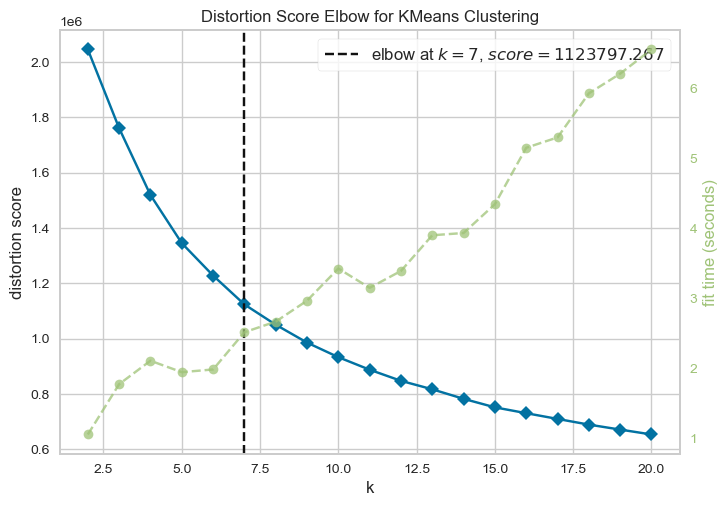

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer_1= KElbowVisualizer(model, k=(2, 21))

visualizer_1.fit(features_pca_df)
visualizer_1.show()

C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 2, Silhouette Score: 0.201, Change from Previous Cluster: 0.0


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 3, Silhouette Score: 0.191, Change from Previous Cluster: -0.01


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 4, Silhouette Score: 0.205, Change from Previous Cluster: 0.014


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 5, Silhouette Score: 0.198, Change from Previous Cluster: -0.007


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 6, Silhouette Score: 0.201, Change from Previous Cluster: 0.003


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 7, Silhouette Score: 0.205, Change from Previous Cluster: 0.004


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 8, Silhouette Score: 0.196, Change from Previous Cluster: -0.009


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




No. Clusters: 9, Silhouette Score: 0.195, Change from Previous Cluster: -0.001


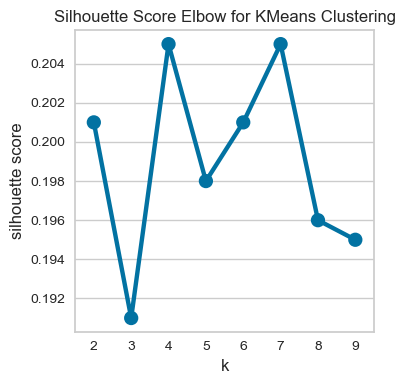

In [ ]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans

    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''

    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels,
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

optimal_kmeans(features_pca_df,2,10)

In [ ]:
features_pca_df

PC1    PC2    PC3    PC4    PC5
0       2.144 -2.409 -0.269  0.966 -2.482
1      -0.677  0.293  0.753  0.861 -1.109
2       0.153  1.649  0.929 -2.234 -0.611
3       0.480  0.160  0.576  0.487 -0.585
4      -0.681  0.781  1.088  1.114 -0.832
...       ...    ...    ...    ...    ...
307122  0.508  0.838 -1.015  1.019  1.480
307123 -0.466  1.795  0.086 -0.711 -0.131
307124 -0.936  0.057  0.235  0.033  0.422
307125  4.440  2.548 -0.452  1.092 -0.902
307126  0.586  1.956 -1.077  1.022 -0.515

[307127 rows x 5 columns]

In [ ]:
# Refit the K-means model with the best k value and predict the clusters
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(features_pca_df)
features_pca_df['cluster'] = kmeans.labels_


C:\Users\DEBI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




KMeans(n_clusters=7, random_state=42)

In [ ]:
x = features_pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

In [ ]:
# Predict the clusters for each row
features_pca_df_label= kmeans.predict(x)


In [ ]:
features_pca_df_label

array([5, 2, 3, ..., 2, 1, 0])

In [ ]:
features_pca_df

PC1    PC2    PC3    PC4    PC5  cluster
0       2.144 -2.409 -0.269  0.966 -2.482        5
1      -0.677  0.293  0.753  0.861 -1.109        2
2       0.153  1.649  0.929 -2.234 -0.611        3
3       0.480  0.160  0.576  0.487 -0.585        2
4      -0.681  0.781  1.088  1.114 -0.832        2
...       ...    ...    ...    ...    ...      ...
307122  0.508  0.838 -1.015  1.019  1.480        6
307123 -0.466  1.795  0.086 -0.711 -0.131        0
307124 -0.936  0.057  0.235  0.033  0.422        2
307125  4.440  2.548 -0.452  1.092 -0.902        1
307126  0.586  1.956 -1.077  1.022 -0.515        0

[307127 rows x 6 columns]

In [ ]:
# Calculate statistics for each cluster
cluster_stats = features_pca_df.groupby('cluster').agg(['mean', 'median', 'std'])

In [ ]:
cluster_stats

PC1                 PC2                 PC3                 PC4  \
          mean median   std   mean median   std   mean median   std   mean   
cluster                                                                      
0       -0.517 -0.639 0.800  1.942  1.913 0.456 -0.368 -0.336 1.018 -0.110   
1        3.859  3.449 1.573  0.554  0.466 1.371  0.225  0.224 1.257  0.732   
2       -0.819 -0.884 0.549  0.022  0.128 0.558  1.048  1.115 0.672  0.273   
3        0.754  0.651 0.693 -0.455 -0.477 0.802  0.203  0.194 0.975 -1.261   
4       13.736 11.605 6.457  2.382  2.225 2.080  2.189  1.917 1.994  5.282   
5       -0.338 -0.444 0.826 -1.402 -1.832 1.052 -0.030 -0.046 0.945  0.894   
6       -0.162 -0.286 0.751 -0.366 -0.318 0.820 -1.374 -1.192 0.910  0.201   

                        PC5               
        median   std   mean median   std  
cluster                                   
0       -0.078 0.893 -0.369 -0.317 0.960  
1        0.632 1.198 -0.010 -0.020 1.145  
2        0.301 0.679  0.465  0.495 0.741  
3       -1.216 0.677 -0.328 -0.305 0.911  
4        4.530 3.412  1.513  1.420 2.329  
5        0.862 0.823 -1.028 -1.007 0.901  
6        0.243 0.816  0.823  0.816 0.853

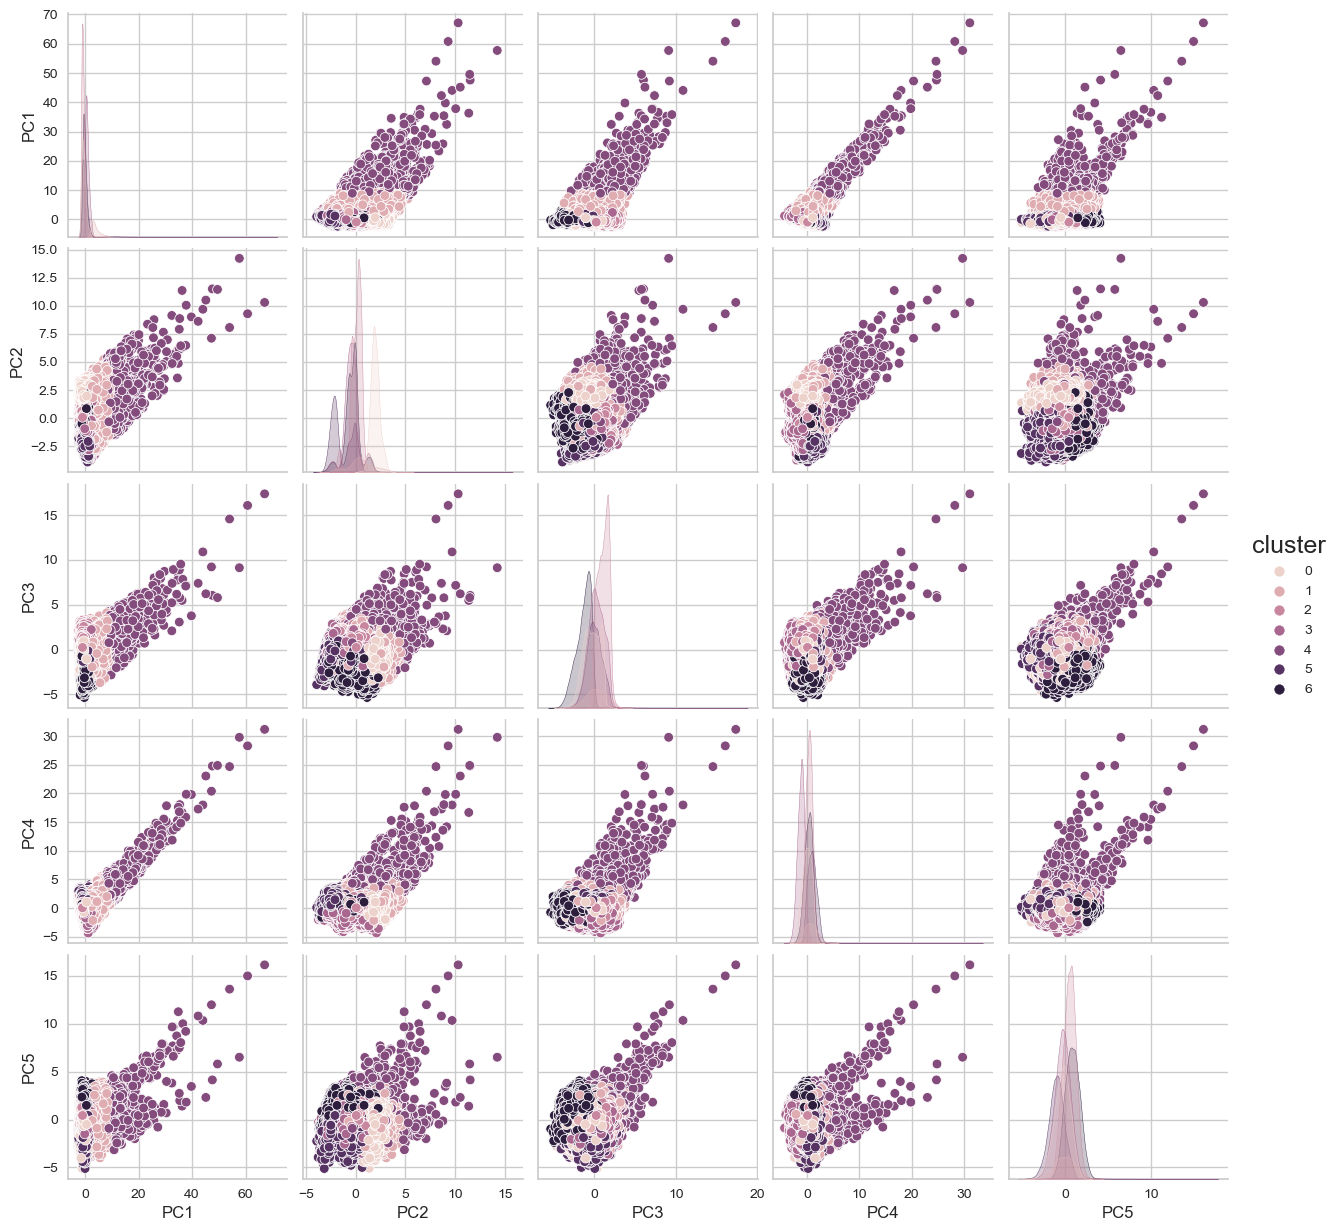

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


# Visualize the clusters using a pairplot
sns.pairplot(features_pca_df, vars=['PC1', 'PC2','PC3','PC4','PC5'], hue='cluster')
plt.show()

Text(0.5, 0, 'PC1')

Text(0.5, 0.5, 'PC2')

Text(0.5, 0, 'PC3')

Text(0.5, 0.92, 'K-means Clustering')

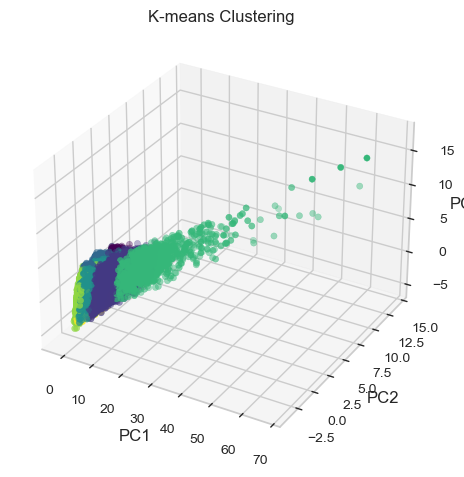

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

features_pca_df['cluster'] = kmeans.labels_

# Visualize the clusters using a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_pca_df['PC1'], features_pca_df['PC2'], features_pca_df['PC3'], c=features_pca_df['cluster'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('K-means Clustering')
plt.show()

**interpret the centroid of each cluster**

In [ ]:
# Interpret each cluster and determine the centroid of each cluster
centroids_2 = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2','PC3','PC4','PC5'])
centroids_2 = StandardScaler().fit_transform(centroids_2)
centroids_2


array([[-0.59003275,  1.24197744, -0.61730538, -0.50479942, -0.66329283],
       [ 0.30749668,  0.13596679, -0.04421157, -0.06618953, -0.20635203],
       [-0.65214672, -0.28678181,  0.75149086, -0.30510815,  0.39847431],
       [-0.32936022, -0.66738322, -0.06365851, -1.10404266, -0.61222726],
       [ 2.33450611,  1.5930873 ,  1.85391712,  2.3044786 ,  1.73178438],
       [-0.55352407, -1.42047603, -0.29067704,  0.01890496, -1.50202556],
       [-0.51693903, -0.59639047, -1.58955549, -0.34324381,  0.85363899]])

In [ ]:
numerical_cols_1=['PC1', 'PC2','PC3','PC4','PC5']

In [ ]:
# Interpret each cluster
for i in range(kmeans.n_clusters):
    cluster_data = features_pca_df[kmeans.labels_ == i]
    print(f"\nCluster {i+1}:\nNumber of data points: {len(cluster_data)}")
    print(f"Mean values of features: {cluster_data[numerical_cols_1].mean()}")



Cluster 1:

Number of data points: 51189

Mean values of features: PC1   -0.517

PC2    1.942

PC3   -0.368

PC4   -0.110

PC5   -0.369

dtype: float64



Cluster 2:

Number of data points: 13074

Mean values of features: PC1    3.859

PC2    0.554

PC3    0.225

PC4    0.732

PC5   -0.010

dtype: float64



Cluster 3:

Number of data points: 76962

Mean values of features: PC1   -0.819

PC2    0.022

PC3    1.048

PC4    0.273

PC5    0.465

dtype: float64



Cluster 4:

Number of data points: 64123

Mean values of features: PC1    0.754

PC2   -0.455

PC3    0.203

PC4   -1.261

PC5   -0.328

dtype: float64



Cluster 5:

Number of data points: 1066

Mean values of features: PC1   13.736

PC2    2.382

PC3    2.189

PC4    5.282

PC5    1.513

dtype: float64



Cluster 6:

Number of data points: 43336

Mean values of features: PC1   -0.338

PC2   -1.402

PC3   -0.030

PC4    0.894

PC5   -1.028

dtype: float64



Cluster 7:

Number of data points: 57377

Mean values of features: PC

Cluster 1: This cluster has negative mean values for PC1, PC3, and PC5, and a positive mean value for PC2. This suggests that this cluster is characterized by low values for PC1, PC3, and PC5, and high values for PC2.

Cluster 2: This cluster has very high mean values for PC1 and moderate mean values for PC2 and PC4, while the mean values for PC3 and PC5 are relatively low. This suggests that this cluster is characterized by very high values for PC1, and moderate to low values for the other PCs.

Cluster 3: This cluster has negative mean values for PC1 and PC2, and positive mean values for PC3 and PC5. This suggests that this cluster is characterized by low values for PC1 and PC2, and high values for PC3 and PC5.

Cluster 4: This cluster has a positive mean value for PC1, and negative mean values for PC2, PC4, and PC5. This suggests that this cluster is characterized by moderate to high values for PC1, and low values for PC2, PC4, and PC5.

Cluster 5: This cluster has very high mean values for PC1, PC4, and PC5, and moderate mean values for PC2 and PC3. This suggests that this cluster is characterized by very high values for PC1, PC4, and PC5, and moderate values for PC2 and PC3.

Cluster 6: This cluster has negative mean values for PC1, PC2, and PC5, and a positive mean value for PC4. This suggests that this cluster is characterized by low values for PC1, PC2, and PC5, and high values for PC4.

Cluster 7: This cluster has negative mean values for PC1, PC2, and PC3, and positive mean values for PC4 and PC5. This suggests that this cluster is characterized by low values for PC1, PC2, and PC3, and high values for PC4 and PC5

In [ ]:
features_pca_df['score']=score

In [ ]:
import pandas as pd
# calculate the mean value of the column
mean_value = features_pca_df['score'].mean()
# fill NaN values with the mean value
features_pca_df['score'].fillna(mean_value, inplace=True)


In [ ]:

features_pca_df.isna().sum()


PC1        0
PC2        0
PC3        0
PC4        0
PC5        0
cluster    0
score      0
dtype: int64

In [ ]:

# Define the features to calculate the statistics for
features = ['PC1', 'PC2','PC3','PC4','PC5','cluster','score']

# Calculate the mean and median of each feature for each cluster
stats_1= features_pca_df.groupby('cluster')[features].agg(['mean', 'median'])

# Flatten the multi-index columns
stats_1.columns = ['_'.join(col).strip() for col in stats_1.columns.values]

# Display the statistics
stats_1


PC1_mean  PC1_median  PC2_mean  PC2_median  PC3_mean  PC3_median  \
cluster                                                                     
0          -0.517      -0.639     1.942       1.913    -0.368      -0.336   
1           3.859       3.449     0.554       0.466     0.225       0.224   
2          -0.819      -0.884     0.022       0.128     1.048       1.115   
3           0.754       0.651    -0.455      -0.477     0.203       0.194   
4          13.736      11.605     2.382       2.225     2.189       1.917   
5          -0.338      -0.444    -1.402      -1.832    -0.030      -0.046   
6          -0.162      -0.286    -0.366      -0.318    -1.374      -1.192   

         PC4_mean  PC4_median  PC5_mean  PC5_median  cluster_mean  \
cluster                                                             
0          -0.110      -0.078    -0.369      -0.317         0.000   
1           0.732       0.632    -0.010      -0.020         1.000   
2           0.273       0.301     0.465       0.495         2.000   
3          -1.261      -1.216    -0.328      -0.305         3.000   
4           5.282       4.530     1.513       1.420         4.000   
5           0.894       0.862    -1.028      -1.007         5.000   
6           0.201       0.243     0.823       0.816         6.000   

         cluster_median  score_mean  score_median  
cluster                                            
0                 0.000      -0.374        -0.007  
1                 1.000      -0.396        -0.397  
2                 2.000      -0.385        -0.397  
3                 3.000      -0.353        -0.397  
4                 4.000      -0.339        -0.397  
5                 5.000      -0.485        -0.397  
6                 6.000      -0.420        -0.397

Cluster 0: This cluster has a score mean of 0.374 and a median of 0.007. The low median score suggests that most users in this cluster have a very low score, while the positive mean score suggests that there may be some users with higher scores. Further analysis is needed to understand the characteristics and behavior of users in this cluster.

Cluster 1: This cluster has a score mean of 0.396 and a median of 0.397. The high median score suggests that most users in this cluster have a positive score, while the positive mean score suggests that there may be some users with even higher scores. This cluster may represent a group of highly loyal users.

Cluster 2: This cluster has a score mean of 0.385 and a median of 0.397. Similar to Cluster 1, the high median score suggests that most users in this cluster have a positive score, while the positive mean score suggests that there may be some users with even higher scores. This cluster may also represent a group of highly loyal users.

Cluster 3: This cluster has a score mean of 0.353 and a median of 0.397. The low median score suggests that most users in this cluster have a positive score, while the negative mean score suggests that there may be some users with very low scores.

Cluster 4: This cluster has a score mean of 0.339 and a median of 0.397. Similar to Cluster 3, the low median score suggests that most users in this cluster have a positive score, while the negative mean score suggests that there may be some users with very low scores. 

Cluster 5: This cluster has a score mean of 0.485 and a median of 0.397. The high median score suggests that most users in this cluster have a positive score, while the very high mean score suggests that there may be some users with exceptionally high scores. This cluster may represent a group of highly engaged and loyal users.

Cluster 6: This cluster has a score mean of 0.420 and a median of 0.397. The high median score suggests that most users in this cluster have a positive score, while the positive mean score suggests that there may be some users with even higher scores. This cluster may also represent a group of highly loyal users.

Overall, the score values for each cluster range from 0.007 to 0.485, with the highest score found in Cluster 5 and the lowest score found in Cluster 0. It's important to note that the interpretation of these scores depends on the context and the scale used for the "score" column

In [ ]:
features_pca_df

PC1    PC2    PC3    PC4    PC5  cluster  score
0       2.144 -2.409 -0.269  0.966 -2.482        5  0.134
1      -0.677  0.293  0.753  0.861 -1.109        2 -0.397
2       0.153  1.649  0.929 -2.234 -0.611        3  0.884
3       0.480  0.160  0.576  0.487 -0.585        2 -0.397
4      -0.681  0.781  1.088  1.114 -0.832        2 -0.264
...       ...    ...    ...    ...    ...      ...    ...
307122  0.508  0.838 -1.015  1.019  1.480        6 -0.085
307123 -0.466  1.795  0.086 -0.711 -0.131        0  1.530
307124 -0.936  0.057  0.235  0.033  0.422        2 -0.397
307125  4.440  2.548 -0.452  1.092 -0.902        1 -0.600
307126  0.586  1.956 -1.077  1.022 -0.515        0 -1.073

[307127 rows x 7 columns]

**visualizing the new clusters after doing pca**

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

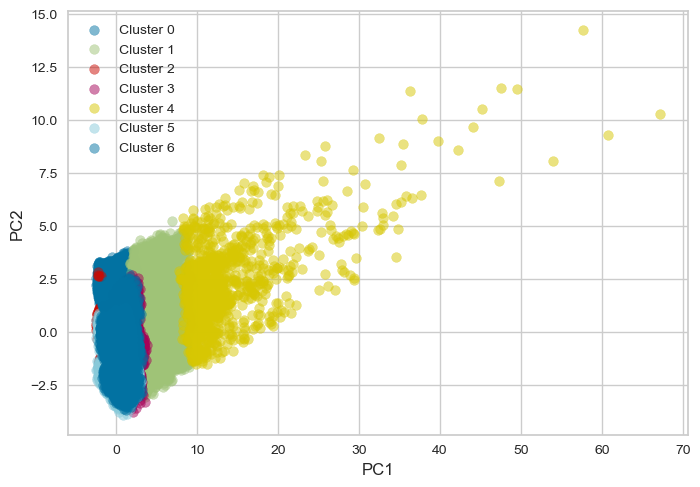

Text(0.5, 0, 'PC2')

Text(0, 0.5, 'PC3')

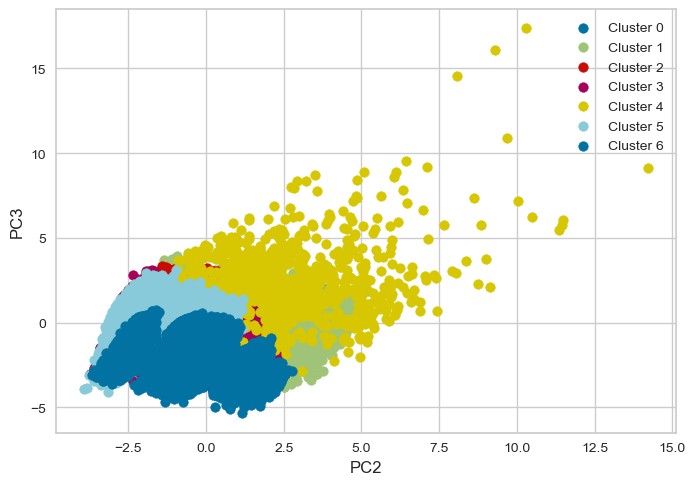

Text(0.5, 0, 'PC3')

Text(0, 0.5, 'PC4')

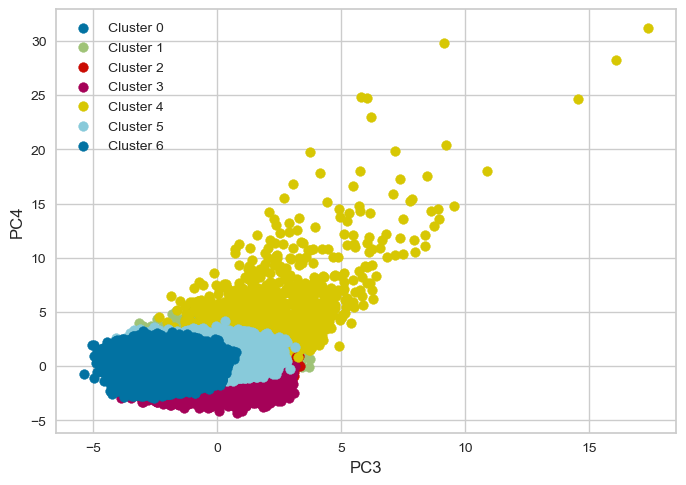

Text(0.5, 0, 'PC4')

Text(0, 0.5, 'PC5')

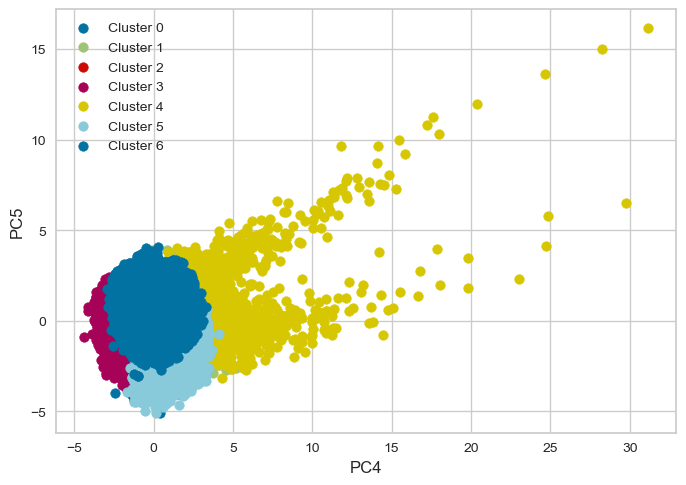

Text(0.5, 0, 'PC5')

Text(0, 0.5, 'score')

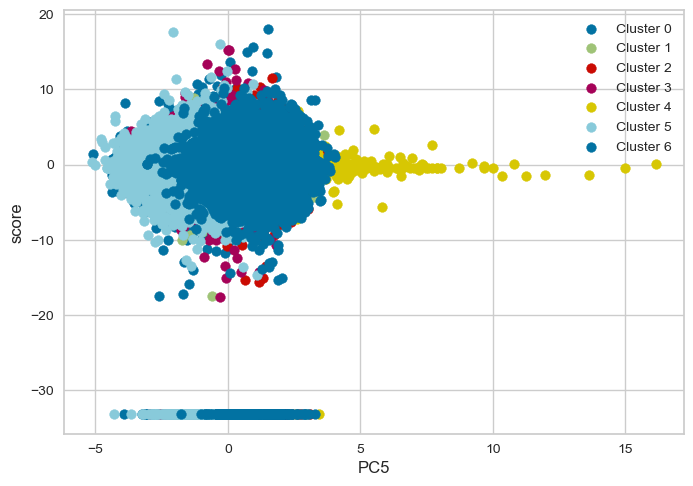

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by the 'cluster' column
grouped = features_pca_df.groupby('cluster')

# Visualize each cluster using scatter plots
for name, group in grouped:
    plt.scatter(group['PC1'], group['PC2'], label=f'Cluster {name}', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

for name, group in grouped:
    plt.scatter(group['PC2'], group['PC3'], label=f'Cluster {name}')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.legend()
plt.show()

for name, group in grouped:
    plt.scatter(group['PC3'], group['PC4'], label=f'Cluster {name}')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.legend()
plt.show()

for name, group in grouped:
    plt.scatter(group['PC4'], group['PC5'], label=f'Cluster {name}')
plt.xlabel('PC4')
plt.ylabel('PC5')
plt.legend()
plt.show()

for name, group in grouped:
    plt.scatter(group['PC5'], group['score'], label=f'Cluster {name}')
plt.xlabel('PC5')
plt.ylabel('score')
plt.legend()
plt.show()


Text(0.5, 0, 'PC1')

Text(0.5, 0.5, 'PC2')

Text(0.5, 0, 'PC3')

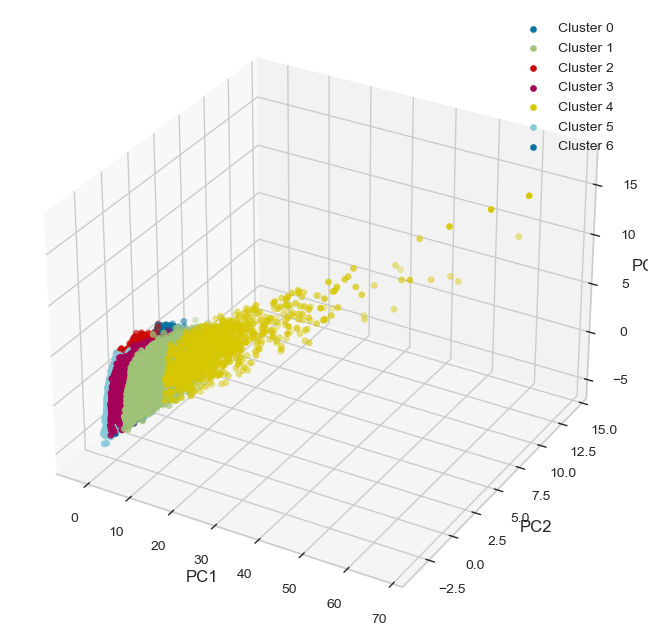

Text(0.5, 0, 'PC2')

Text(0.5, 0.5, 'PC3')

Text(0.5, 0, 'PC4')

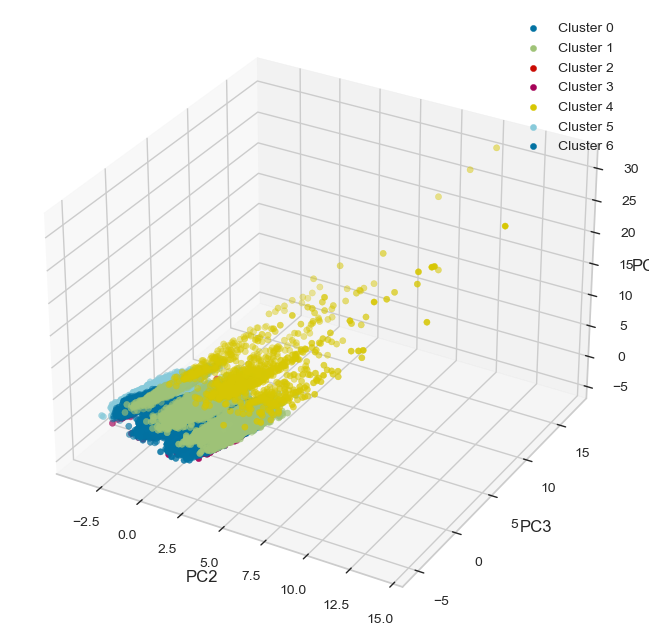

Text(0.5, 0, 'PC3')

Text(0.5, 0.5, 'PC4')

Text(0.5, 0, 'PC5')

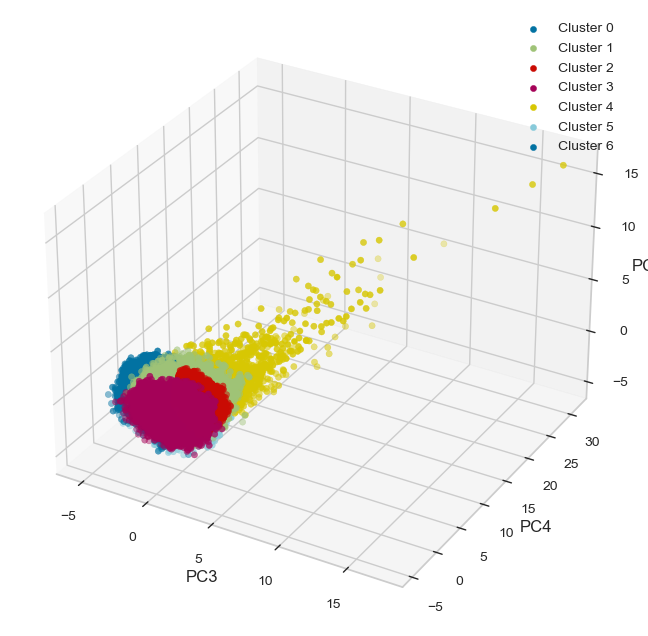

Text(0.5, 0, 'PC4')

Text(0.5, 0.5, 'PC5')

Text(0.5, 0, 'score')

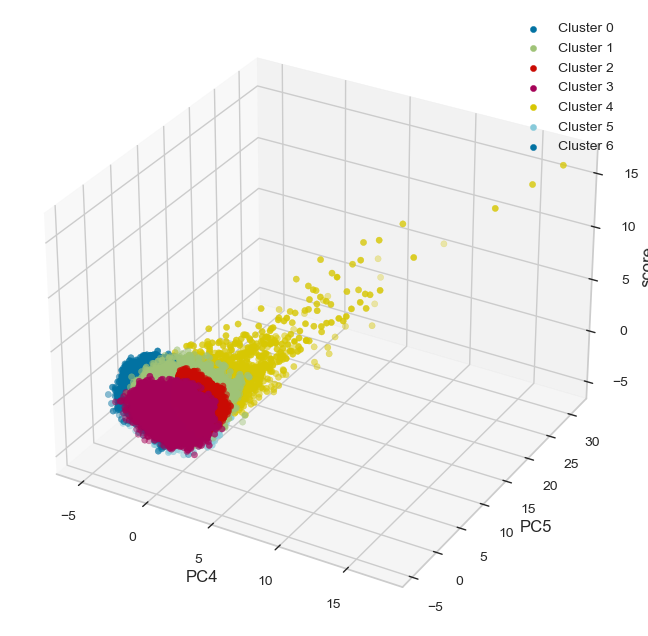

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Group the data by the 'cluster' column
grouped = features_pca_df.groupby('cluster')

# Visualize each cluster using a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for name, group in grouped:
    ax.scatter(xs=group['PC1'], ys=group['PC2'], zs=group['PC3'], label=f'Cluster {name}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for name, group in grouped:
    ax.scatter(xs=group['PC2'], ys=group['PC3'], zs=group['PC4'], label=f'Cluster {name}')
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
ax.set_zlabel('PC4')
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for name, group in grouped:
    ax.scatter(xs=group['PC3'], ys=group['PC4'], zs=group['PC5'], label=f'Cluster {name}')
ax.set_xlabel('PC3')
ax.set_ylabel('PC4')
ax.set_zlabel('PC5')
ax.legend()
plt.show()


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for name, group in grouped:
    ax.scatter(xs=group['PC3'], ys=group['PC4'], zs=group['PC5'], label=f'Cluster {name}')
ax.set_xlabel('PC4')
ax.set_ylabel('PC5')
ax.set_zlabel('score')
ax.legend()
plt.show()

a**fter  doing pca the number of clusters reduced only from 8 to 7 but the algorithm of the clustering in the lower dimension data performs well that's appear in the visualization of the cllusters ,it can distinguish between all clusters other than cluster 0 and 6 and i think it was the same problem in clustering  the data before doing pca because of high similarity between users in the both clusters but from my insights and from my analysis i think the cluster algorithm perform better after doing pca and the # of clusters only reduced one degree**

In [ ]:

features_pca_df.describe(include="all")


PC1        PC2        PC3        PC4        PC5    cluster  \
count 307127.000 307127.000 307127.000 307127.000 307127.000 307127.000   
mean       0.000      0.000     -0.000     -0.000      0.000      3.010   
std        1.541      1.277      1.234      1.122      1.083      2.042   
min       -2.445     -3.919     -5.357     -4.367     -5.120      0.000   
25%       -0.897     -0.677     -0.829     -0.750     -0.712      2.000   
50%       -0.294     -0.093      0.056      0.046      0.046      3.000   
75%        0.495      0.592      0.951      0.731      0.753      5.000   
max       67.111     14.219     17.361     31.152     16.146      6.000   

           score  
count 307127.000  
mean      -0.397  
std        2.996  
min      -33.219  
25%       -0.397  
50%       -0.397  
75%        0.223  
max       17.965

The mean of each principal component is very close to zero, which indicates that the PCA transformation was successful in centering the data.

The standard deviation of each principal component varies, with PC1 having the highest standard deviation, indicating that it accounts for a larger proportion of the variance in the data compared to the other components.

The minimum and maximum values for each principal component vary widely, indicating that there is significant variability in the data across the different components.

The cluster assignments have a mean of 3.010, indicating that there are slightly more data points in clusters 3, 4, and 5 than in the other clusters.
The score variable has a mean of -0.397, which suggests that, on average, the loyalty score is slightly lower than the overall average (assuming the original data had a mean of zero).


The score variable has a wide range, with a minimum value of -33.219 and a maximum value of 17.965. The negative minimum value suggests that there are some data points with very low loyalty scores, while the positive maximum value suggests that there are some data points with very high loyalty scores.

In [ ]:
features_pca_df['card_id']=card_id
# Make the 'card_id' column the first column in the DataFrame
card_id_series = features_pca_df.pop('card_id')
features_pca_df.insert(0, 'card_id', card_id_series)

In [ ]:
features_pca_df

card_id    PC1    PC2    PC3    PC4    PC5  cluster  score
0       C_ID_00007093c1  2.144 -2.409 -0.269  0.966 -2.482        5  0.134
1       C_ID_0001238066 -0.677  0.293  0.753  0.861 -1.109        2 -0.397
2       C_ID_0001506ef0  0.153  1.649  0.929 -2.234 -0.611        3  0.884
3       C_ID_0001793786  0.480  0.160  0.576  0.487 -0.585        2 -0.397
4       C_ID_000183fdda -0.681  0.781  1.088  1.114 -0.832        2 -0.264
...                 ...    ...    ...    ...    ...    ...      ...    ...
307122  C_ID_fffeed3a89  0.508  0.838 -1.015  1.019  1.480        6 -0.085
307123  C_ID_ffff579d3a -0.466  1.795  0.086 -0.711 -0.131        0  1.530
307124  C_ID_ffff756266 -0.936  0.057  0.235  0.033  0.422        2 -0.397
307125  C_ID_ffff828181  4.440  2.548 -0.452  1.092 -0.902        1 -0.600
307126  C_ID_fffffd5772  0.586  1.956 -1.077  1.022 -0.515        0 -1.073

[307127 rows x 8 columns]

**Part_Two**

4 Frequent Pattern Mining

**You can consider the mlxtend library1 or the spmf library2
Q5 (20 points) Use frequent pattern mining to find frequently co-occurring
transaction types. Report your findings and justify how you pick the min
support threshold.**


In [ ]:
import pandas as pd


# Merge the datasets
import pandas as pd
# Merge all the datasets together on the user_id column
merged_data_11= pd.concat([historical, new_merchant], axis=0)
merged_data_22 = pd.merge(merged_data_11, merchants, on=['merchant_id','category_1','state_id','city_id','subsector_id','category_2','merchant_category_id'], how='left')


In [ ]:
merged_data_11

authorized_flag          card_id  city_id category_1  installments  \
0                     Y  C_ID_4e6213e9bc       88          N             0   
1                     Y  C_ID_4e6213e9bc       88          N             0   
2                     Y  C_ID_4e6213e9bc       88          N             0   
3                     Y  C_ID_4e6213e9bc       88          N             0   
4                     Y  C_ID_4e6213e9bc       88          N             0   
...                 ...              ...      ...        ...           ...   
1963026               Y  C_ID_1320dee851      142          N             0   
1963027               Y  C_ID_f112aa3381      158          N             0   
1963028               Y  C_ID_bd97b86450       69          N             1   
1963029               Y  C_ID_c0513fd84f      130          N             0   
1963030               Y  C_ID_a935410f8e       19          N             0   

        category_3  merchant_category_id      merchant_id  month_lag  \
0                A                    80  M_ID_e020e9b302         -8   
1                A                   367  M_ID_86ec983688         -7   
2                A                    80  M_ID_979ed661fc         -6   
3                A                   560  M_ID_e6d5ae8ea6         -5   
4                A                    80  M_ID_e020e9b302        -11   
...            ...                   ...              ...        ...   
1963026          A                   309  M_ID_7754b67f3b          2   
1963027          A                   560  M_ID_da063195b7          2   
1963028          B                   278  M_ID_9a9ccb6544          1   
1963029          A                   367  M_ID_40c28d596f          1   
1963030          A                   278  M_ID_d855771cd9          2   

         purchase_amount        purchase_date  category_2  state_id  \
0                 -0.703  2017-06-25 15:33:07       1.000        16   
1                 -0.733  2017-07-15 12:10:45       1.000        16   
2                 -0.720  2017-08-09 22:04:29       1.000        16   
3                 -0.735  2017-09-02 10:06:26       1.000        16   
4                 -0.723  2017-03-10 01:14:19       1.000        16   
...                  ...                  ...         ...       ...   
1963026           -0.702  2018-04-06 14:36:52       3.000        19   
1963027           -0.694  2018-03-07 13:19:18       1.000        15   
1963028           -0.621  2018-03-05 12:04:56       1.000         9   
1963029           -0.657  2018-03-09 14:47:05       3.000         7   
1963030           -0.739  2018-04-11 07:59:46       1.000         9   

         subsector_id  
0                  37  
1                  16  
2                  37  
3                  34  
4                  37  
...               ...  
1963026            21  
1963027            34  
1963028            37  
1963029            16  
1963030            37  

[31075392 rows x 14 columns]

In [ ]:
merged_data_22

authorized_flag          card_id  city_id category_1  installments  \
0                      Y  C_ID_4e6213e9bc       88          N             0   
1                      Y  C_ID_4e6213e9bc       88          N             0   
2                      Y  C_ID_4e6213e9bc       88          N             0   
3                      Y  C_ID_4e6213e9bc       88          N             0   
4                      Y  C_ID_4e6213e9bc       88          N             0   
...                  ...              ...      ...        ...           ...   
31177688               Y  C_ID_1320dee851      142          N             0   
31177689               Y  C_ID_f112aa3381      158          N             0   
31177690               Y  C_ID_bd97b86450       69          N             1   
31177691               Y  C_ID_c0513fd84f      130          N             0   
31177692               Y  C_ID_a935410f8e       19          N             0   

         category_3  merchant_category_id      merchant_id  month_lag  \
0                 A                    80  M_ID_e020e9b302         -8   
1                 A                   367  M_ID_86ec983688         -7   
2                 A                    80  M_ID_979ed661fc         -6   
3                 A                   560  M_ID_e6d5ae8ea6         -5   
4                 A                    80  M_ID_e020e9b302        -11   
...             ...                   ...              ...        ...   
31177688          A                   309  M_ID_7754b67f3b          2   
31177689          A                   560  M_ID_da063195b7          2   
31177690          B                   278  M_ID_9a9ccb6544          1   
31177691          A                   367  M_ID_40c28d596f          1   
31177692          A                   278  M_ID_d855771cd9          2   

          purchase_amount  ... avg_sales_lag3  avg_purchases_lag3  \
0                  -0.703  ...          1.080               1.082   
1                  -0.733  ...          1.060               1.052   
2                  -0.720  ...          0.980               0.975   
3                  -0.735  ...          1.000               1.053   
4                  -0.723  ...          1.080               1.082   
...                   ...  ...            ...                 ...   
31177688           -0.702  ...          1.280               1.157   
31177689           -0.694  ...            NaN                 NaN   
31177690           -0.621  ...          0.980               1.033   
31177691           -0.657  ...          1.040               1.092   
31177692           -0.739  ...            NaN                 NaN   

          active_months_lag3  avg_sales_lag6  avg_purchases_lag6  \
0                      3.000           1.140               1.114   
1                      3.000           1.060               1.059   
2                      3.000           0.980               0.967   
3                      3.000           0.880               0.897   
4                      3.000           1.140               1.114   
...                      ...             ...                 ...   
31177688               3.000           1.390               1.185   
31177689                 NaN             NaN                 NaN   
31177690               3.000           1.010               1.042   
31177691               3.000           0.940               1.052   
31177692                 NaN             NaN                 NaN   

          active_months_lag6  avg_sales_lag12 avg_purchases_lag12  \
0                      6.000            1.190               1.157   
1                      6.000            1.050               1.062   
2                      6.000            0.970               0.957   
3                      6.000            0.860               0.864   
4                      6.000            1.190               1.157   
...                      ...              ...                 ...   
31177688               6.000            1.450         

In [ ]:
merged_data_22.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 31177693 entries, 0 to 31177692

Data columns (total 29 columns):

 #   Column                       Dtype  

---  ------                       -----  

 0   authorized_flag              object 

 1   card_id                      object 

 2   city_id                      int16  

 3   category_1                   object 

 4   installments                 int16  

 5   category_3                   object 

 6   merchant_category_id         int16  

 7   merchant_id                  object 

 8   month_lag                    int8   

 9   purchase_amount              float64

 10  purchase_date                object 

 11  category_2                   float64

 12  state_id                     int8   

 13  subsector_id                 int8   

 14  merchant_group_id            float64

 15  numerical_1                  float64

 16  numerical_2                  float64

 17  most_recent_sales_range      object 

 18  most_recent_purch

In [ ]:
merged_data_22.isna().sum()

authorized_flag                       0
card_id                               0
city_id                               0
category_1                            0
installments                          0
category_3                       234241
merchant_category_id                  0
merchant_id                      164697
month_lag                             0
purchase_amount                       0
purchase_date                         0
category_2                      2800109
state_id                              0
subsector_id                          0
merchant_group_id              10888649
numerical_1                    10888649
numerical_2                    10888649
most_recent_sales_range        10888649
most_recent_purchases_range    10888649
avg_sales_lag3                 10897999
avg_purchases_lag3             10888649
active_months_lag3             10888649
avg_sales_lag6                 10897999
avg_purchases_lag6             10888649
active_months_lag6             10888649


In [ ]:
import pandas as pd
# Print the object columns
merged_data_22.select_dtypes(include=['object']).columns

Index(['authorized_flag', 'card_id', 'category_1', 'category_3', 'merchant_id',
       'purchase_date', 'most_recent_sales_range',
       'most_recent_purchases_range', 'category_4'],
      dtype='object')

In [ ]:
import pandas as pd
# Print the object columns
merged_data_33=merged_data_22.select_dtypes(include=['object'])
merged_data_33

authorized_flag          card_id category_1 category_3  \
0                      Y  C_ID_4e6213e9bc          N          A   
1                      Y  C_ID_4e6213e9bc          N          A   
2                      Y  C_ID_4e6213e9bc          N          A   
3                      Y  C_ID_4e6213e9bc          N          A   
4                      Y  C_ID_4e6213e9bc          N          A   
...                  ...              ...        ...        ...   
31177688               Y  C_ID_1320dee851          N          A   
31177689               Y  C_ID_f112aa3381          N          A   
31177690               Y  C_ID_bd97b86450          N          B   
31177691               Y  C_ID_c0513fd84f          N          A   
31177692               Y  C_ID_a935410f8e          N          A   

              merchant_id        purchase_date most_recent_sales_range  \
0         M_ID_e020e9b302  2017-06-25 15:33:07                       A   
1         M_ID_86ec983688  2017-07-15 12:10:45                       A   
2         M_ID_979ed661fc  2017-08-09 22:04:29                       C   
3         M_ID_e6d5ae8ea6  2017-09-02 10:06:26                       D   
4         M_ID_e020e9b302  2017-03-10 01:14:19                       A   
...                   ...                  ...                     ...   
31177688  M_ID_7754b67f3b  2018-04-06 14:36:52                       E   
31177689  M_ID_da063195b7  2018-03-07 13:19:18                     NaN   
31177690  M_ID_9a9ccb6544  2018-03-05 12:04:56                       D   
31177691  M_ID_40c28d596f  2018-03-09 14:47:05                       D   
31177692  M_ID_d855771cd9  2018-04-11 07:59:46                     NaN   

         most_recent_purchases_range category_4  
0                                  A          Y  
1                                  A          Y  
2                                  C          Y  
3                                  C          Y  
4                                  A          Y  
...                              ...        ...  
31177688                           D          N  
31177689                         NaN        NaN  
31177690                           C          Y  
31177691                           D          N  
31177692                         NaN        NaN  

[31177693 rows x 9 columns]

In [ ]:
merged_data_33.isna().sum()

authorized_flag                       0
card_id                               0
category_1                            0
category_3                       234241
merchant_id                      164697
purchase_date                         0
most_recent_sales_range        10888649
most_recent_purchases_range    10888649
category_4                     10888649
dtype: int64

In [ ]:
# fill NaN values in a column with mode value
mode_value =merged_data_33['category_3'].mode()[0]
merged_data_33['category_3'].fillna(mode_value, inplace=True)

In [ ]:
# fill NaN values in all categorical columns with mode value
for column in merged_data_33.select_dtypes(include=['object']):
    mode_value = merged_data_33[column].mode()[0]
    merged_data_33[column].fillna(mode_value, inplace=True)

In [ ]:
merged_data_33.isna().sum()

authorized_flag                0
card_id                        0
category_1                     0
category_3                     0
merchant_id                    0
purchase_date                  0
most_recent_sales_range        0
most_recent_purchases_range    0
category_4                     0
dtype: int64

In [ ]:
# define categorical columns and aggregation functions
cat_cols = ['authorized_flag', 'category_1', 'category_3', 'merchant_id', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']
aggregation_functions = {col: 'first' for col in cat_cols}

# group by card_id and apply aggregation functions
grouped_df = merged_data_33.groupby('card_id').agg(aggregation_functions)

In [ ]:
grouped_df

authorized_flag category_1 category_3      merchant_id  \
card_id                                                                  
C_ID_00007093c1               Y          N          B  M_ID_9400cf2342   
C_ID_0001238066               Y          N          A  M_ID_3f35ef9a50   
C_ID_0001506ef0               Y          N          A  M_ID_93aa47602a   
C_ID_0001793786               Y          N          A  M_ID_bff5cd4d78   
C_ID_000183fdda               Y          N          B  M_ID_00a6ca8a8a   
...                         ...        ...        ...              ...   
C_ID_ffff1d9928               Y          N          B  M_ID_5e32ca1645   
C_ID_ffff579d3a               Y          N          A  M_ID_9ce3a35d80   
C_ID_ffff756266               Y          N          C  M_ID_0262bf62a0   
C_ID_ffff828181               N          N          B  M_ID_53b72968bf   
C_ID_fffffd5772               Y          Y          B  M_ID_445742726b   

                most_recent_sales_range most_recent_purchases_range category_4  
card_id                                                                         
C_ID_00007093c1                       A                           A          Y  
C_ID_0001238066                       D                           D          N  
C_ID_0001506ef0                       B                           B          Y  
C_ID_0001793786                       A                           A          Y  
C_ID_000183fdda                       A                           A          Y  
...                                 ...                         ...        ...  
C_ID_ffff1d9928                       C                           B          N  
C_ID_ffff579d3a                       B                           C          N  
C_ID_ffff756266                       C                           C          N  
C_ID_ffff828181                       A                           A          Y  
C_ID_fffffd5772                       A                           A          Y  

[325540 rows x 7 columns]

In [ ]:
grouped_df.duplicated().sum()

188515

In [ ]:
grouped_df3=grouped_df.copy()

In [ ]:
grouped_df3

authorized_flag category_1 category_3      merchant_id  \
card_id                                                                  
C_ID_00007093c1               Y          N          B  M_ID_9400cf2342   
C_ID_0001238066               Y          N          A  M_ID_3f35ef9a50   
C_ID_0001506ef0               Y          N          A  M_ID_93aa47602a   
C_ID_0001793786               Y          N          A  M_ID_bff5cd4d78   
C_ID_000183fdda               Y          N          B  M_ID_00a6ca8a8a   
...                         ...        ...        ...              ...   
C_ID_ffff1d9928               Y          N          B  M_ID_5e32ca1645   
C_ID_ffff579d3a               Y          N          A  M_ID_9ce3a35d80   
C_ID_ffff756266               Y          N          C  M_ID_0262bf62a0   
C_ID_ffff828181               N          N          B  M_ID_53b72968bf   
C_ID_fffffd5772               Y          Y          B  M_ID_445742726b   

                most_recent_sales_range most_recent_purchases_range category_4  
card_id                                                                         
C_ID_00007093c1                       A                           A          Y  
C_ID_0001238066                       D                           D          N  
C_ID_0001506ef0                       B                           B          Y  
C_ID_0001793786                       A                           A          Y  
C_ID_000183fdda                       A                           A          Y  
...                                 ...                         ...        ...  
C_ID_ffff1d9928                       C                           B          N  
C_ID_ffff579d3a                       B                           C          N  
C_ID_ffff756266                       C                           C          N  
C_ID_ffff828181                       A                           A          Y  
C_ID_fffffd5772                       A                           A          Y  

[325540 rows x 7 columns]

In [ ]:
grouped_df3 = grouped_df3.drop(['merchant_id'], axis=1)


In [ ]:
grouped_df3

authorized_flag category_1 category_3 most_recent_sales_range  \
card_id                                                                         
C_ID_00007093c1               Y          N          B                       A   
C_ID_0001238066               Y          N          A                       D   
C_ID_0001506ef0               Y          N          A                       B   
C_ID_0001793786               Y          N          A                       A   
C_ID_000183fdda               Y          N          B                       A   
...                         ...        ...        ...                     ...   
C_ID_ffff1d9928               Y          N          B                       C   
C_ID_ffff579d3a               Y          N          A                       B   
C_ID_ffff756266               Y          N          C                       C   
C_ID_ffff828181               N          N          B                       A   
C_ID_fffffd5772               Y          Y          B                       A   

                most_recent_purchases_range category_4  
card_id                                                 
C_ID_00007093c1                           A          Y  
C_ID_0001238066                           D          N  
C_ID_0001506ef0                           B          Y  
C_ID_0001793786                           A          Y  
C_ID_000183fdda                           A          Y  
...                                     ...        ...  
C_ID_ffff1d9928                           B          N  
C_ID_ffff579d3a                           C          N  
C_ID_ffff756266                           C          N  
C_ID_ffff828181                           A          Y  
C_ID_fffffd5772                           A          Y  

[325540 rows x 6 columns]

In [ ]:
from mlxtend.frequent_patterns import hmine

In [ ]:
import pandas as pd
# create one-hot encoded DataFrame from categorical columns in grouped_df
one_hot_df = pd.get_dummies(grouped_df3)


In [ ]:
one_hot_df

authorized_flag_N  authorized_flag_Y  category_1_N  \
card_id                                                               
C_ID_00007093c1                  0                  1             1   
C_ID_0001238066                  0                  1             1   
C_ID_0001506ef0                  0                  1             1   
C_ID_0001793786                  0                  1             1   
C_ID_000183fdda                  0                  1             1   
...                            ...                ...           ...   
C_ID_ffff1d9928                  0                  1             1   
C_ID_ffff579d3a                  0                  1             1   
C_ID_ffff756266                  0                  1             1   
C_ID_ffff828181                  1                  0             1   
C_ID_fffffd5772                  0                  1             0   

                 category_1_Y  category_3_A  category_3_B  category_3_C  \
card_id                                                                   
C_ID_00007093c1             0             0             1             0   
C_ID_0001238066             0             1             0             0   
C_ID_0001506ef0             0             1             0             0   
C_ID_0001793786             0             1             0             0   
C_ID_000183fdda             0             0             1             0   
...                       ...           ...           ...           ...   
C_ID_ffff1d9928             0             0             1             0   
C_ID_ffff579d3a             0             1             0             0   
C_ID_ffff756266             0             0             0             1   
C_ID_ffff828181             0             0             1             0   
C_ID_fffffd5772             1             0             1             0   

                 most_recent_sales_range_A  most_recent_sales_range_B  \
card_id                                                                 
C_ID_00007093c1                          1                          0   
C_ID_0001238066                          0                          0   
C_ID_0001506ef0                          0                          1   
C_ID_0001793786                          1                          0   
C_ID_000183fdda                          1                          0   
...                                    ...                        ...   
C_ID_ffff1d9928                          0                          0   
C_ID_ffff579d3a                          0                          1   
C_ID_ffff756266                          0                          0   
C_ID_ffff828181                          1                          0   
C_ID_fffffd5772                          1                          0   

                 most_recent_sales_range_C  most_recent_sales_range_D  \
card_id                                                                 
C_ID_00007093c1                          0                          0   
C_ID_0001238066                          0                          1   
C_ID_0001506ef0                          0                          0   
C_ID_0001793786                          0                          0   
C_ID_000183fdda                          0                          0   
...                                    ...                        ...   
C_ID_ffff1d9928                          1                          0   
C_ID_ffff579d3a                          0                          0   
C_ID_ffff756266                          1                          0   
C_ID_ffff828181                          0                          0   
C_ID_fffffd5772                          0                          0   

                 most_recent_sales_range_E  most_recent_purchases_range_A  \
card_id                                                                     
C_ID_00007093c1                          0                     

In [ ]:

# apply hmine function to one-hot encoded DataFrame
patterns, rules = hmine(one_hot_df)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import hmine

hmine(one_hot_df, min_support=.6)


C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support itemsets
0   0.892      (1)
1   0.816   (1, 2)
2   0.651  (1, 18)
3   0.900      (2)
4   0.635  (2, 18)
5   0.735     (18)

In [ ]:
from mlxtend.frequent_patterns import apriori

# Apply the apriori algorithm to find frequent itemsets
# Use a min_support value of 0.6 (this value is chosen based on the knowledge about your dataset)
frequent_itemsets = apriori(one_hot_df, min_support=0.6, use_colnames=True)

print(frequent_itemsets)

   support                           itemsets

0    0.892                (authorized_flag_Y)

1    0.900                     (category_1_N)

2    0.735                     (category_4_Y)

3    0.816  (category_1_N, authorized_flag_Y)

4    0.651  (category_4_Y, authorized_flag_Y)

5    0.635       (category_1_N, category_4_Y)


C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




In [ ]:
hmine(one_hot_df, min_support=0.8, use_colnames=True)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support                           itemsets
0   0.892                (authorized_flag_Y)
1   0.816  (category_1_N, authorized_flag_Y)
2   0.900                     (category_1_N)

In [ ]:
hmine(one_hot_df, min_support=0.5, use_colnames=True)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support                                           itemsets
0    0.892                                (authorized_flag_Y)
1    0.816                  (category_1_N, authorized_flag_Y)
2    0.575    (category_1_N, authorized_flag_Y, category_4_Y)
3    0.651                  (category_4_Y, authorized_flag_Y)
4    0.900                                     (category_1_N)
5    0.635                       (category_1_N, category_4_Y)
6    0.558                        (most_recent_sales_range_A)
7    0.539  (most_recent_purchases_range_A, most_recent_sa...
8    0.528  (category_4_Y, most_recent_purchases_range_A, ...
9    0.542          (category_4_Y, most_recent_sales_range_A)
10   0.564                    (most_recent_purchases_range_A)
11   0.543      (category_4_Y, most_recent_purchases_range_A)
12   0.735                                     (category_4_Y)

**i justify the min support of the data more than one time to see the highest min support between two features  is 0.892 and lowest min support between two features is .3 and the range of support items different in high and low min_support but it get higher when the min_support get lower and it get lower when the min_support get higher**

**Q6 (10 Points) Redo Q5 by splitting users based on their loyalty scores.
The goal is to explore if different frequent patterns exist in users with
high/low loyalty scores.**

In [ ]:
merged_data_22 = pd.merge(merged_data_11, merchants, on=['merchant_id','category_1','state_id','city_id','subsector_id','category_2','merchant_category_id'], how='left')


In [ ]:
merged_data_44= pd.merge(merged_data_22, userscore, on='card_id', how='left')


In [ ]:
merged_data_44

authorized_flag          card_id  city_id category_1  installments  \
0                      Y  C_ID_4e6213e9bc       88          N             0   
1                      Y  C_ID_4e6213e9bc       88          N             0   
2                      Y  C_ID_4e6213e9bc       88          N             0   
3                      Y  C_ID_4e6213e9bc       88          N             0   
4                      Y  C_ID_4e6213e9bc       88          N             0   
...                  ...              ...      ...        ...           ...   
31177688               Y  C_ID_1320dee851      142          N             0   
31177689               Y  C_ID_f112aa3381      158          N             0   
31177690               Y  C_ID_bd97b86450       69          N             1   
31177691               Y  C_ID_c0513fd84f      130          N             0   
31177692               Y  C_ID_a935410f8e       19          N             0   

         category_3  merchant_category_id      merchant_id  month_lag  \
0                 A                    80  M_ID_e020e9b302         -8   
1                 A                   367  M_ID_86ec983688         -7   
2                 A                    80  M_ID_979ed661fc         -6   
3                 A                   560  M_ID_e6d5ae8ea6         -5   
4                 A                    80  M_ID_e020e9b302        -11   
...             ...                   ...              ...        ...   
31177688          A                   309  M_ID_7754b67f3b          2   
31177689          A                   560  M_ID_da063195b7          2   
31177690          B                   278  M_ID_9a9ccb6544          1   
31177691          A                   367  M_ID_40c28d596f          1   
31177692          A                   278  M_ID_d855771cd9          2   

          purchase_amount  ... active_months_lag6  avg_sales_lag12  \
0                  -0.703  ...              6.000            1.190   
1                  -0.733  ...              6.000            1.050   
2                  -0.720  ...              6.000            0.970   
3                  -0.735  ...              6.000            0.860   
4                  -0.723  ...              6.000            1.190   
...                   ...  ...                ...              ...   
31177688           -0.702  ...              6.000            1.450   
31177689           -0.694  ...                NaN              NaN   
31177690           -0.621  ...              6.000            0.990   
31177691           -0.657  ...              6.000            0.890   
31177692           -0.739  ...                NaN              NaN   

          avg_purchases_lag12  active_months_lag12  category_4  \
0                       1.157               12.000           Y   
1                       1.062               12.000           Y   
2                       0.957               12.000           Y   
3                       0.864               12.000           Y   
4                       1.157               12.000           Y   
...                       ...                  ...         ...   
31177688                1.173               12.000           N   
31177689                  NaN                  NaN         NaN   
31177690                1.028               12.000           Y   
31177691                1.025               12.000           N   
31177692                  NaN                  NaN         NaN   

          first_active_month  feature_1 feature_2 feature_3  score  
0                        NaN        NaN       NaN       NaN    NaN  
1                        NaN        NaN       NaN       NaN    NaN  
2                        NaN        NaN       NaN       NaN    NaN  
3                        NaN        NaN       NaN       NaN    NaN  
4                        NaN        NaN       NaN       NaN    NaN  
...                      ...        ...       ...       ...    ...  
31177688                 NaN        NaN       NaN       NaN    NaN

In [ ]:
import pandas as pd
# Print the object columns
merged_data_55=merged_data_44.select_dtypes(include=['object'])
merged_data_55

authorized_flag          card_id category_1 category_3  \
0                      Y  C_ID_4e6213e9bc          N          A   
1                      Y  C_ID_4e6213e9bc          N          A   
2                      Y  C_ID_4e6213e9bc          N          A   
3                      Y  C_ID_4e6213e9bc          N          A   
4                      Y  C_ID_4e6213e9bc          N          A   
...                  ...              ...        ...        ...   
31177688               Y  C_ID_1320dee851          N          A   
31177689               Y  C_ID_f112aa3381          N          A   
31177690               Y  C_ID_bd97b86450          N          B   
31177691               Y  C_ID_c0513fd84f          N          A   
31177692               Y  C_ID_a935410f8e          N          A   

              merchant_id        purchase_date most_recent_sales_range  \
0         M_ID_e020e9b302  2017-06-25 15:33:07                       A   
1         M_ID_86ec983688  2017-07-15 12:10:45                       A   
2         M_ID_979ed661fc  2017-08-09 22:04:29                       C   
3         M_ID_e6d5ae8ea6  2017-09-02 10:06:26                       D   
4         M_ID_e020e9b302  2017-03-10 01:14:19                       A   
...                   ...                  ...                     ...   
31177688  M_ID_7754b67f3b  2018-04-06 14:36:52                       E   
31177689  M_ID_da063195b7  2018-03-07 13:19:18                     NaN   
31177690  M_ID_9a9ccb6544  2018-03-05 12:04:56                       D   
31177691  M_ID_40c28d596f  2018-03-09 14:47:05                       D   
31177692  M_ID_d855771cd9  2018-04-11 07:59:46                     NaN   

         most_recent_purchases_range category_4 first_active_month  
0                                  A          Y                NaN  
1                                  A          Y                NaN  
2                                  C          Y                NaN  
3                                  C          Y                NaN  
4                                  A          Y                NaN  
...                              ...        ...                ...  
31177688                           D          N                NaN  
31177689                         NaN        NaN             Oct-16  
31177690                           C          Y             Sep-17  
31177691                           D          N             Jul-16  
31177692                         NaN        NaN             Apr-17  

[31177693 rows x 10 columns]

In [ ]:
score_1=merged_data_44['score']

In [ ]:
merged_data_55['score']=score_1

In [ ]:
merged_data_55

authorized_flag          card_id category_1 category_3  \
0                      Y  C_ID_4e6213e9bc          N          A   
1                      Y  C_ID_4e6213e9bc          N          A   
2                      Y  C_ID_4e6213e9bc          N          A   
3                      Y  C_ID_4e6213e9bc          N          A   
4                      Y  C_ID_4e6213e9bc          N          A   
...                  ...              ...        ...        ...   
31177688               Y  C_ID_1320dee851          N          A   
31177689               Y  C_ID_f112aa3381          N          A   
31177690               Y  C_ID_bd97b86450          N          B   
31177691               Y  C_ID_c0513fd84f          N          A   
31177692               Y  C_ID_a935410f8e          N          A   

              merchant_id        purchase_date most_recent_sales_range  \
0         M_ID_e020e9b302  2017-06-25 15:33:07                       A   
1         M_ID_86ec983688  2017-07-15 12:10:45                       A   
2         M_ID_979ed661fc  2017-08-09 22:04:29                       C   
3         M_ID_e6d5ae8ea6  2017-09-02 10:06:26                       D   
4         M_ID_e020e9b302  2017-03-10 01:14:19                       A   
...                   ...                  ...                     ...   
31177688  M_ID_7754b67f3b  2018-04-06 14:36:52                       E   
31177689  M_ID_da063195b7  2018-03-07 13:19:18                     NaN   
31177690  M_ID_9a9ccb6544  2018-03-05 12:04:56                       D   
31177691  M_ID_40c28d596f  2018-03-09 14:47:05                       D   
31177692  M_ID_d855771cd9  2018-04-11 07:59:46                     NaN   

         most_recent_purchases_range category_4 first_active_month  score  
0                                  A          Y                NaN    NaN  
1                                  A          Y                NaN    NaN  
2                                  C          Y                NaN    NaN  
3                                  C          Y                NaN    NaN  
4                                  A          Y                NaN    NaN  
...                              ...        ...                ...    ...  
31177688                           D          N                NaN    NaN  
31177689                         NaN        NaN             Oct-16  2.457  
31177690                           C          Y             Sep-17  0.361  
31177691                           D          N             Jul-16 -1.681  
31177692                         NaN        NaN             Apr-17  4.569  

[31177693 rows x 11 columns]

In [ ]:
# define categorical columns and aggregation functions
cat_cols = ['authorized_flag', 'category_1', 'category_3', 'merchant_id', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4','score']
aggregation_functions = {col: 'first' for col in cat_cols}

# group by card_id and apply aggregation functions
grouped_df_11= merged_data_55.groupby('card_id').agg(aggregation_functions)

In [ ]:
grouped_df_11

authorized_flag category_1 category_3      merchant_id  \
card_id                                                                  
C_ID_00007093c1               Y          N          B  M_ID_9400cf2342   
C_ID_0001238066               Y          N          C  M_ID_3f35ef9a50   
C_ID_0001506ef0               Y          N          A  M_ID_93aa47602a   
C_ID_0001793786               Y          N          A  M_ID_bff5cd4d78   
C_ID_000183fdda               Y          N          B  M_ID_00a6ca8a8a   
...                         ...        ...        ...              ...   
C_ID_ffff1d9928               Y          N          B  M_ID_5e32ca1645   
C_ID_ffff579d3a               Y          N          A  M_ID_9ce3a35d80   
C_ID_ffff756266               Y          N          C  M_ID_0262bf62a0   
C_ID_ffff828181               N          N          B  M_ID_53b72968bf   
C_ID_fffffd5772               Y          Y          B  M_ID_445742726b   

                most_recent_sales_range most_recent_purchases_range  \
card_id                                                               
C_ID_00007093c1                       C                           D   
C_ID_0001238066                       D                           D   
C_ID_0001506ef0                       B                           B   
C_ID_0001793786                       D                           D   
C_ID_000183fdda                       C                           C   
...                                 ...                         ...   
C_ID_ffff1d9928                       C                           B   
C_ID_ffff579d3a                       B                           C   
C_ID_ffff756266                       C                           C   
C_ID_ffff828181                       B                           A   
C_ID_fffffd5772                       A                           A   

                category_4  score  
card_id                            
C_ID_00007093c1          Y  0.134  
C_ID_0001238066          N    NaN  
C_ID_0001506ef0          Y  0.884  
C_ID_0001793786          Y    NaN  
C_ID_000183fdda          Y -0.264  
...                    ...    ...  
C_ID_ffff1d9928          N    NaN  
C_ID_ffff579d3a          N  1.530  
C_ID_ffff756266          N    NaN  
C_ID_ffff828181          Y -0.600  
C_ID_fffffd5772          Y -1.073  

[325540 rows x 8 columns]

In [ ]:
grouped_df_11 = grouped_df_11.drop(['merchant_id'], axis=1)


In [ ]:
grouped_df_11

authorized_flag category_1 category_3 most_recent_sales_range  \
card_id                                                                         
C_ID_00007093c1               Y          N          B                       C   
C_ID_0001238066               Y          N          C                       D   
C_ID_0001506ef0               Y          N          A                       B   
C_ID_0001793786               Y          N          A                       D   
C_ID_000183fdda               Y          N          B                       C   
...                         ...        ...        ...                     ...   
C_ID_ffff1d9928               Y          N          B                       C   
C_ID_ffff579d3a               Y          N          A                       B   
C_ID_ffff756266               Y          N          C                       C   
C_ID_ffff828181               N          N          B                       B   
C_ID_fffffd5772               Y          Y          B                       A   

                most_recent_purchases_range category_4  score  
card_id                                                        
C_ID_00007093c1                           D          Y  0.134  
C_ID_0001238066                           D          N    NaN  
C_ID_0001506ef0                           B          Y  0.884  
C_ID_0001793786                           D          Y    NaN  
C_ID_000183fdda                           C          Y -0.264  
...                                     ...        ...    ...  
C_ID_ffff1d9928                           B          N    NaN  
C_ID_ffff579d3a                           C          N  1.530  
C_ID_ffff756266                           C          N    NaN  
C_ID_ffff828181                           A          Y -0.600  
C_ID_fffffd5772                           A          Y -1.073  

[325540 rows x 7 columns]

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = grouped_df_11['score'].mean()

# fill NaN values with the mean value
grouped_df_11['score'].fillna(mean_value, inplace=True)

In [ ]:
grouped_df_11

authorized_flag category_1 category_3 most_recent_sales_range  \
card_id                                                                         
C_ID_00007093c1               Y          N          B                       C   
C_ID_0001238066               Y          N          C                       D   
C_ID_0001506ef0               Y          N          A                       B   
C_ID_0001793786               Y          N          A                       D   
C_ID_000183fdda               Y          N          B                       C   
...                         ...        ...        ...                     ...   
C_ID_ffff1d9928               Y          N          B                       C   
C_ID_ffff579d3a               Y          N          A                       B   
C_ID_ffff756266               Y          N          C                       C   
C_ID_ffff828181               N          N          B                       B   
C_ID_fffffd5772               Y          Y          B                       A   

                most_recent_purchases_range category_4  score  
card_id                                                        
C_ID_00007093c1                           D          Y  0.134  
C_ID_0001238066                           D          N -0.394  
C_ID_0001506ef0                           B          Y  0.884  
C_ID_0001793786                           D          Y -0.394  
C_ID_000183fdda                           C          Y -0.264  
...                                     ...        ...    ...  
C_ID_ffff1d9928                           B          N -0.394  
C_ID_ffff579d3a                           C          N  1.530  
C_ID_ffff756266                           C          N -0.394  
C_ID_ffff828181                           A          Y -0.600  
C_ID_fffffd5772                           A          Y -1.073  

[325540 rows x 7 columns]

In [ ]:
import pandas as pd


# calculate the mean value of the column
mean_value = grouped_df_11['score'].mean()

In [ ]:
mean_value

-0.3936362990779875

In [ ]:
# create a subset of the DataFrame for users with low loyalty scores
low_loyalty = grouped_df_11[grouped_df_11['score']<=-0.3936362990779875]

# create a subset of the DataFrame for users with high loyalty scores
high_loyalty = grouped_df_11[grouped_df_11['score']>-0.3936362990779875]

In [ ]:
low_loyalty

authorized_flag category_1 category_3 most_recent_sales_range  \
card_id                                                                         
C_ID_0001238066               Y          N          C                       D   
C_ID_0001793786               Y          N          A                       D   
C_ID_00024e244b               Y          N          A                       E   
C_ID_0002709b5a               Y          N          B                       D   
C_ID_000298032a               Y          N          A                       B   
...                         ...        ...        ...                     ...   
C_ID_fffd943b91               N          N          B                       D   
C_ID_ffff1d9928               Y          N          B                       C   
C_ID_ffff756266               Y          N          C                       C   
C_ID_ffff828181               N          N          B                       B   
C_ID_fffffd5772               Y          Y          B                       A   

                most_recent_purchases_range category_4  score  
card_id                                                        
C_ID_0001238066                           D          N -0.394  
C_ID_0001793786                           D          Y -0.394  
C_ID_00024e244b                           D          Y -0.394  
C_ID_0002709b5a                           D          Y -0.394  
C_ID_000298032a                           B          N -0.394  
...                                     ...        ...    ...  
C_ID_fffd943b91                           E          N -0.394  
C_ID_ffff1d9928                           B          N -0.394  
C_ID_ffff756266                           C          N -0.394  
C_ID_ffff828181                           A          Y -0.600  
C_ID_fffffd5772                           A          Y -1.073  

[199205 rows x 7 columns]

In [ ]:
import pandas as pd
# create one-hot encoded DataFrame from categorical columns in grouped_df
one_hot_df_2= pd.get_dummies(low_loyalty)


In [ ]:
one_hot_df_2=one_hot_df_2.drop('score', axis=1)

In [ ]:
one_hot_df_2

authorized_flag_N  authorized_flag_Y  category_1_N  \
card_id                                                               
C_ID_0001238066                  0                  1             1   
C_ID_0001793786                  0                  1             1   
C_ID_00024e244b                  0                  1             1   
C_ID_0002709b5a                  0                  1             1   
C_ID_000298032a                  0                  1             1   
...                            ...                ...           ...   
C_ID_fffd943b91                  1                  0             1   
C_ID_ffff1d9928                  0                  1             1   
C_ID_ffff756266                  0                  1             1   
C_ID_ffff828181                  1                  0             1   
C_ID_fffffd5772                  0                  1             0   

                 category_1_Y  category_3_A  category_3_B  category_3_C  \
card_id                                                                   
C_ID_0001238066             0             0             0             1   
C_ID_0001793786             0             1             0             0   
C_ID_00024e244b             0             1             0             0   
C_ID_0002709b5a             0             0             1             0   
C_ID_000298032a             0             1             0             0   
...                       ...           ...           ...           ...   
C_ID_fffd943b91             0             0             1             0   
C_ID_ffff1d9928             0             0             1             0   
C_ID_ffff756266             0             0             0             1   
C_ID_ffff828181             0             0             1             0   
C_ID_fffffd5772             1             0             1             0   

                 most_recent_sales_range_A  most_recent_sales_range_B  \
card_id                                                                 
C_ID_0001238066                          0                          0   
C_ID_0001793786                          0                          0   
C_ID_00024e244b                          0                          0   
C_ID_0002709b5a                          0                          0   
C_ID_000298032a                          0                          1   
...                                    ...                        ...   
C_ID_fffd943b91                          0                          0   
C_ID_ffff1d9928                          0                          0   
C_ID_ffff756266                          0                          0   
C_ID_ffff828181                          0                          1   
C_ID_fffffd5772                          1                          0   

                 most_recent_sales_range_C  most_recent_sales_range_D  \
card_id                                                                 
C_ID_0001238066                          0                          1   
C_ID_0001793786                          0                          1   
C_ID_00024e244b                          0                          0   
C_ID_0002709b5a                          0                          1   
C_ID_000298032a                          0                          0   
...                                    ...                        ...   
C_ID_fffd943b91                          0                          1   
C_ID_ffff1d9928                          1                          0   
C_ID_ffff756266                          1                          0   
C_ID_ffff828181                          0                          0   
C_ID_fffffd5772                          0                          0   

                 most_recent_sales_range_E  most_recent_purchases_range_A  \
card_id                                                                     
C_ID_0001238066                          0                     

In [ ]:
from mlxtend.frequent_patterns import hmine

hmine(one_hot_df_2, min_support=.6)


C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support itemsets
0   0.892      (1)
1   0.816   (1, 2)
2   0.901      (2)

**The most frequent item in the dataset is item 1, with a support value of 0.892, meaning that 89.2% of the transactions contain item 1.
The second most frequent itemset is (1, 2), with a support value of 0.816, meaning that 81.6% of the transactions contain both item 1 and item 2.
Item 2 has a support value of 0.901, meaning that 90.1% of the transactions contain item 2.**

In [ ]:
from mlxtend.frequent_patterns import hmine

hmine(one_hot_df_2, min_support=.8)


C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support itemsets
0   0.892      (1)
1   0.816   (1, 2)
2   0.901      (2)

In [ ]:
from mlxtend.frequent_patterns import hmine

hmine(one_hot_df_2, min_support=1)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




Empty DataFrame
Columns: [support, itemsets]
Index: []

In [ ]:
from mlxtend.frequent_patterns import hmine

hmine(one_hot_df_2, min_support=.3)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support    itemsets
0    0.892         (1)
1    0.816      (1, 2)
2    0.433   (1, 2, 4)
3    0.311   (1, 2, 5)
4    0.381  (1, 2, 17)
5    0.401  (1, 2, 18)
6    0.433      (1, 4)
7    0.366      (1, 5)
8    0.387     (1, 17)
9    0.470     (1, 18)
10   0.901         (2)
11   0.477      (2, 4)
12   0.341      (2, 5)
13   0.420     (17, 2)
14   0.441     (2, 18)
15   0.477         (4)
16   0.411         (5)
17   0.428        (17)
18   0.531        (18)

In [ ]:
hmine(one_hot_df_2, min_support=0.3, use_colnames=True)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support                                         itemsets
0    0.892                              (authorized_flag_Y)
1    0.816                (category_1_N, authorized_flag_Y)
2    0.433  (category_1_N, category_3_A, authorized_flag_Y)
3    0.311  (category_1_N, category_3_B, authorized_flag_Y)
4    0.381  (category_1_N, authorized_flag_Y, category_4_N)
5    0.401  (category_1_N, authorized_flag_Y, category_4_Y)
6    0.433                (category_3_A, authorized_flag_Y)
7    0.366                (category_3_B, authorized_flag_Y)
8    0.387                (authorized_flag_Y, category_4_N)
9    0.470                (category_4_Y, authorized_flag_Y)
10   0.901                                   (category_1_N)
11   0.477                     (category_1_N, category_3_A)
12   0.341                     (category_1_N, category_3_B)
13   0.420                     (category_1_N, category_4_N)
14   0.441                     (category_1_N, category_4_Y)
15   0.477                                   (category_3_A)
16   0.411                                   (category_3_B)
17   0.428                                   (category_4_N)
18   0.531                                   (category_4_Y)

**The most frequent item in the dataset is authorized_flag_Y, with a support value of 0.892, meaning that 89.2% of the transactions contain authorized_flag_Y.

The second most frequent itemset is (category_1_N, authorized_flag_Y), with a support value of 0.816, meaning that 81.6% of the transactions contain both category_1_N and authorized_flag_Y.

The third most frequent itemset is (category_1_N, category_3_A, authorized_flag_Y), with a support value of 0.433, meaning that 43.3% of the transactions contain category_1_N, category_3_A, and authorized_flag_Y.

The fourth most frequent itemset is (category_1_N, category_3_B, authorized_flag_Y), with a support value of 0.311, meaning that 31.1% of the transactions contain category_1_N, category_3_B, and authorized_flag_Y.

The fifth most frequent itemset is (category_1_N, authorized_flag_Y, category_4_N), with a support value of 0.381, meaning that 38.1% of the transactions contain category_1_N, authorized_flag_Y, and category_4_N.

The sixth most frequent itemset is (category_1_N, authorized_flag_Y, category_4_Y), with a support value of 0.401, meaning that 40.1% of the transactions contain category_1_N, authorized_flag_Y, and category_4_Y.

The most frequent individual item is category_1_N, with a support value of 0.901, meaning that 90.1% of the transactions contain category_1_N.

The least frequent individual item is category_3_B, with a support value of 0.411, meaning that 41.1% of the transactions contain category_3_B.**

In [ ]:
hmine(one_hot_df_2, min_support=0.6, use_colnames=True)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support                           itemsets
0   0.892                (authorized_flag_Y)
1   0.816  (category_1_N, authorized_flag_Y)
2   0.901                     (category_1_N)

In [ ]:
hmine(one_hot_df_2, min_support=0.8, use_colnames=True)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support                           itemsets
0   0.892                (authorized_flag_Y)
1   0.816  (category_1_N, authorized_flag_Y)
2   0.901                     (category_1_N)

In [ ]:
# Apply the apriori algorithm to find frequent itemsets
# Use a min_support value of 0.6 (this value is chosen based on the knowledge about your dataset)
frequent_itemsets_1= apriori(one_hot_df_2, min_support=0.6, use_colnames=True)

print(frequent_itemsets_1)

   support                           itemsets

0    0.892                (authorized_flag_Y)

1    0.901                     (category_1_N)

2    0.816  (category_1_N, authorized_flag_Y)


C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




In [ ]:
# Apply the apriori algorithm to find frequent itemsets
# Use a min_support value of 0.6 (this value is chosen based on the knowledge about your dataset)
frequent_itemsets_1= apriori(one_hot_df_2, min_support=0.3, use_colnames=True)

print(frequent_itemsets_1)

    support                                         itemsets

0     0.892                              (authorized_flag_Y)

1     0.901                                   (category_1_N)

2     0.477                                   (category_3_A)

3     0.411                                   (category_3_B)

4     0.428                                   (category_4_N)

5     0.531                                   (category_4_Y)

6     0.816                (category_1_N, authorized_flag_Y)

7     0.433                (category_3_A, authorized_flag_Y)

8     0.366                (category_3_B, authorized_flag_Y)

9     0.387                (authorized_flag_Y, category_4_N)

10    0.470                (category_4_Y, authorized_flag_Y)

11    0.477                     (category_1_N, category_3_A)

12    0.341                     (category_1_N, category_3_B)

13    0.420                     (category_1_N, category_4_N)

14    0.441                     (category_1_N, category_4_Y)

15    0.

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




In [ ]:
high_loyalty

authorized_flag category_1 category_3 most_recent_sales_range  \
card_id                                                                         
C_ID_00007093c1               Y          N          B                       C   
C_ID_0001506ef0               Y          N          A                       B   
C_ID_000183fdda               Y          N          B                       C   
C_ID_00027503e2               Y          N          A                       C   
C_ID_0002c7c2c1               Y          N          A                       A   
...                         ...        ...        ...                     ...   
C_ID_fffe866457               Y          N          B                       D   
C_ID_fffea6de74               Y          N          B                       A   
C_ID_fffeced303               Y          Y          B                       A   
C_ID_fffeed3a89               Y          N          B                       C   
C_ID_ffff579d3a               Y          N          A                       B   

                most_recent_purchases_range category_4  score  
card_id                                                        
C_ID_00007093c1                           D          Y  0.134  
C_ID_0001506ef0                           B          Y  0.884  
C_ID_000183fdda                           C          Y -0.264  
C_ID_00027503e2                           C          N  0.813  
C_ID_0002c7c2c1                           A          Y  1.289  
...                                     ...        ...    ...  
C_ID_fffe866457                           C          N  0.194  
C_ID_fffea6de74                           A          Y  0.932  
C_ID_fffeced303                           A          Y  0.363  
C_ID_fffeed3a89                           C          Y -0.085  
C_ID_ffff579d3a                           C          N  1.530  

[126335 rows x 7 columns]

In [ ]:
import pandas as pd
# create one-hot encoded DataFrame from categorical columns in grouped_df
one_hot_df_3= pd.get_dummies(high_loyalty)

In [ ]:
one_hot_df_3

score  authorized_flag_N  authorized_flag_Y  category_1_N  \
card_id                                                                      
C_ID_00007093c1  0.134                  0                  1             1   
C_ID_0001506ef0  0.884                  0                  1             1   
C_ID_000183fdda -0.264                  0                  1             1   
C_ID_00027503e2  0.813                  0                  1             1   
C_ID_0002c7c2c1  1.289                  0                  1             1   
...                ...                ...                ...           ...   
C_ID_fffe866457  0.194                  0                  1             1   
C_ID_fffea6de74  0.932                  0                  1             1   
C_ID_fffeced303  0.363                  0                  1             0   
C_ID_fffeed3a89 -0.085                  0                  1             1   
C_ID_ffff579d3a  1.530                  0                  1             1   

                 category_1_Y  category_3_A  category_3_B  category_3_C  \
card_id                                                                   
C_ID_00007093c1             0             0             1             0   
C_ID_0001506ef0             0             1             0             0   
C_ID_000183fdda             0             0             1             0   
C_ID_00027503e2             0             1             0             0   
C_ID_0002c7c2c1             0             1             0             0   
...                       ...           ...           ...           ...   
C_ID_fffe866457             0             0             1             0   
C_ID_fffea6de74             0             0             1             0   
C_ID_fffeced303             1             0             1             0   
C_ID_fffeed3a89             0             0             1             0   
C_ID_ffff579d3a             0             1             0             0   

                 most_recent_sales_range_A  most_recent_sales_range_B  \
card_id                                                                 
C_ID_00007093c1                          0                          0   
C_ID_0001506ef0                          0                          1   
C_ID_000183fdda                          0                          0   
C_ID_00027503e2                          0                          0   
C_ID_0002c7c2c1                          1                          0   
...                                    ...                        ...   
C_ID_fffe866457                          0                          0   
C_ID_fffea6de74                          1                          0   
C_ID_fffeced303                          1                          0   
C_ID_fffeed3a89                          0                          0   
C_ID_ffff579d3a                          0                          1   

                 most_recent_sales_range_C  most_recent_sales_range_D  \
card_id                                                                 
C_ID_00007093c1                          1                          0   
C_ID_0001506ef0                          0                          0   
C_ID_000183fdda                          1                          0   
C_ID_00027503e2                          1                          0   
C_ID_0002c7c2c1                          0                          0   
...                                    ...                        ...   
C_ID_fffe866457                          0                          1   
C_ID_fffea6de74                          0                          0   
C_ID_fffeced303                          0                          0   
C_ID_fffeed3a89                          1                          0   
C_ID_ffff579d3a                          0                          0   

                 most_recent_sales_range_E  most_recent_purchases_range_A  \
card_id                                          

In [ ]:
one_hot_df_3=one_hot_df_3.drop('score', axis=1)

In [ ]:
one_hot_df_3

authorized_flag_N  authorized_flag_Y  category_1_N  \
card_id                                                               
C_ID_00007093c1                  0                  1             1   
C_ID_0001506ef0                  0                  1             1   
C_ID_000183fdda                  0                  1             1   
C_ID_00027503e2                  0                  1             1   
C_ID_0002c7c2c1                  0                  1             1   
...                            ...                ...           ...   
C_ID_fffe866457                  0                  1             1   
C_ID_fffea6de74                  0                  1             1   
C_ID_fffeced303                  0                  1             0   
C_ID_fffeed3a89                  0                  1             1   
C_ID_ffff579d3a                  0                  1             1   

                 category_1_Y  category_3_A  category_3_B  category_3_C  \
card_id                                                                   
C_ID_00007093c1             0             0             1             0   
C_ID_0001506ef0             0             1             0             0   
C_ID_000183fdda             0             0             1             0   
C_ID_00027503e2             0             1             0             0   
C_ID_0002c7c2c1             0             1             0             0   
...                       ...           ...           ...           ...   
C_ID_fffe866457             0             0             1             0   
C_ID_fffea6de74             0             0             1             0   
C_ID_fffeced303             1             0             1             0   
C_ID_fffeed3a89             0             0             1             0   
C_ID_ffff579d3a             0             1             0             0   

                 most_recent_sales_range_A  most_recent_sales_range_B  \
card_id                                                                 
C_ID_00007093c1                          0                          0   
C_ID_0001506ef0                          0                          1   
C_ID_000183fdda                          0                          0   
C_ID_00027503e2                          0                          0   
C_ID_0002c7c2c1                          1                          0   
...                                    ...                        ...   
C_ID_fffe866457                          0                          0   
C_ID_fffea6de74                          1                          0   
C_ID_fffeced303                          1                          0   
C_ID_fffeed3a89                          0                          0   
C_ID_ffff579d3a                          0                          1   

                 most_recent_sales_range_C  most_recent_sales_range_D  \
card_id                                                                 
C_ID_00007093c1                          1                          0   
C_ID_0001506ef0                          0                          0   
C_ID_000183fdda                          1                          0   
C_ID_00027503e2                          1                          0   
C_ID_0002c7c2c1                          0                          0   
...                                    ...                        ...   
C_ID_fffe866457                          0                          1   
C_ID_fffea6de74                          0                          0   
C_ID_fffeced303                          0                          0   
C_ID_fffeed3a89                          1                          0   
C_ID_ffff579d3a                          0                          0   

                 most_recent_sales_range_E  most_recent_purchases_range_A  \
card_id                                                                     
C_ID_00007093c1                          0                     

In [ ]:
from mlxtend.frequent_patterns import hmine

hmine(one_hot_df_3, min_support=.6)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support itemsets
0   0.893      (1)
1   0.814   (1, 2)
2   0.898      (2)

In [ ]:
from mlxtend.frequent_patterns import hmine

hmine(one_hot_df_3, min_support=.4)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




support   itemsets
0    0.893        (1)
1    0.814     (1, 2)
2    0.409  (1, 2, 4)
3    0.409     (1, 4)
4    0.469    (1, 18)
5    0.898        (2)
6    0.450     (2, 4)
7    0.418    (17, 2)
8    0.437    (2, 18)
9    0.450        (4)
10   0.433        (5)
11   0.427       (17)
12   0.530       (18)

In [ ]:
from mlxtend.frequent_patterns import hmine

hmine(one_hot_df_3, min_support=1)

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




Empty DataFrame
Columns: [support, itemsets]
Index: []

In [ ]:
# Apply the apriori algorithm to find frequent itemsets
# Use a min_support value of 0.6 (this value is chosen based on the knowledge about your dataset)
frequent_itemsets_2= apriori(one_hot_df_3, min_support=0.3, use_colnames=True)

print(frequent_itemsets_2)

    support                                         itemsets

0     0.893                              (authorized_flag_Y)

1     0.898                                   (category_1_N)

2     0.450                                   (category_3_A)

3     0.433                                   (category_3_B)

4     0.427                                   (category_4_N)

5     0.530                                   (category_4_Y)

6     0.814                (category_1_N, authorized_flag_Y)

7     0.409                (category_3_A, authorized_flag_Y)

8     0.387                (category_3_B, authorized_flag_Y)

9     0.386                (authorized_flag_Y, category_4_N)

10    0.469                (category_4_Y, authorized_flag_Y)

11    0.450                     (category_1_N, category_3_A)

12    0.360                     (category_1_N, category_3_B)

13    0.418                     (category_1_N, category_4_N)

14    0.437                     (category_1_N, category_4_Y)

15    0.

C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




In [ ]:
# Apply the apriori algorithm to find frequent itemsets
# Use a min_support value of 0.6 (this value is chosen based on the knowledge about your dataset)
frequent_itemsets_2= apriori(one_hot_df_3, min_support=0.6, use_colnames=True)

print(frequent_itemsets_2)

   support                           itemsets

0    0.893                (authorized_flag_Y)

1    0.898                     (category_1_N)

2    0.814  (category_1_N, authorized_flag_Y)


C:\Users\DEBI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:



DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




The goal is to explore if different frequent patterns exist in users with
high/low loyalty scores.

when i split the dataset the same  frequent patterns exist in users with
high/low loyalty scores. that's what i found

**references**

1- tutorial2_part1.

2-https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/hmine/#hmine-frequent-itemsets-via-the-h-mine-algorithm


3-https://towardsdatascience.com/best-practices-for-visualizing-your-cluster-results-20a3baac7426
